# Supply Chain Analysis and Forecasting with Time Series on 
# Agricultural Commodities Futures Data:- Cocoa, Coffee, Cotton, Lumber, Orange Juice & Sugar Futures Data (Yahoo Finance)

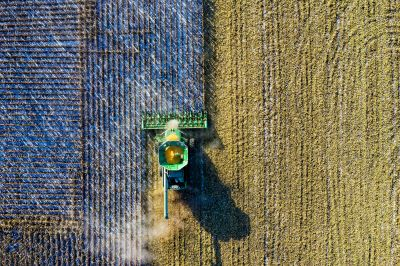

About This Dataset:

✍️ Personal Note:

While the owner is presenting this dataset for analysis and insights, he wants to emphasize the importance of ethical sourcing and consumption, especially in commodities like cocoa and coffee which have known ethical concerns in their supply chains.

This dataset delivers an extensive and current assortment of futures related to soft commodities. Futures are financial contracts obligating the buyer to purchase, and the seller to sell, a specified amount of a particular commodity at a predetermined price on a set date in the future.

Main Motives:

1. **Price Forecasting**: Harness machine learning to predict the price dynamics of commodities, aiding stakeholders in their decision-making.
2. **Supply Chain Analysis**: Evaluate the correlation between futures prices and global events, offering insights into potential supply chain disruptions.
3. **Demand Projections**: Utilize deep learning techniques to correlate historical consumption patterns with price movements, projecting future demand.

Column Descriptions:

1. **Date**: The date when the data was recorded. Format: YYYY-MM-DD.
2. **Open**: The opening market price for the day.
3. **High**: Maximum price achieved during the trading session.
4. **Low**: Lowest traded price during the session.
5. **Close**: Market's concluding price.
6. **Volume**: Count of contracts traded throughout the session.
7. **Ticker**: Distinct market quotation symbol for the commodity future.
8. **Commodity**: Indicates the type of soft commodity the futures contract pertains to (e.g., Cocoa, Coffee).

In [ ]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Sharmeen/OneDrive/Documents/Datasources/supply chain agricultural/all_agricultural_products_data.csv',encoding='ISO-8859-1')

In [3]:
df

ticker commodity        date        open    high         low  \
0       CC=F     Cocoa  2000-01-03  840.000000  846.00  820.000000   
1       CC=F     Cocoa  2000-01-04  830.000000  841.00  823.000000   
2       CC=F     Cocoa  2000-01-05  840.000000  850.00  828.000000   
3       CC=F     Cocoa  2000-01-06  830.000000  847.00  824.000000   
4       CC=F     Cocoa  2000-01-07  848.000000  855.00  836.000000   
...      ...       ...         ...         ...     ...         ...   
30261   SB=F     Sugar  2023-12-05   25.900000   25.90   24.809999   
30262   SB=F     Sugar  2023-12-06   24.920000   24.92   22.940001   
30263   SB=F     Sugar  2023-12-07   23.389999   23.93   22.799999   
30264   SB=F     Sugar  2023-12-08   23.100000   23.60   23.100000   
30265   SB=F     Sugar  2023-12-11   23.440001   23.49   22.170000   

            close  volume  
0      830.000000    2426  
1      836.000000    1957  
2      831.000000    3975  
3      841.000000    3454  
4      853.000000    5008  
...           ...     ...  
30261   24.959999  107293  
30262   23.000000  177202  
30263   23.030001  132480  
30264   23.360001   88278  
30265   22.559999       0  

[30266 rows x 8 columns]

In [4]:
df.isnull().sum()

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

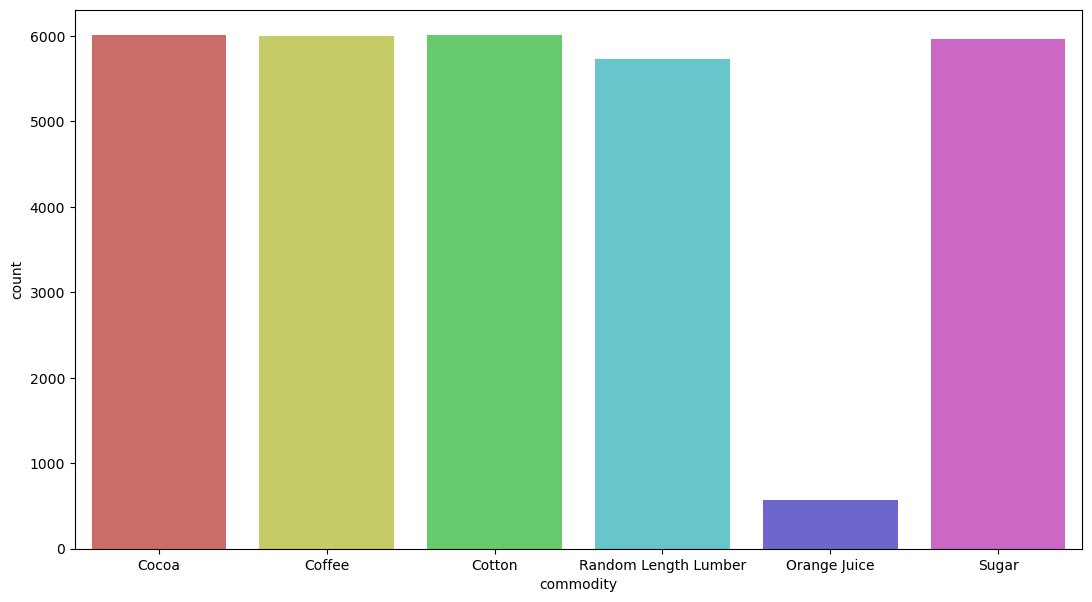

In [5]:
#HIGHEST SELLING COMMODITY
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
sns.countplot(x="commodity", data=df, palette="hls")
plt.show()

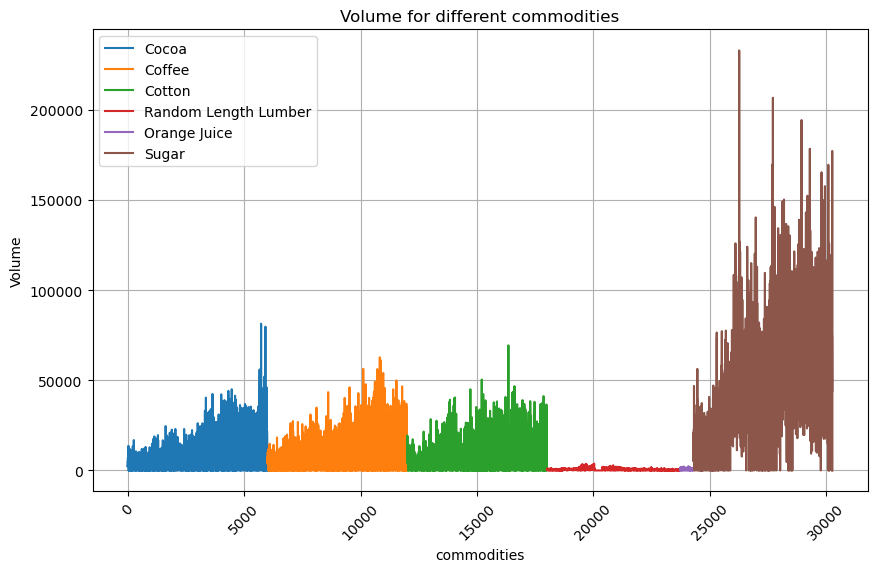

In [6]:
product_column = 'commodity'
sales_column = 'volume'

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Iterate through unique products and plot sales
for Product in df[product_column].unique():
    Product_data = df[df[product_column] == Product]
    plt.plot(Product_data[sales_column], label=Product)

plt.xlabel('commodities')  # Change this based on your dataset
plt.ylabel('Volume')
plt.title('Volume for different commodities')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

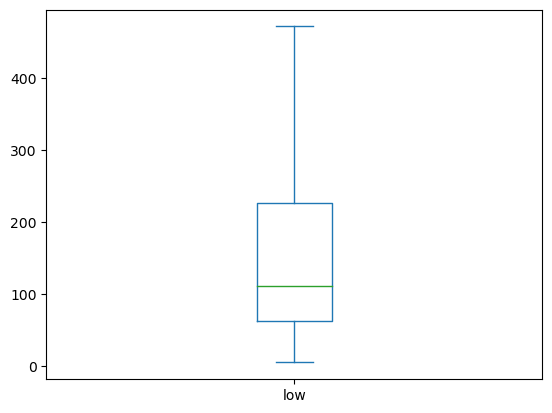

In [51]:
df['low'].plot(kind='box')

In [50]:
Q1 = df['low'].quantile(0.25)
Q3 = df['low'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter DataFrame based on the bounds
df = df[(df['low'] >= lower_bound) & (df['low'] <= upper_bound)]

In [52]:
df.shape

(18951, 8)

In [53]:
df

ticker commodity        date        open        high         low  \
6004    KC=F    Coffee  2000-01-03  124.000000  124.000000  116.099998   
6005    KC=F    Coffee  2000-01-04  116.500000  120.500000  115.750000   
6006    KC=F    Coffee  2000-01-05  115.000000  121.000000  115.000000   
6007    KC=F    Coffee  2000-01-06  119.000000  121.400002  116.500000   
6008    KC=F    Coffee  2000-01-07  117.750000  117.750000  113.800003   
...      ...       ...         ...         ...         ...         ...   
30149   SB=F     Sugar  2023-06-28   23.280001   23.290001   22.459999   
30150   SB=F     Sugar  2023-06-29   22.629999   22.629999   21.809999   
30213   SB=F     Sugar  2023-09-28   26.240000   26.850000   25.950001   
30253   SB=F     Sugar  2023-11-23   27.770000   27.770000   27.160000   
30265   SB=F     Sugar  2023-12-11   23.440001   23.490000   22.170000   

            close  volume  
6004   116.500000    6640  
6005   116.250000    5492  
6006   118.599998    6165  
6007   116.849998    5094  
6008   114.150002    6855  
...           ...     ...  
30149   22.570000    9609  
30150   22.070000   22912  
30213   26.730000   19285  
30253   27.219999       0  
30265   22.559999       0  

[18951 rows x 8 columns]

# 1) Price Forecasting with ARIMA, SARIMAX AND LSTM

In [54]:
#ARIMA FORECASTING MODEL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [55]:
# Assuming df is your DataFrame with columns: 'Date', 'close'
# Make sure 'Date' is in datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Feature engineering: Create lag features
df['lag1'] = df['close'].shift(1)
df['lag2'] = df['close'].shift(2)

In [56]:
# Train-test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# ARIMA model
model = ARIMA(train['close'], order=(1, 1, 1))  # Adjust order based on grid search
fit_model = model.fit()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anac

In [57]:
# Forecast
forecast= fit_model.forecast(steps=len(test))

# Evaluate performance
mse = mean_squared_error(test['close'], forecast)
print(f'Mean Squared Error: {mse}')

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error: 53738.73843770057


In [58]:
# Resample to monthly frequency (you can adjust this based on your needs)
df_resampled = df.resample('M').mean()

C:\Users\Sharmeen\AppData\Local\Temp\ipykernel_1852\262217705.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M').mean()


C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 1926.814080758067


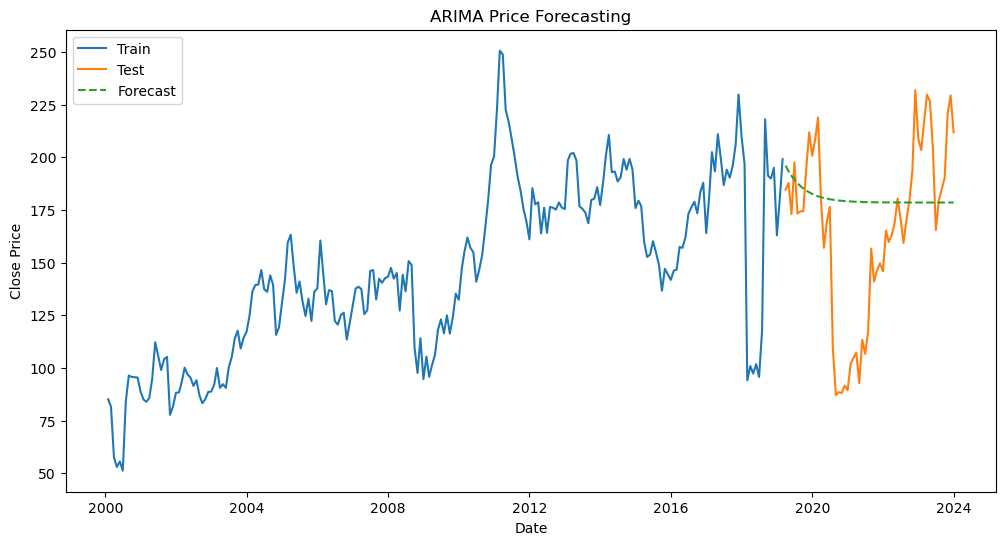

In [59]:
# Feature engineering: Create lag features
df_resampled['lag1'] = df_resampled['close'].shift(1)
df_resampled['lag2'] = df_resampled['close'].shift(2)

# Train-test split
train_size = int(len(df_resampled) * 0.8)
train, test = df_resampled[:train_size], df_resampled[train_size:]

# ARIMA model
model = ARIMA(train['close'], order=(1, 1, 1))
fit_model = model.fit()

# Forecast
forecast = fit_model.forecast(steps=len(test))

# Evaluate performance
mse = mean_squared_error(test['close'], forecast)
print(f'Mean Squared Error: {mse}')

# Plot actual vs. forecasted
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['close'], label='Train')
plt.plot(test.index, test['close'], label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='dashed')
plt.title('ARIMA Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# ADF(Augmented Dickey Fuller Test) to test whether a given Time series is stationary or not 

In [60]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [61]:
test_result=adfuller(df['close'])

In [62]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [63]:
adfuller_test(df['close'])

ADF Test Statistic : -3.0748638369995103
p-value : 0.028470170699238642
#Lags Used : 42
Number of Observations Used : 18908
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [64]:
df['Seasonal First Difference']=df['close']-df['close'].shift(12)

In [65]:
df.head(14)

ticker commodity    open        high         low       close  \
date                                                                      
2000-01-03   KC=F    Coffee  124.00  124.000000  116.099998  116.500000   
2000-01-04   KC=F    Coffee  116.50  120.500000  115.750000  116.250000   
2000-01-05   KC=F    Coffee  115.00  121.000000  115.000000  118.599998   
2000-01-06   KC=F    Coffee  119.00  121.400002  116.500000  116.849998   
2000-01-07   KC=F    Coffee  117.75  117.750000  113.800003  114.150002   
2000-01-10   KC=F    Coffee  126.00  126.000000  116.699997  117.550003   
2000-01-11   KC=F    Coffee  115.50  118.250000  115.500000  117.800003   
2000-01-12   KC=F    Coffee  118.00  120.500000  116.900002  118.949997   
2000-01-13   KC=F    Coffee  120.00  120.000000  117.500000  118.550003   
2000-01-14   KC=F    Coffee  118.00  120.250000  112.250000  112.550003   
2000-01-18   KC=F    Coffee  112.00  118.250000  110.599998  115.750000   
2000-01-19   KC=F    Coffee  116.50  118.250000  114.750000  116.699997   
2000-01-20   KC=F    Coffee  118.25  118.800003  111.699997  112.000000   
2000-01-21   KC=F    Coffee  112.00  113.500000  110.800003  111.199997   

            volume        lag1        lag2  Seasonal First Difference  
date                                                                   
2000-01-03    6640         NaN         NaN                        NaN  
2000-01-04    5492  116.500000         NaN                        NaN  
2000-01-05    6165  116.250000  116.500000                        NaN  
2000-01-06    5094  118.599998  116.250000                        NaN  
2000-01-07    6855  116.849998  118.599998                        NaN  
2000-01-10    7499  114.150002  116.849998                        NaN  
2000-01-11    3976  117.550003  114.150002                        NaN  
2000-01-12    5184  117.800003  117.550003                        NaN  
2000-01-13    3717  118.949997  117.800003                        NaN  
2000-01-14   10115  118.550003  118.949997                        NaN  
2000-01-18    7364  112.550003  118.550003                        NaN  
2000-01-19    6626  115.750000  112.550003                        NaN  
2000-01-20    8834  116.699997  115.750000                  -4.500000  
2000-01-21    5625  112.000000  116.699997                  -5.050003

In [66]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -20.320443898339647
p-value : 0.0
#Lags Used : 44
Number of Observations Used : 18894
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date'>

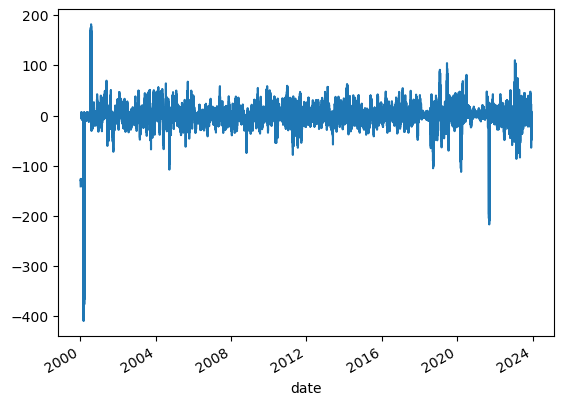

In [67]:
df['Seasonal First Difference'].plot()

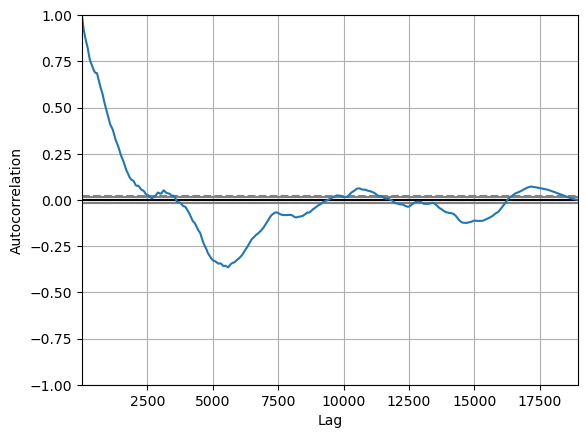

In [68]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column named 'close'
autocorrelation_plot(df['close'])
plt.show()

Plotting autocorrelation and partial autocorrelation plots for in depth order of the Seasonal Difference column

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


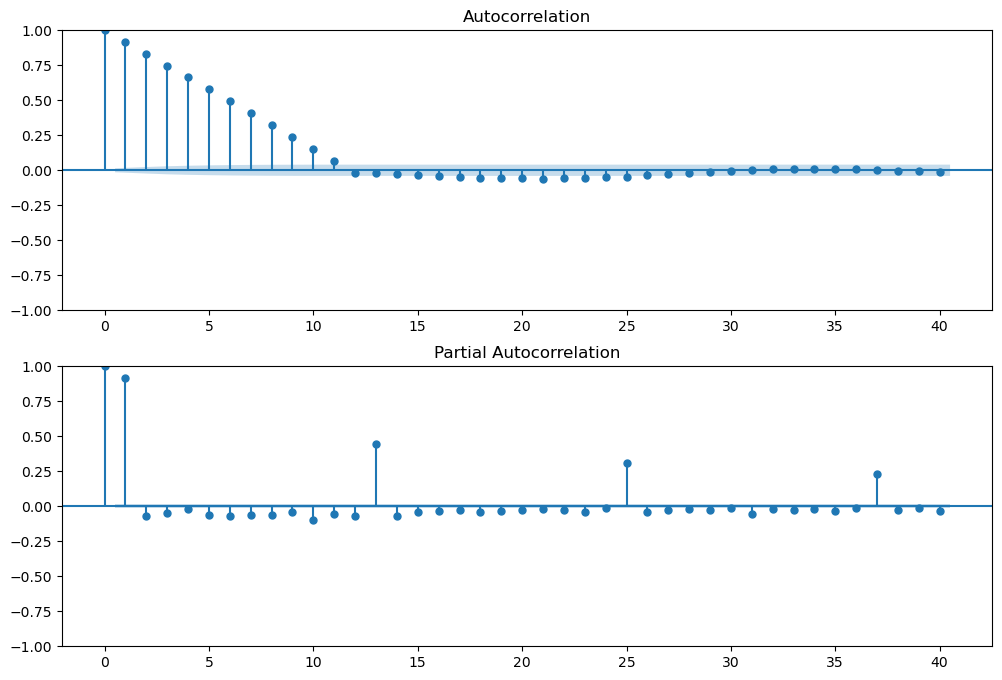

In [70]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

# Since we have a stationary data, so implementing Seasonal Autoregressive Integrated Moving Average with eXogeneous Factors(SARIMAX) model for seasonal data

In [71]:
import statsmodels.api as sm

In [72]:
model=sm.tsa.statespace.SARIMAX(df['close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Seasonal-Trend decomposition using LOESS(STL) to decompose a time series into three components: trend, season(al) and residual. STL uses LOESS (locally estimated scatterplot smoothing) to extract smooths estimates of the three components. The key inputs into STL are:

season - The length of the seasonal smoother. Must be odd.

trend - The length of the trend smoother, usually around 150% of season. Must be odd and larger than season.

low_pass - The length of the low-pass estimation window, usually the smallest odd number larger than the periodicity of the data.

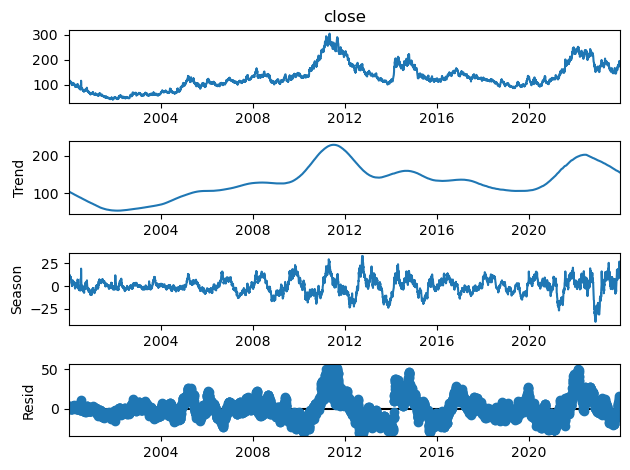

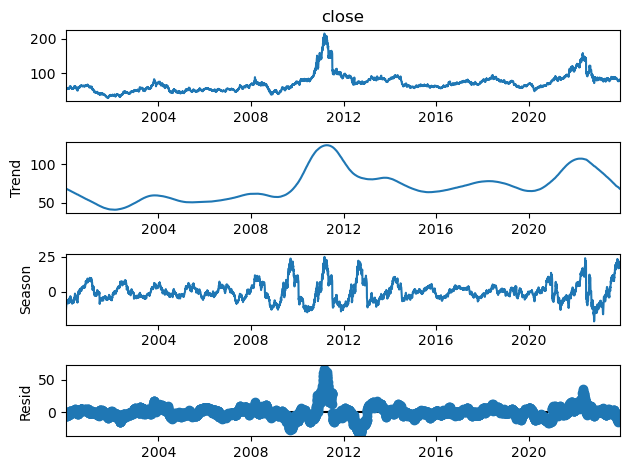

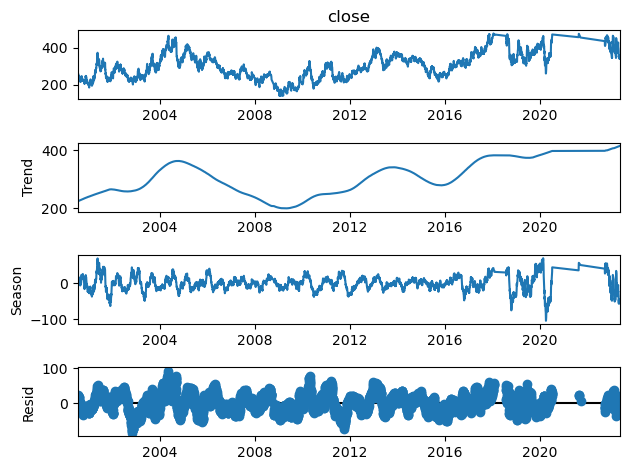

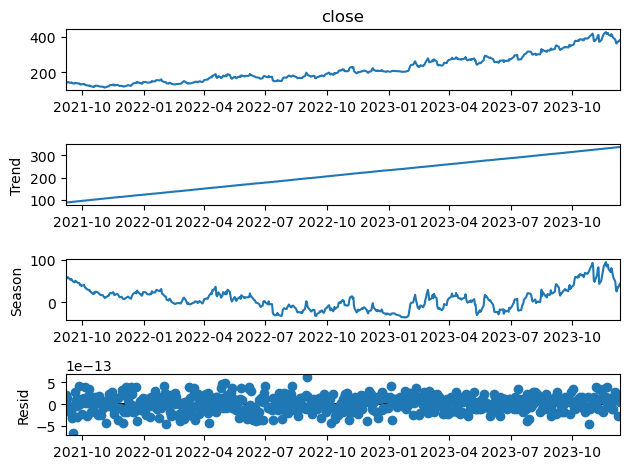

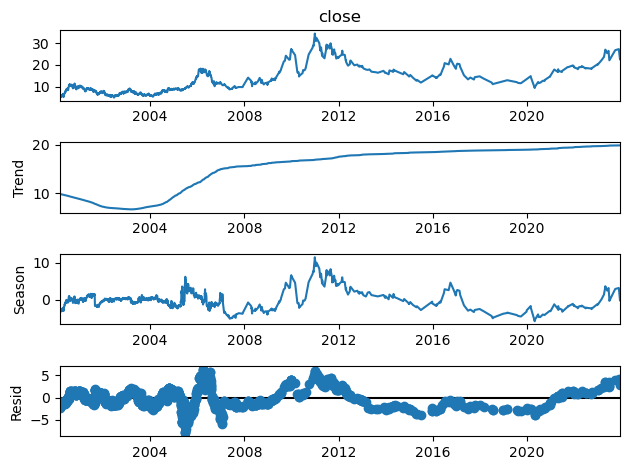

In [73]:
from statsmodels.tsa.seasonal import STL

commodities = df['commodity'].unique()

for commodity in commodities:
    # Subset the data for the current commodity
    commodity_data = df[df['commodity'] == commodity]
    
    # Ensure data is sorted by date
    commodity_data = commodity_data.sort_index()

    # Specify the period for seasonality (adjust this based on your data)
    period = 365  # Example: If you have daily data with yearly seasonality
    
    # Perform STL decomposition
    stl_result = STL(commodity_data['close'], period=period).fit()

    # Plot the decomposition
    stl_result.plot()

Correlation analysis to analyze highly correlated features

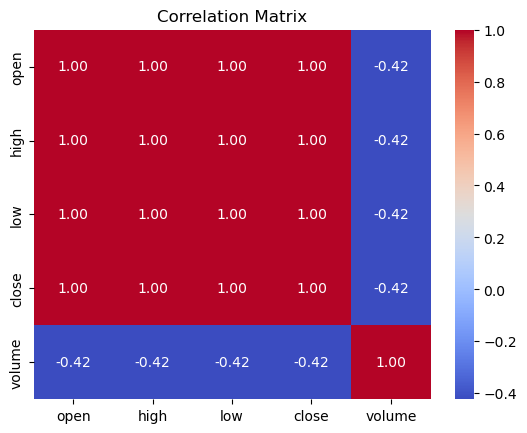

In [74]:
#CORRELATION ANALYSIS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns: 'date', 'ticker', 'commodity', 'open', 'high', 'low', 'close', 'volume'

# Data Exploration
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Analyzing historical closing prices for each commodity

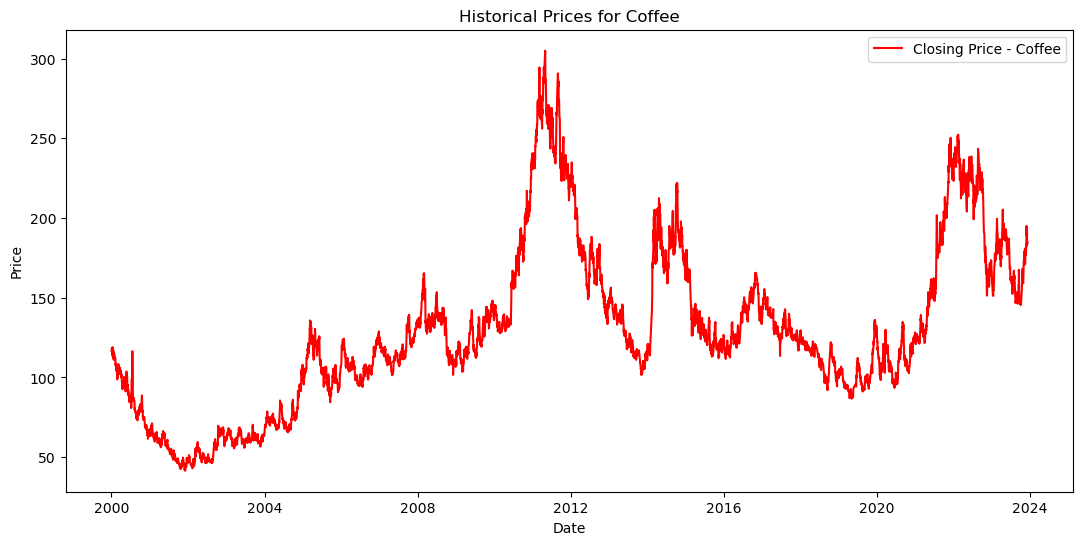

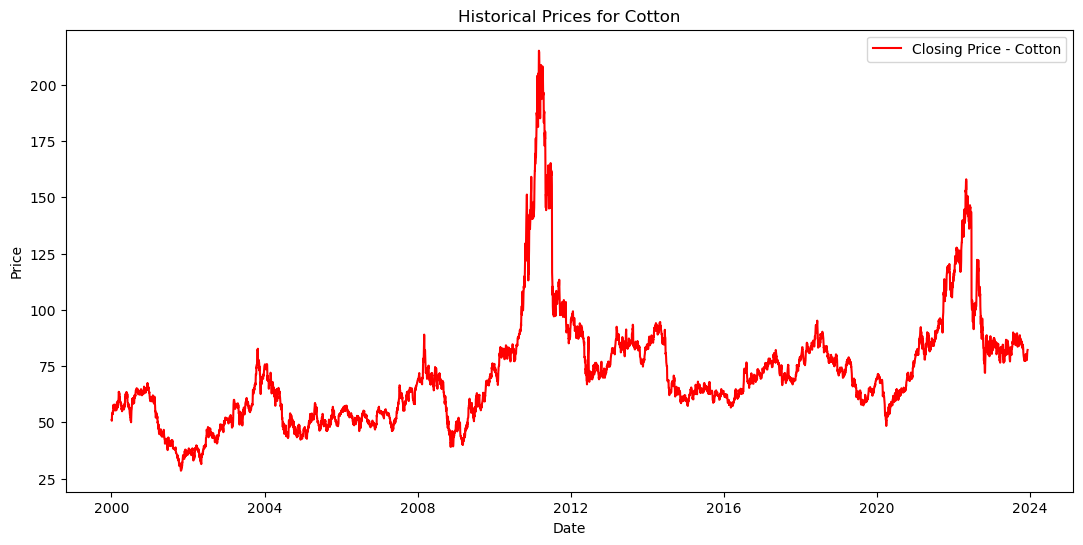

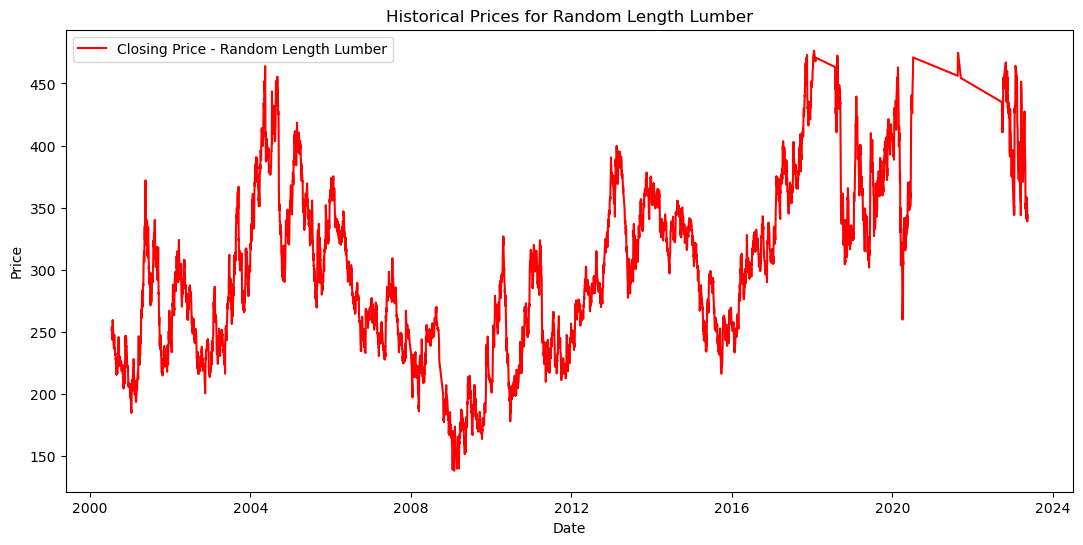

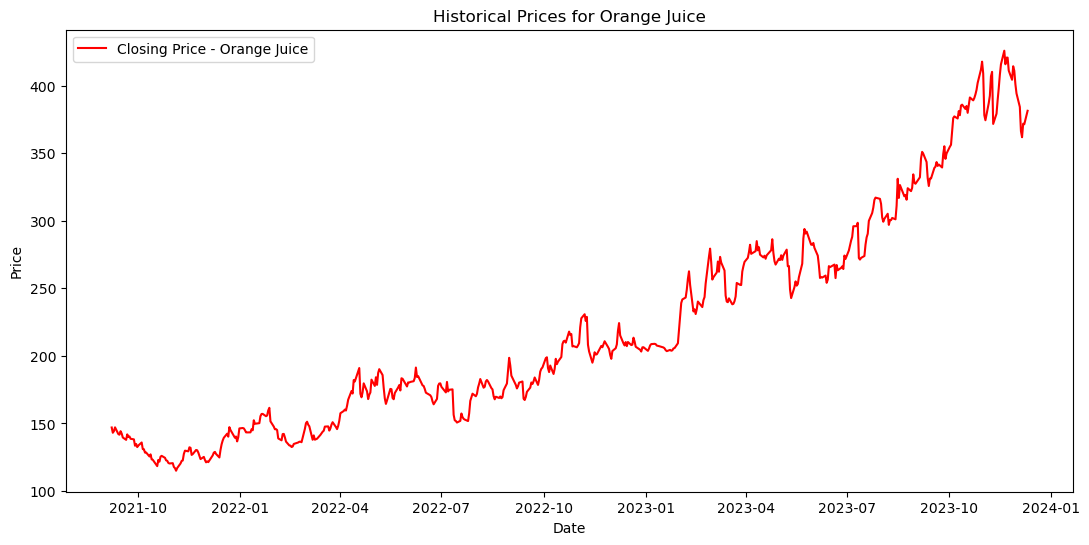

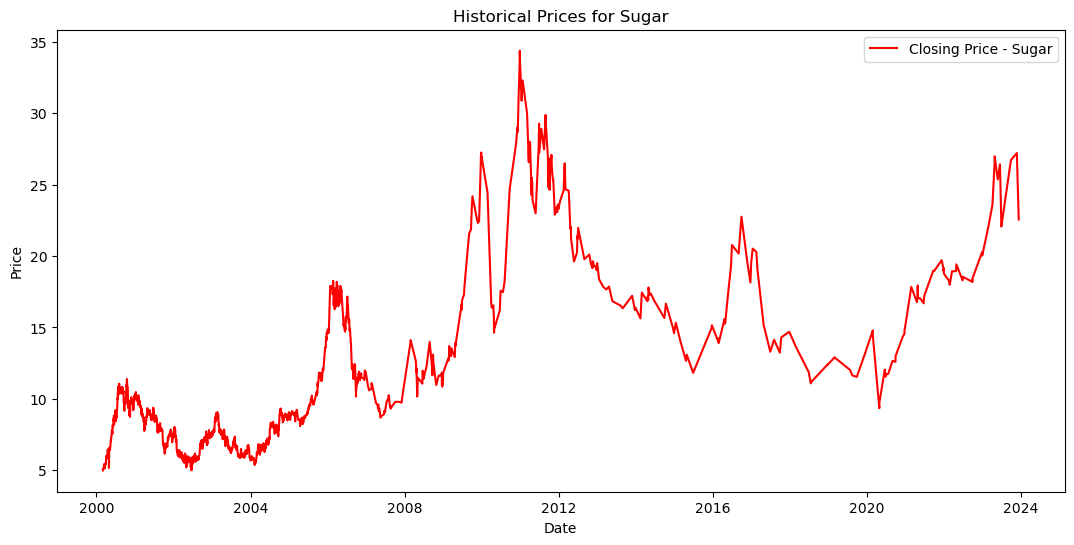

In [75]:
import matplotlib.pyplot as plt

# Filter for unique commodities
commodities = df['commodity'].unique()

# Iterate over each commodity
for commodity in commodities:
    # Filter for the current commodity
    commodity_data = df[df['commodity'] == commodity]
    
    # Plot closing prices for the current commodity
    plt.figure(figsize=(13, 6))
    plt.plot(commodity_data.index, commodity_data['close'], label=f'Closing Price - {commodity}',color='red')
    plt.title(f'Historical Prices for {commodity}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Feature Engineering with LASSO and Random Forest to analyze and select most important features

In [76]:
#Lasso Regression for Feature Selection
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression model
alpha = 0.01  # Adjust alpha based on your preference
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# Get coefficients and print feature importance
coefficients = lasso.coef_
feature_importance = {feature: coef for feature, coef in zip(X_train.columns, coefficients)}

print("Feature Importance (Lasso Regression):")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")

Feature Importance (Lasso Regression):
open: 0.38415579642167463
high: 0.27098810218498637
low: 0.051920655772340535
close: 0.2897346602655379
volume: -5.169480689467224e-07


C:\Users\Sharmeen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.415e+04, tolerance: 1.851e+04
  model = cd_fast.enet_coordinate_descent(


In [77]:
from sklearn.ensemble import RandomForestRegressor

# Separate features and target variable
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importance = rf_model.feature_importances_

print("Feature Importance (Random Forest):")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance (Random Forest):
open: 9.413029150945519e-05
high: 0.00032318808396016973
low: 0.00010072320714249351
close: 0.9994818952190044
volume: 6.319838333277632e-08


# Scatter plots for each commodity for correlation between the features that contribute to the pricing

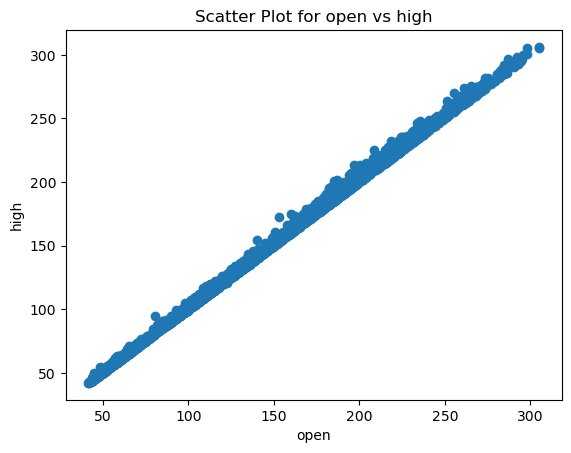

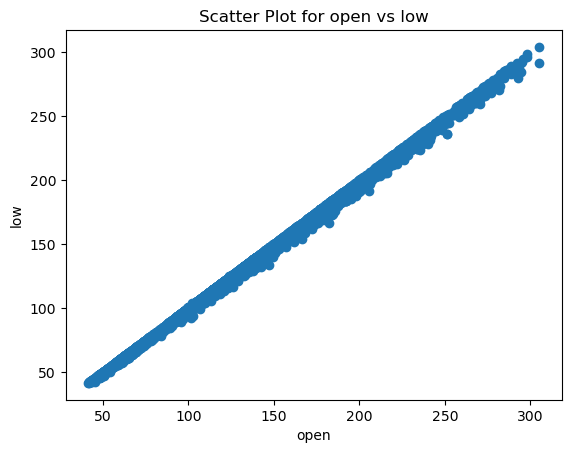

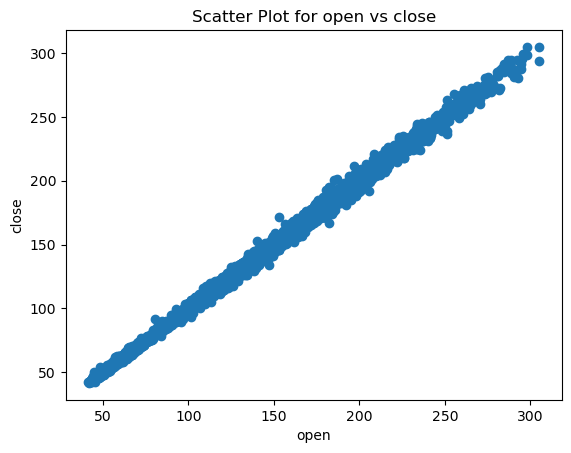

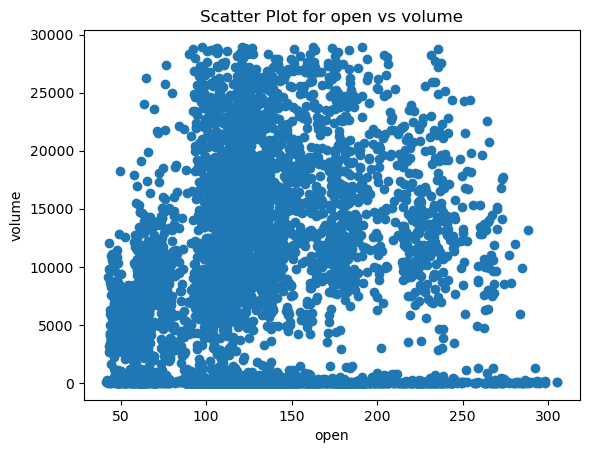

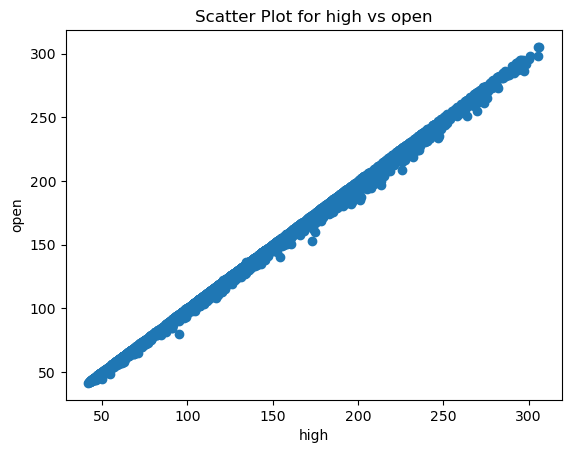

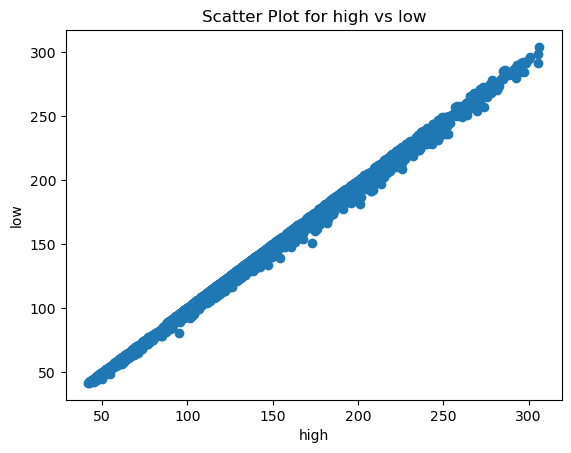

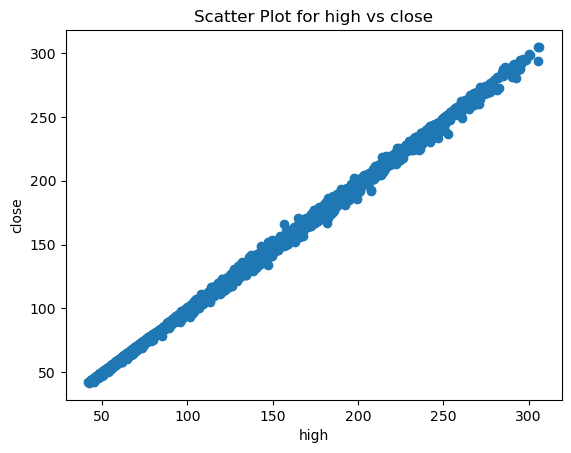

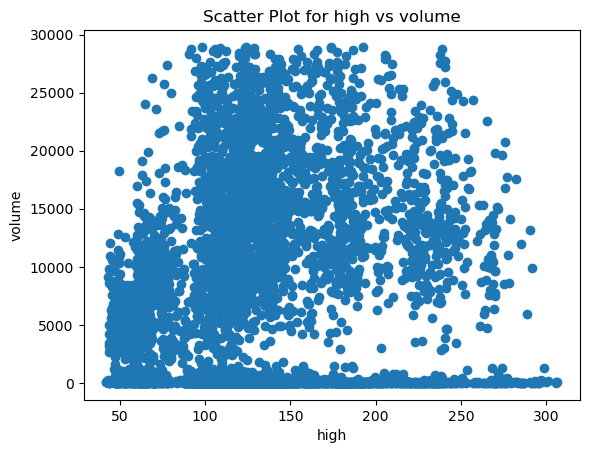

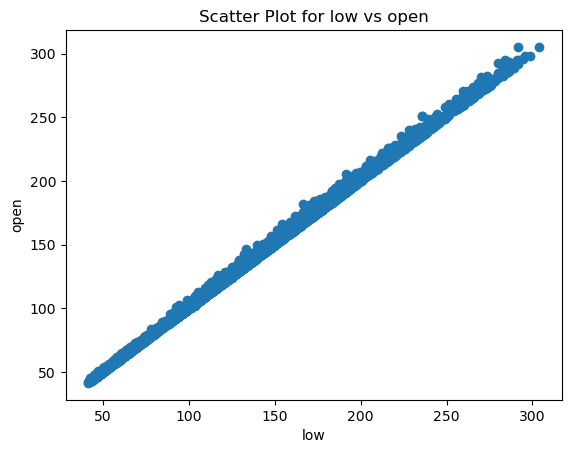

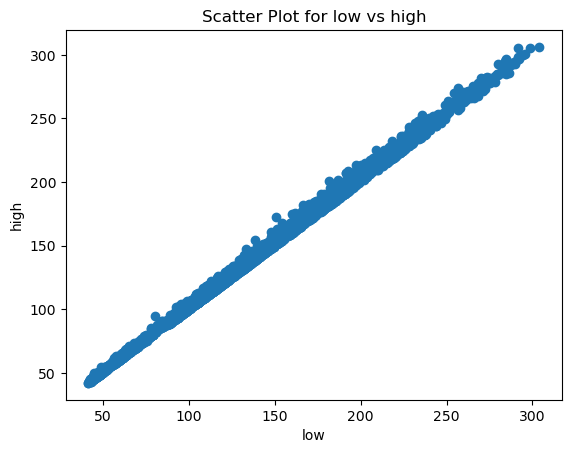

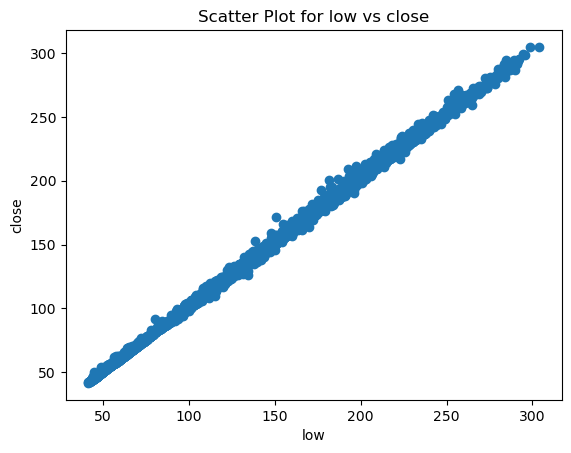

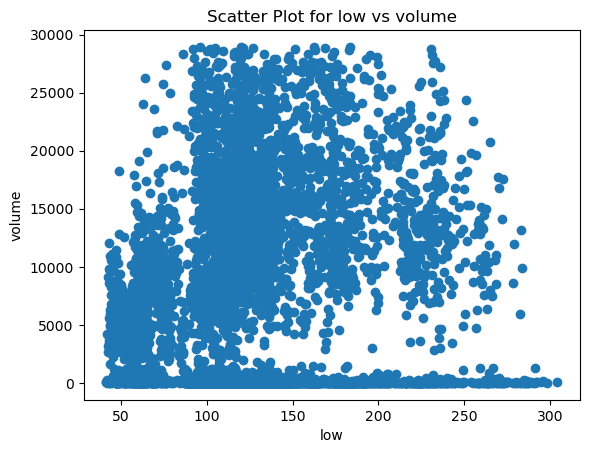

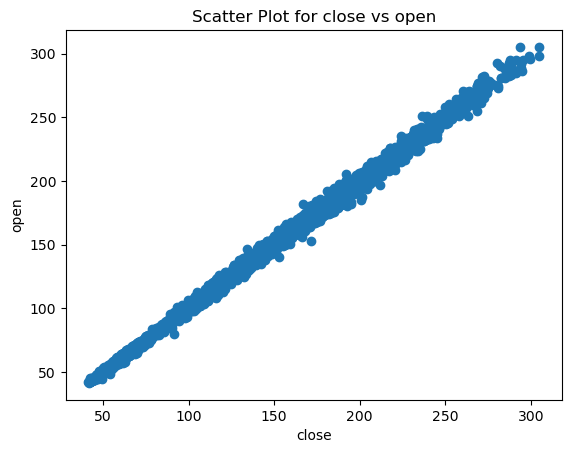

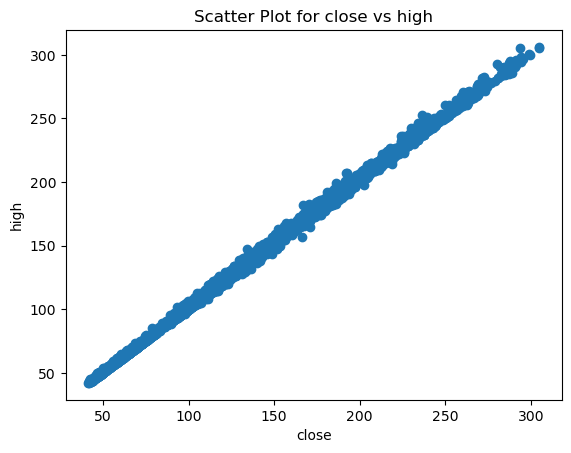

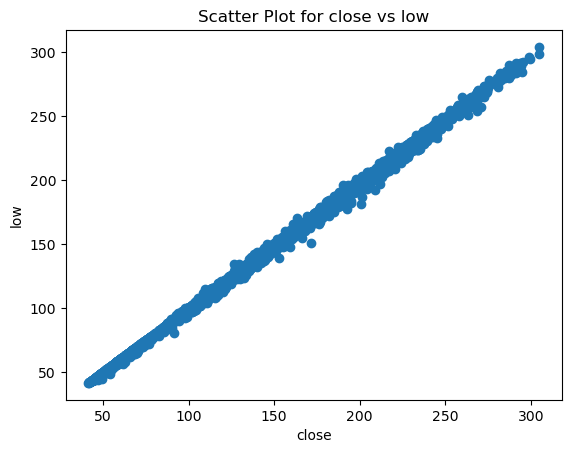

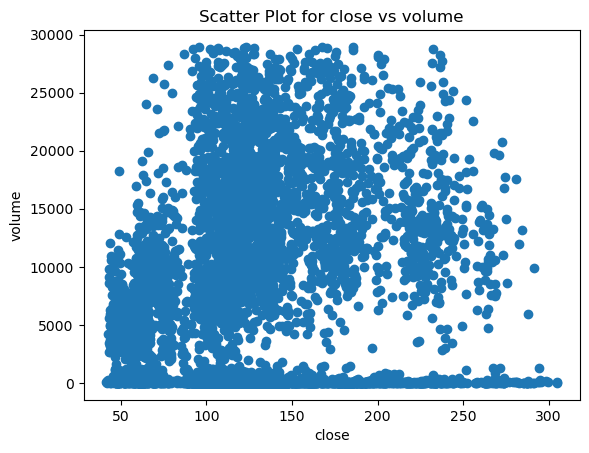

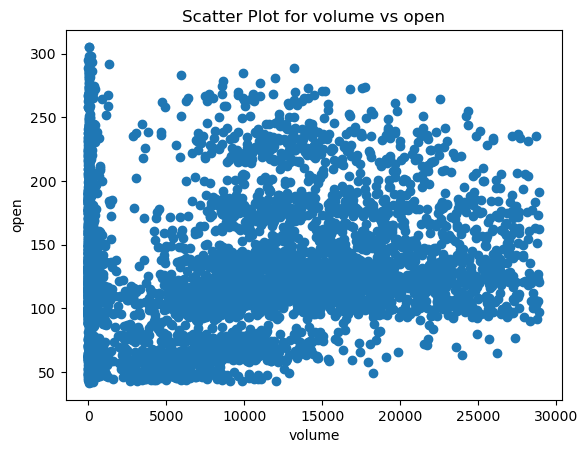

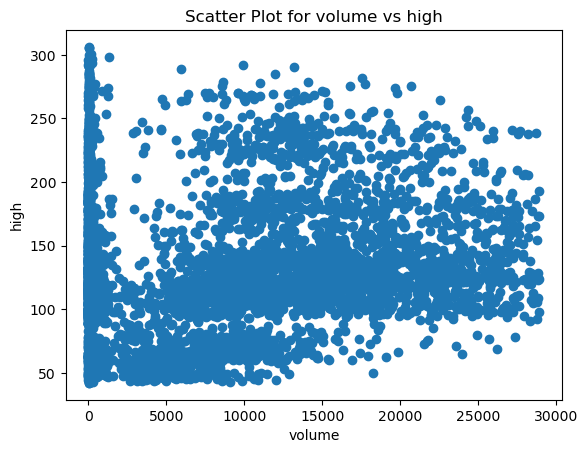

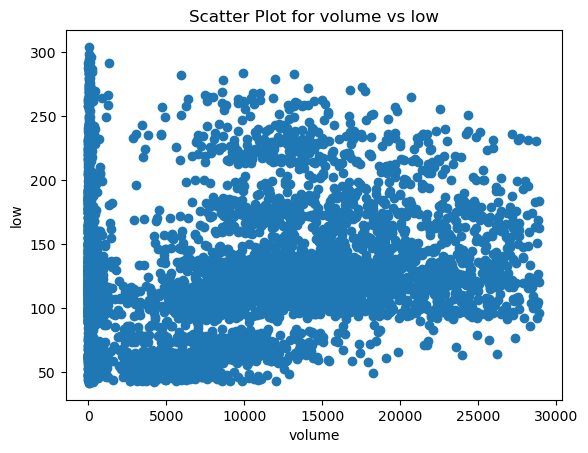

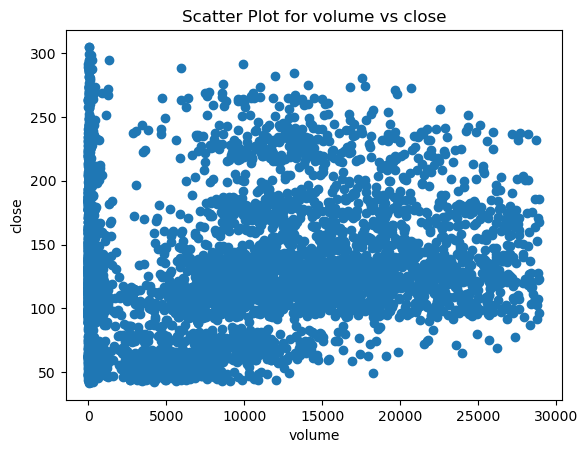

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_commodity_column' with the actual column name where commodity information is stored

# Replace 'Coffee' with the desired commodity
commodity_data = df[df['commodity'] == 'Coffee']
features = ['open', 'high', 'low', 'close', 'volume']

# Plot scatter plots for each pair of features
for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            plt.scatter(commodity_data[feature1], commodity_data[feature2])
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title(f'Scatter Plot for {feature1} vs {feature2}')
            plt.show()

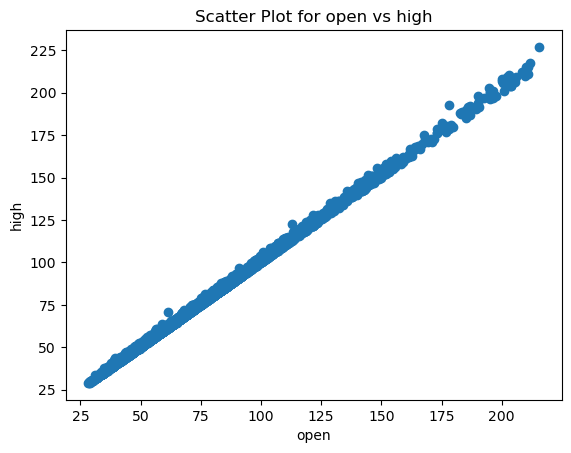

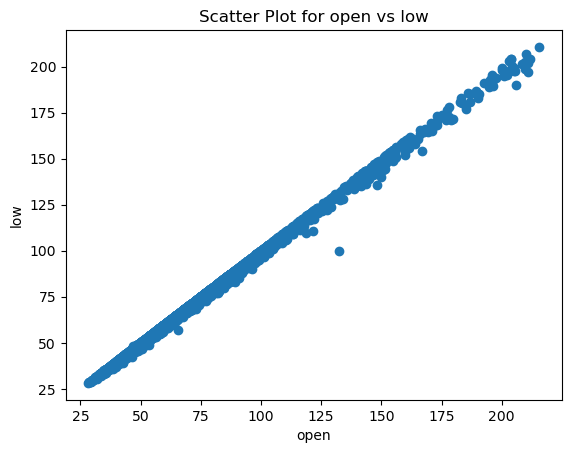

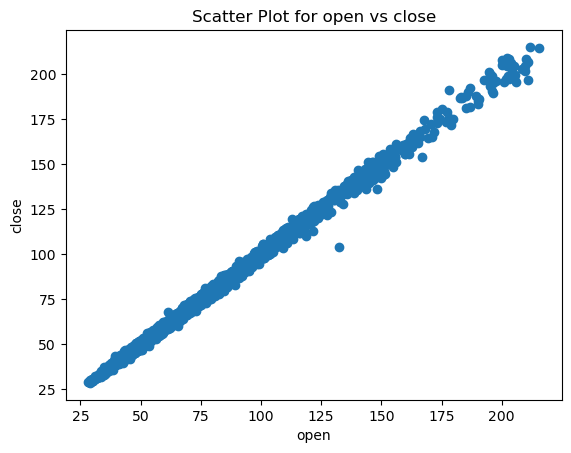

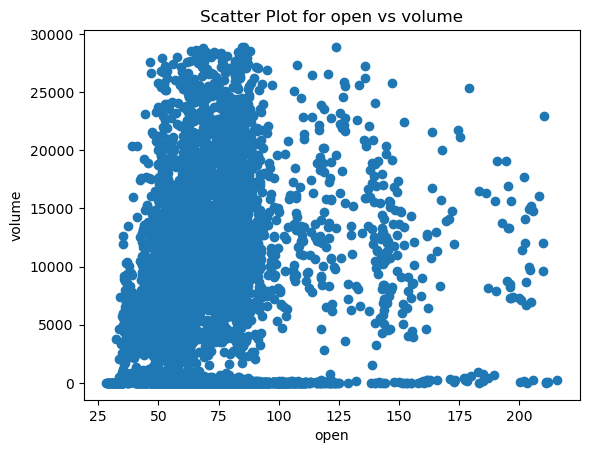

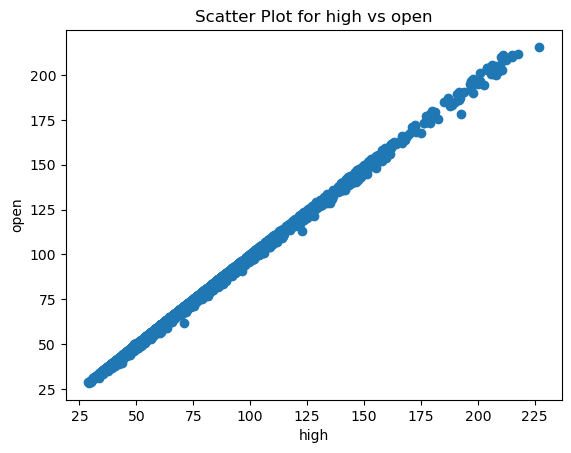

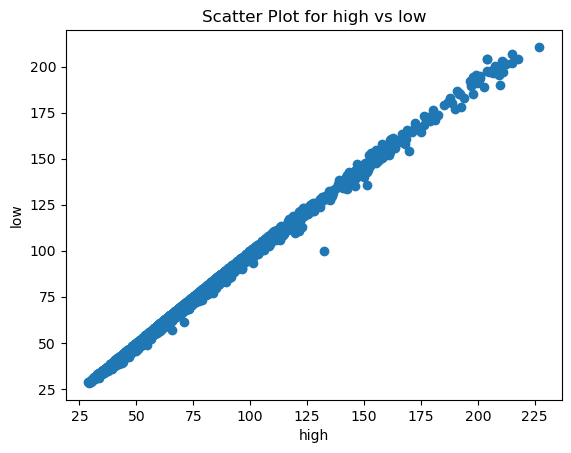

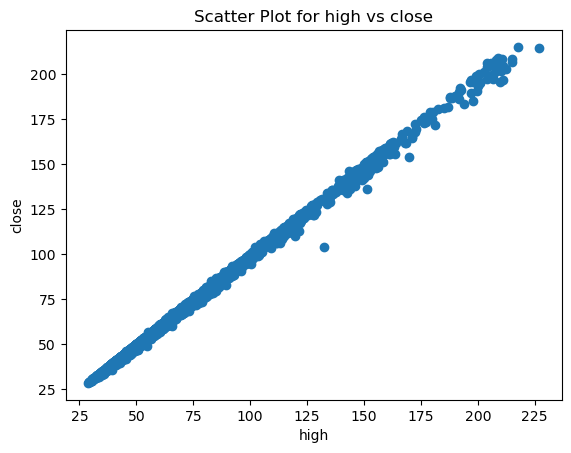

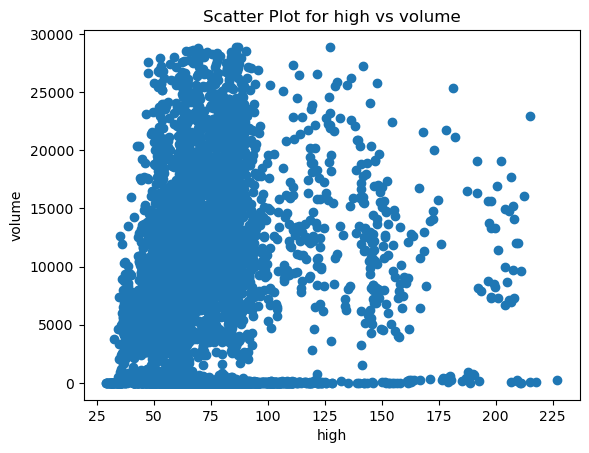

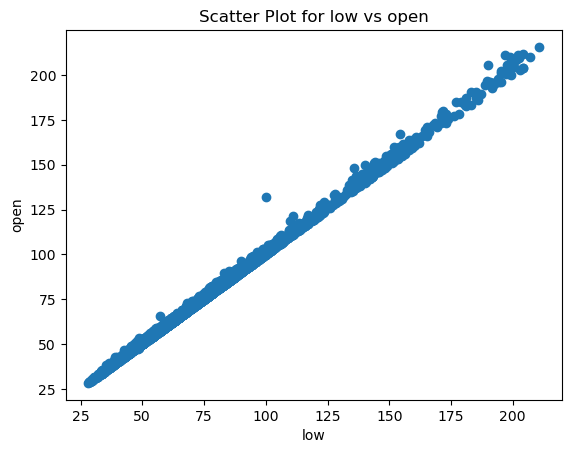

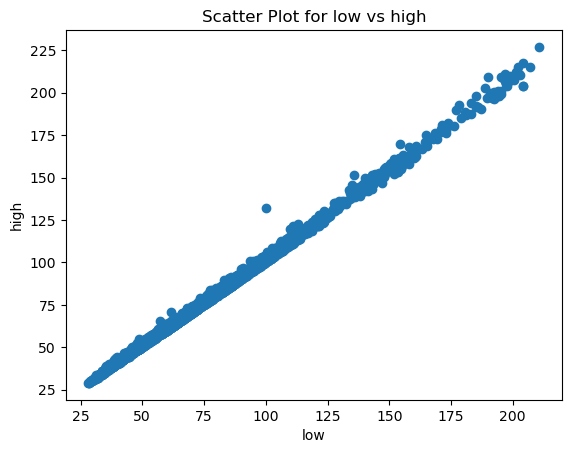

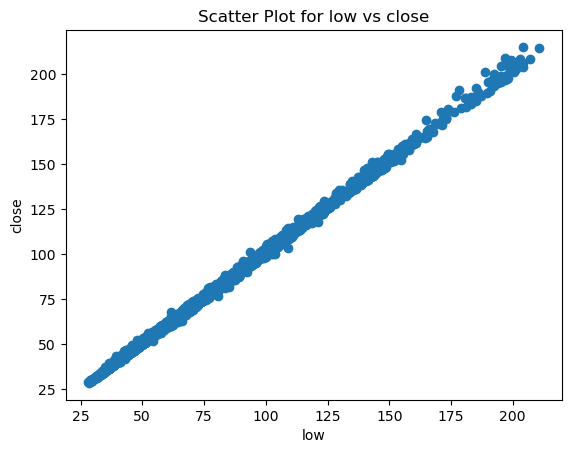

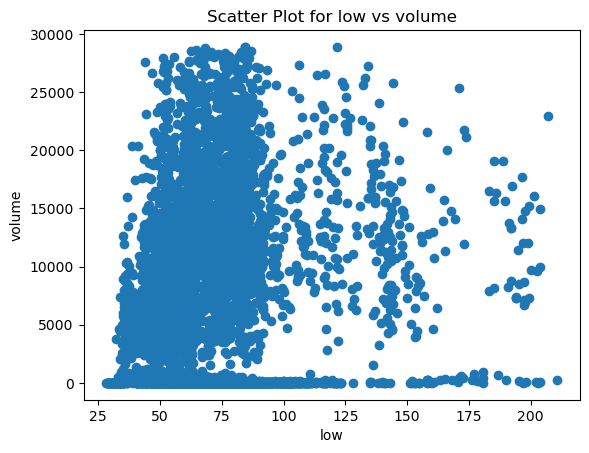

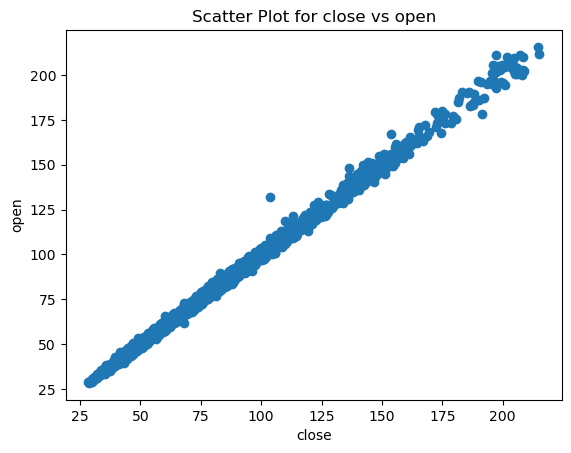

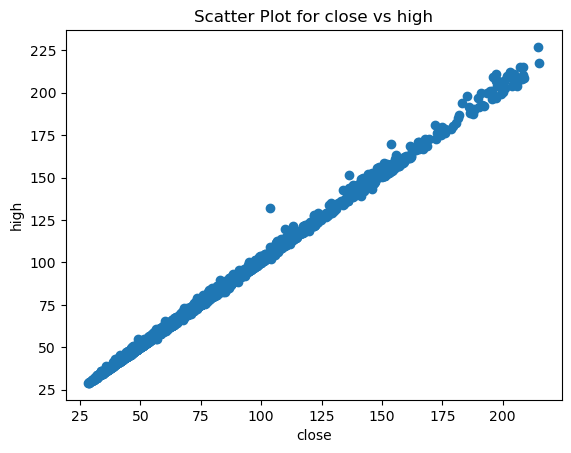

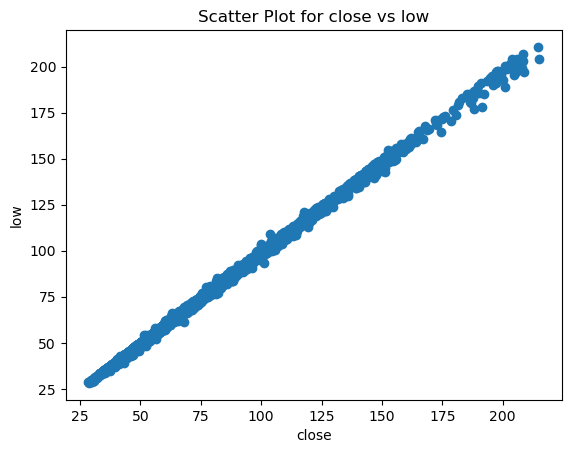

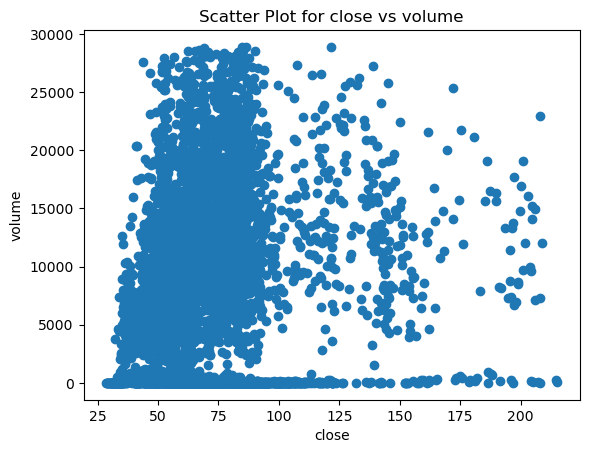

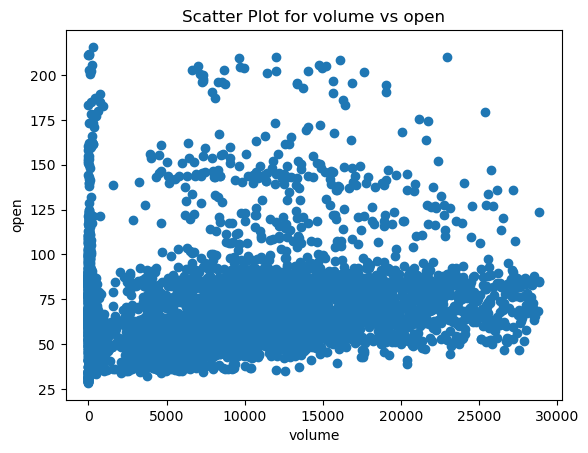

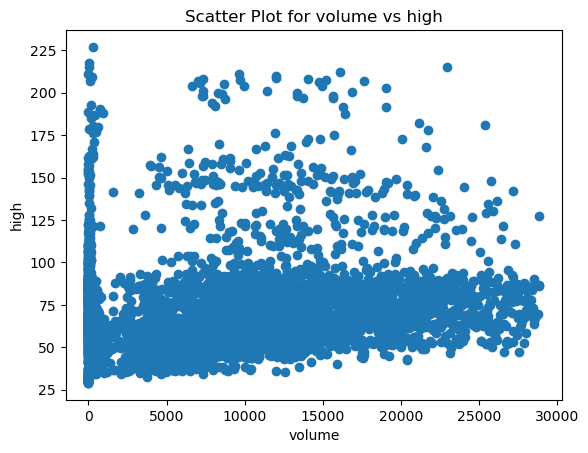

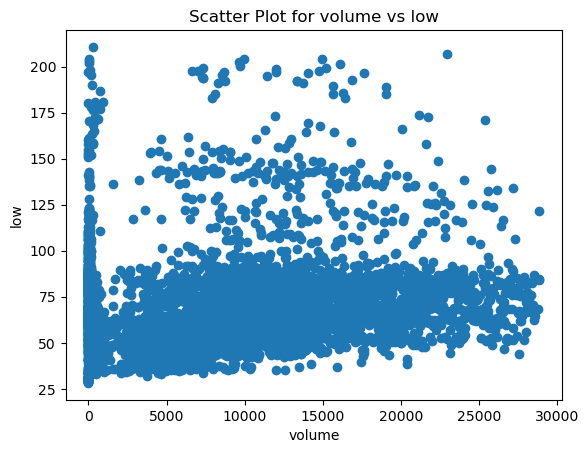

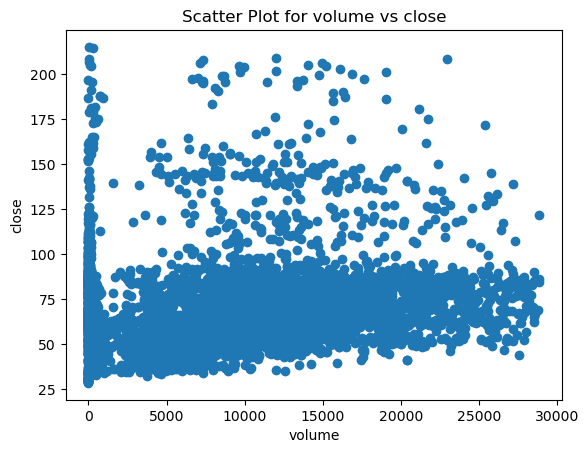

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_commodity_column' with the actual column name where commodity information is stored

# Replace 'Coffee' with the desired commodity
commodity_data = df[df['commodity'] == 'Cotton']
features = ['open', 'high', 'low', 'close', 'volume']

# Plot scatter plots for each pair of features
for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            plt.scatter(commodity_data[feature1], commodity_data[feature2])
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title(f'Scatter Plot for {feature1} vs {feature2}')
            plt.show()

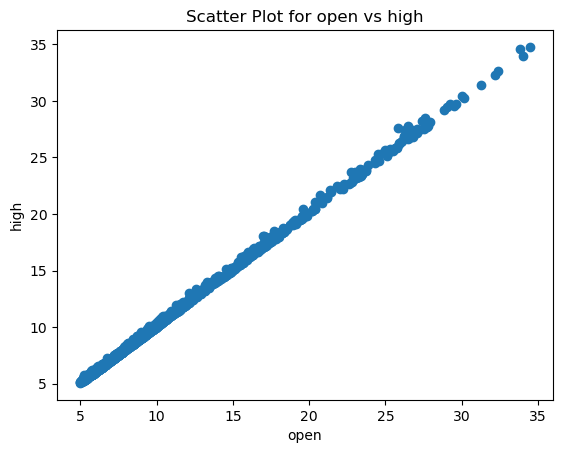

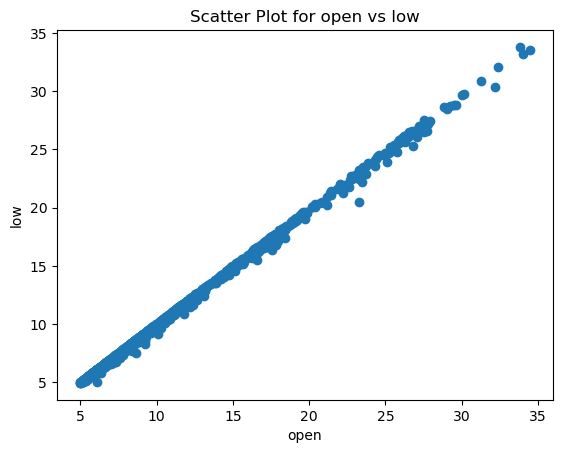

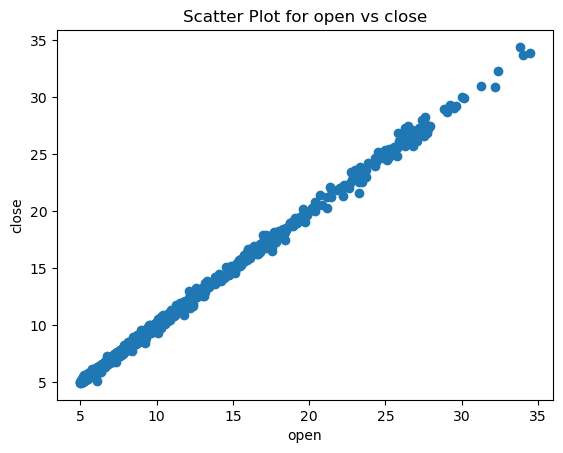

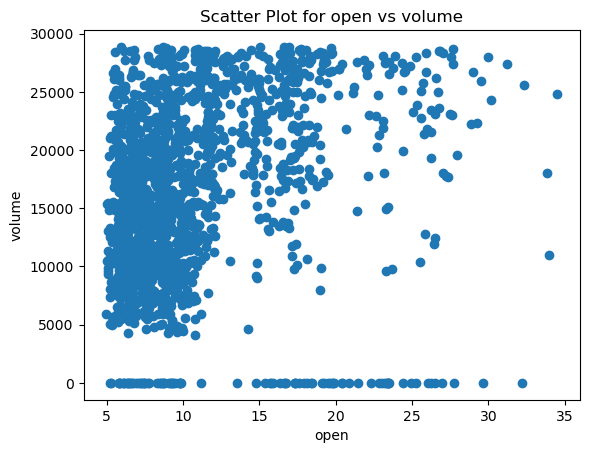

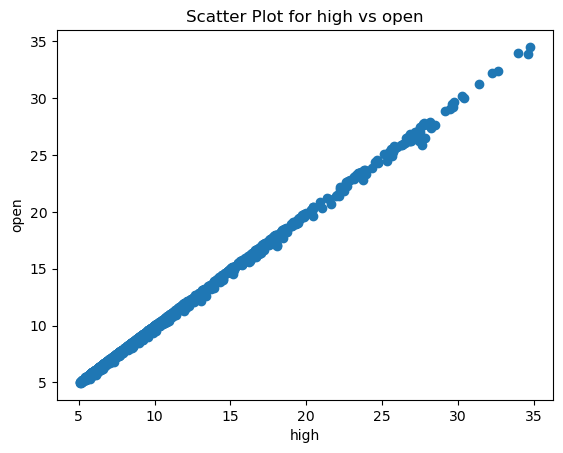

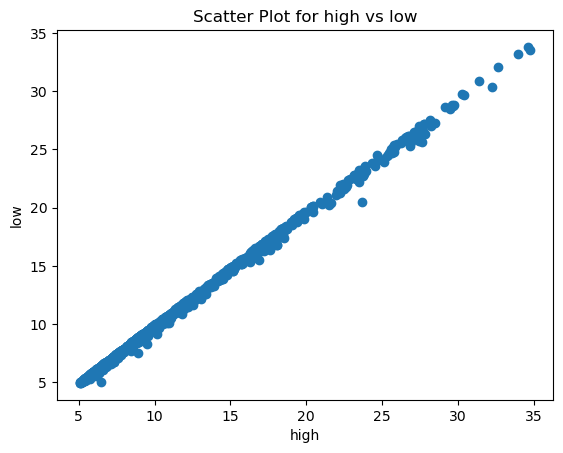

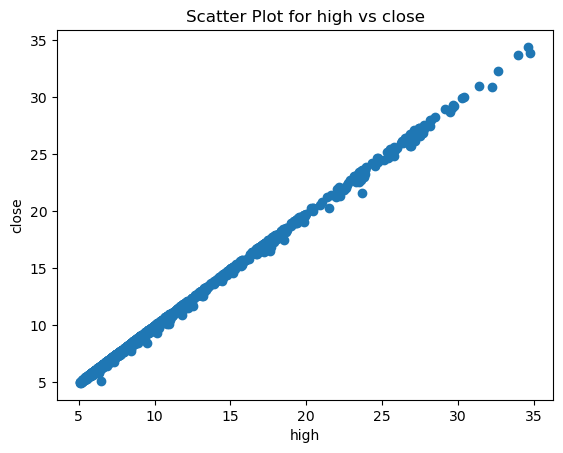

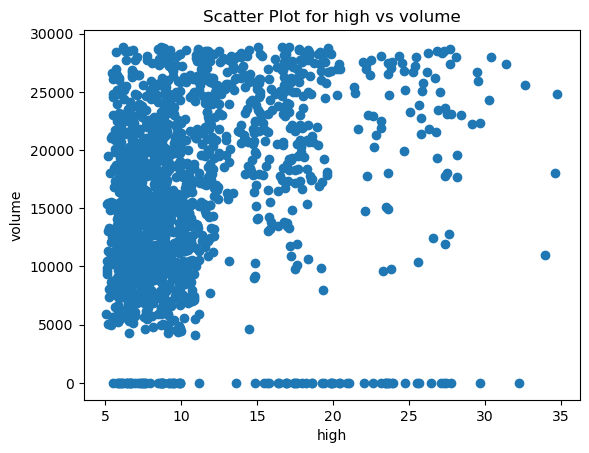

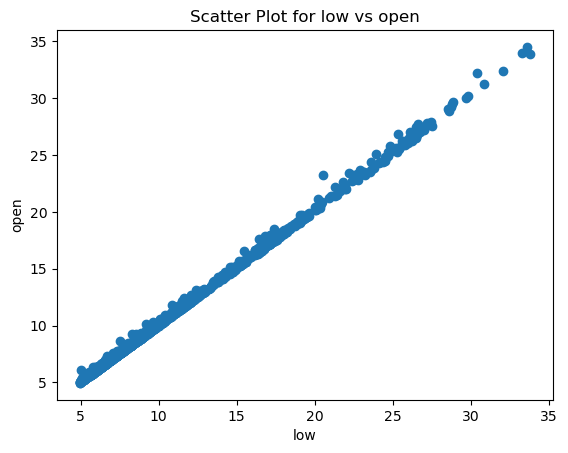

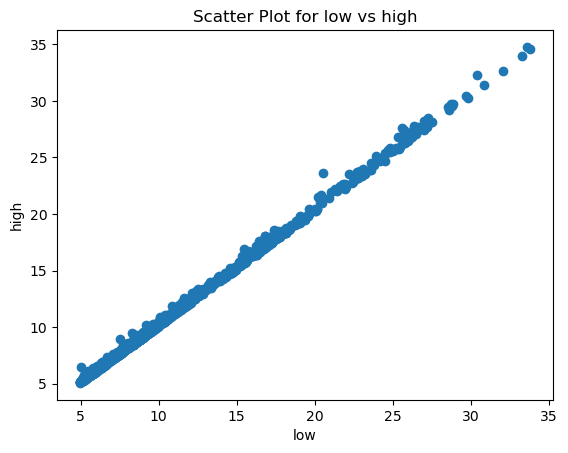

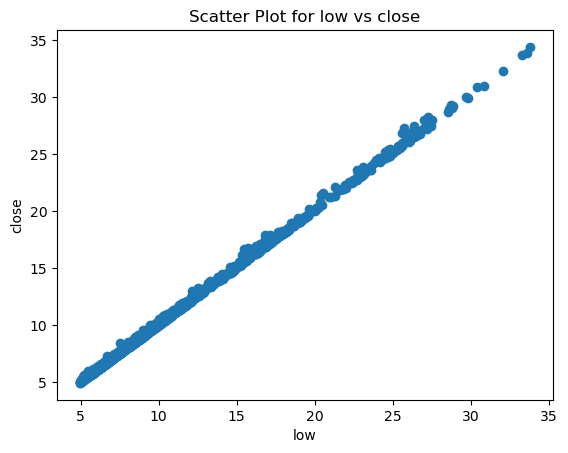

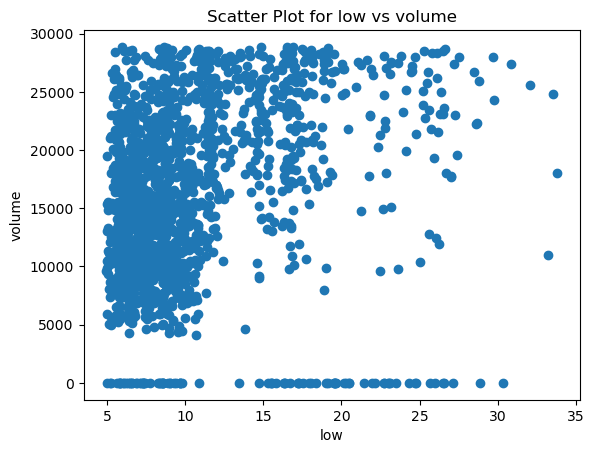

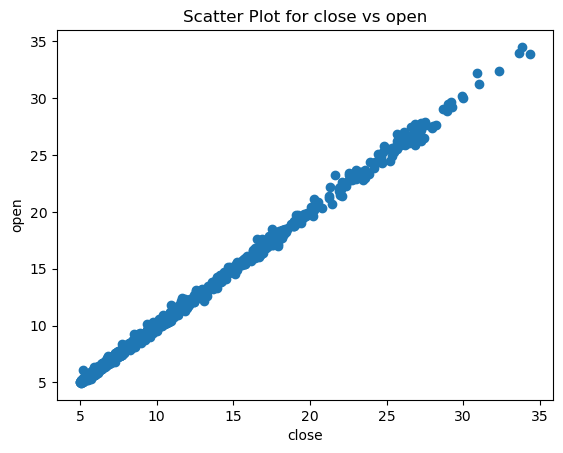

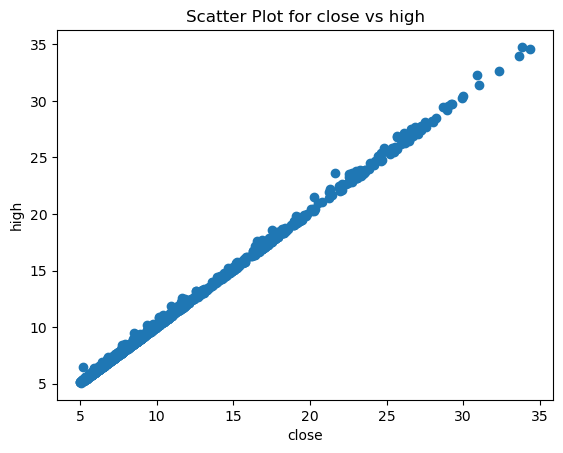

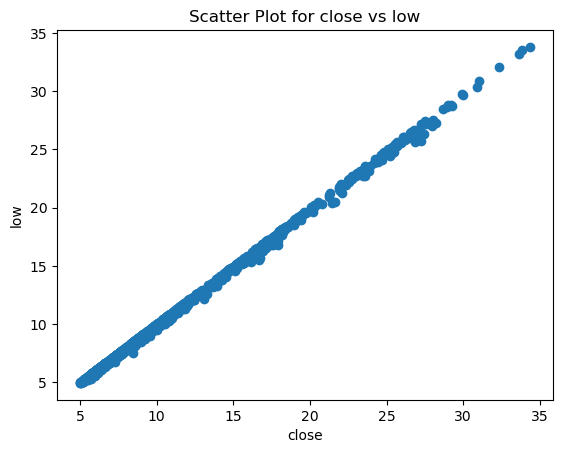

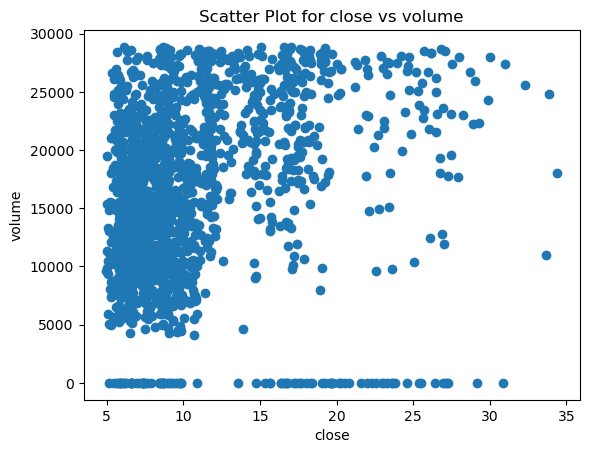

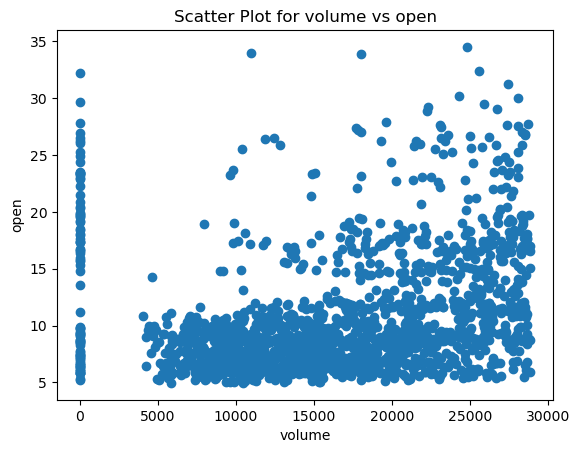

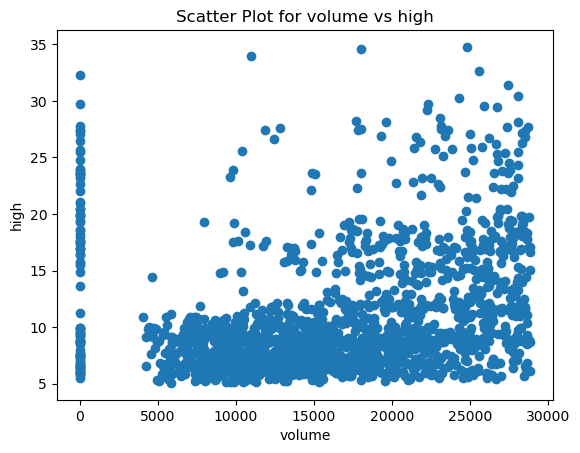

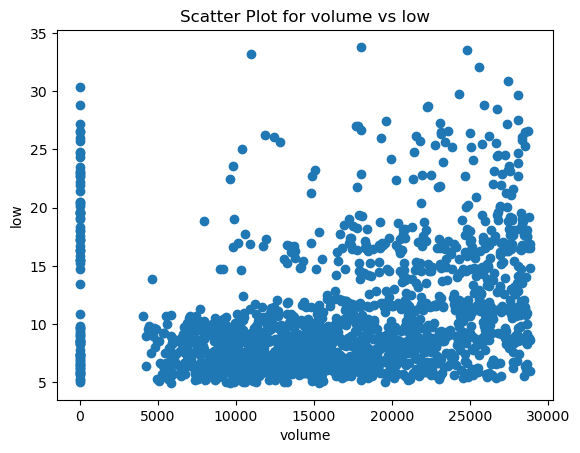

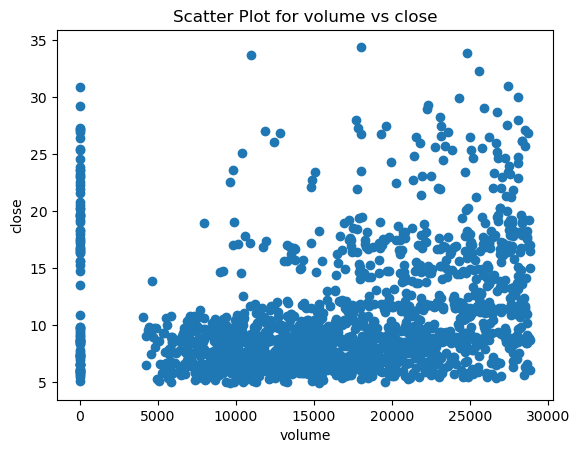

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_commodity_column' with the actual column name where commodity information is stored

# Replace 'Coffee' with the desired commodity
commodity_data = df[df['commodity'] == 'Sugar']
features = ['open', 'high', 'low', 'close', 'volume']

# Plot scatter plots for each pair of features
for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            plt.scatter(commodity_data[feature1], commodity_data[feature2])
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title(f'Scatter Plot for {feature1} vs {feature2}')
            plt.show()

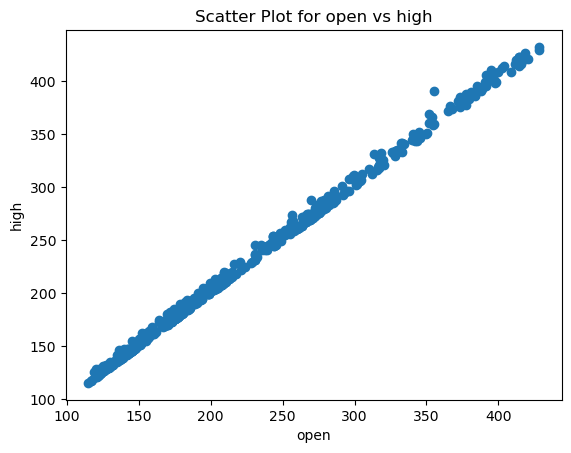

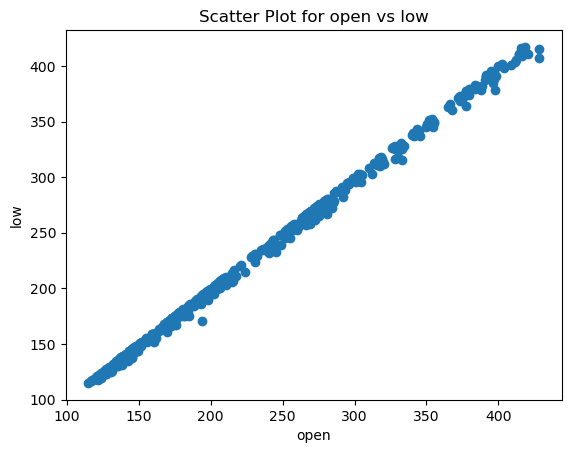

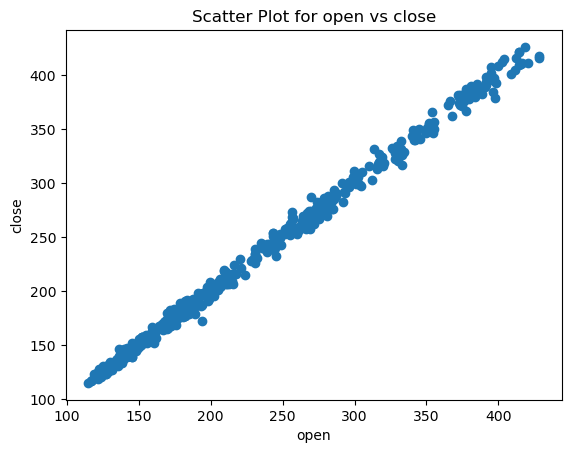

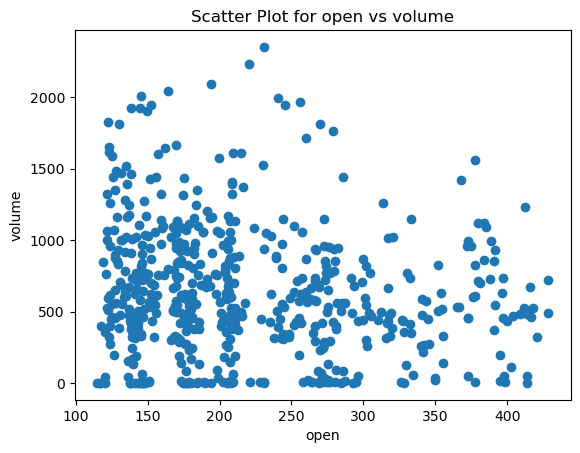

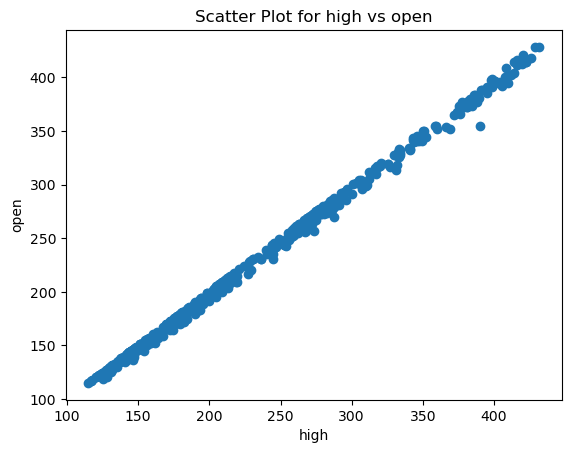

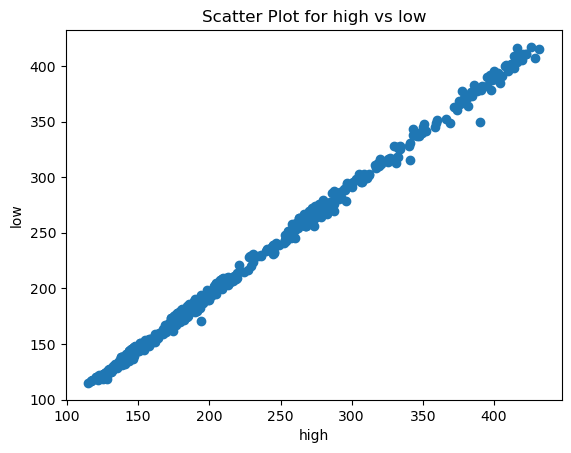

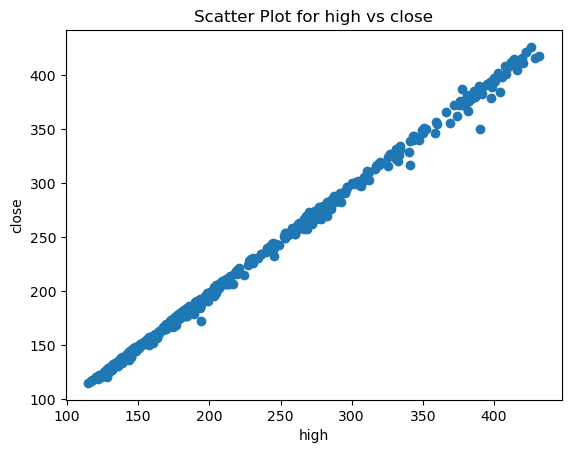

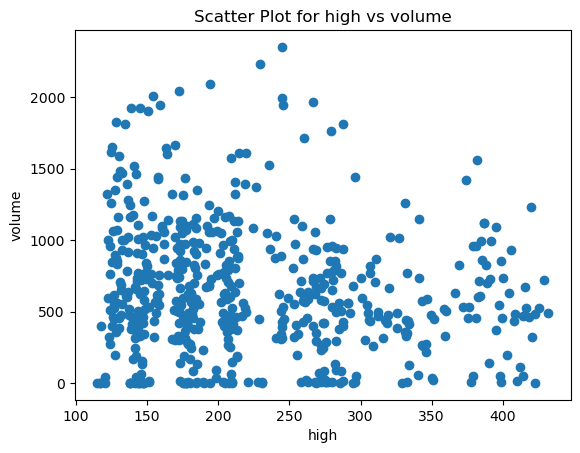

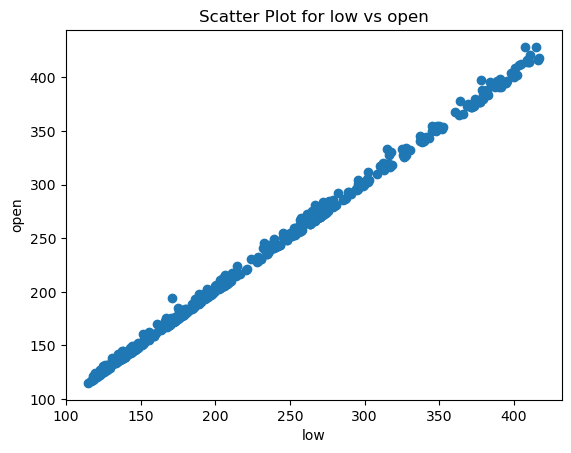

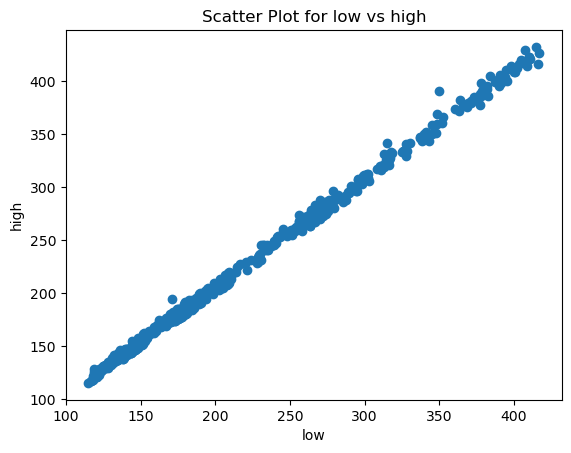

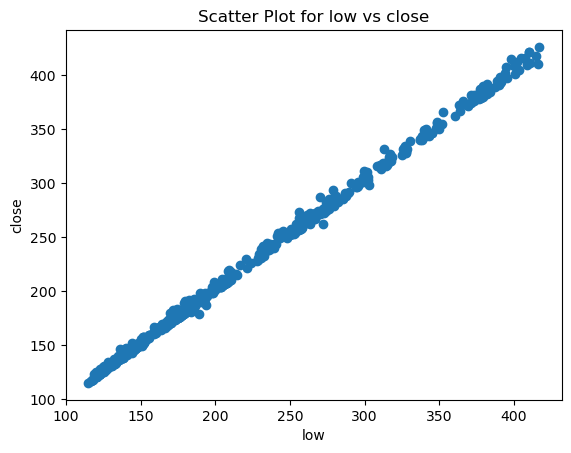

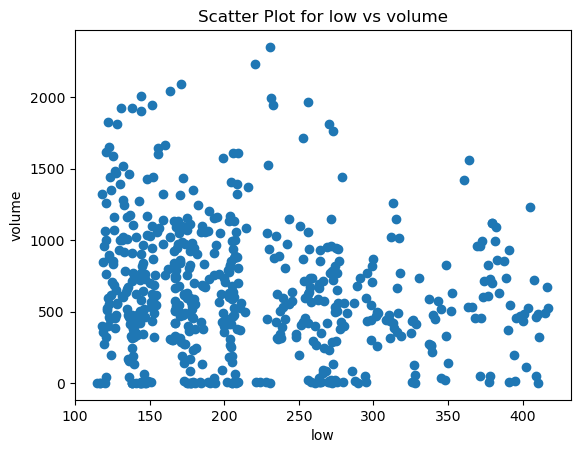

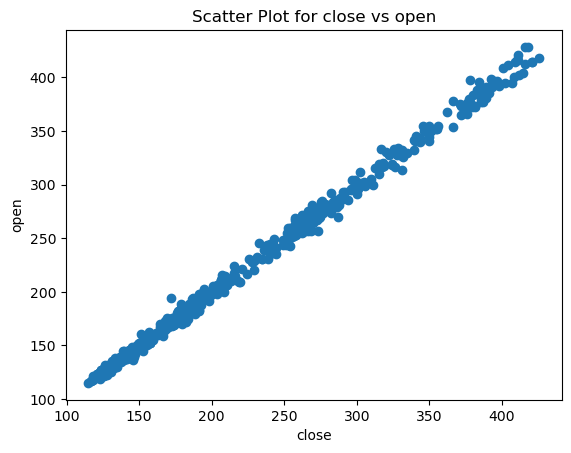

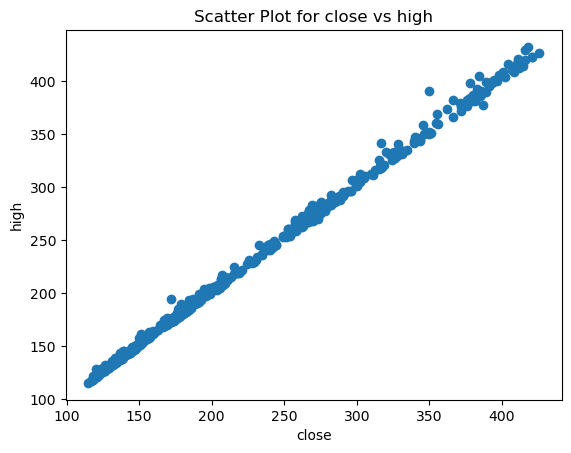

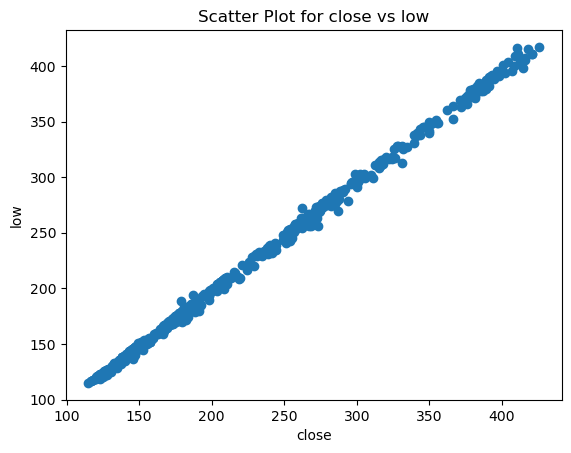

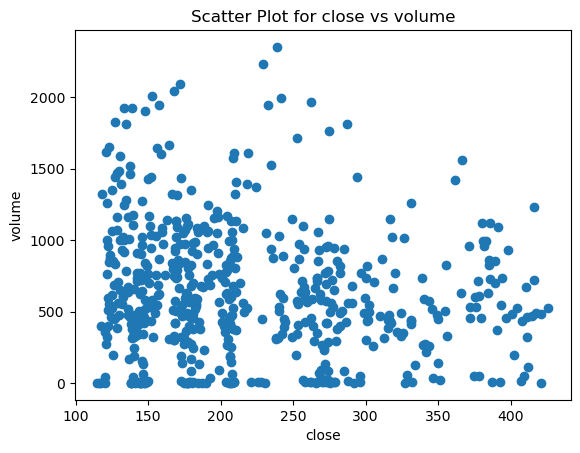

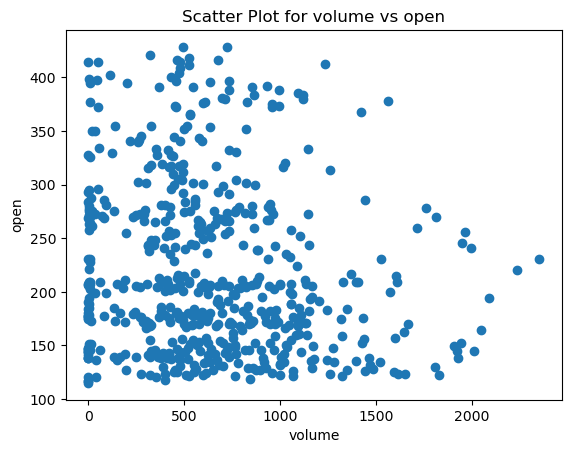

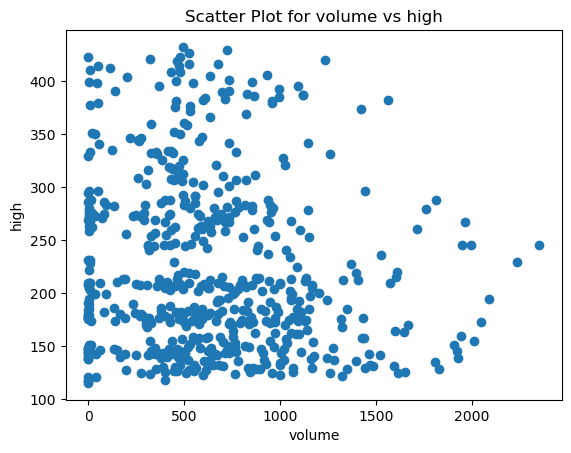

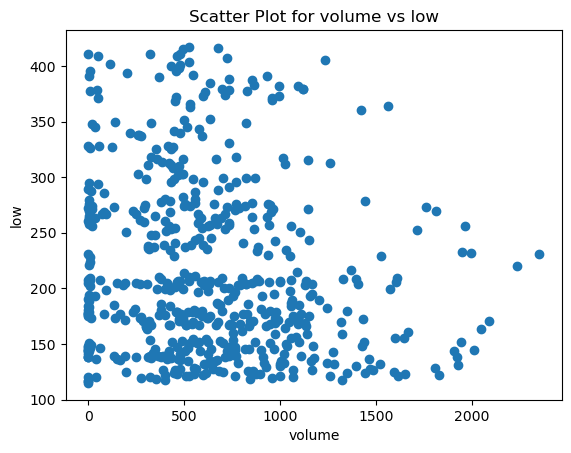

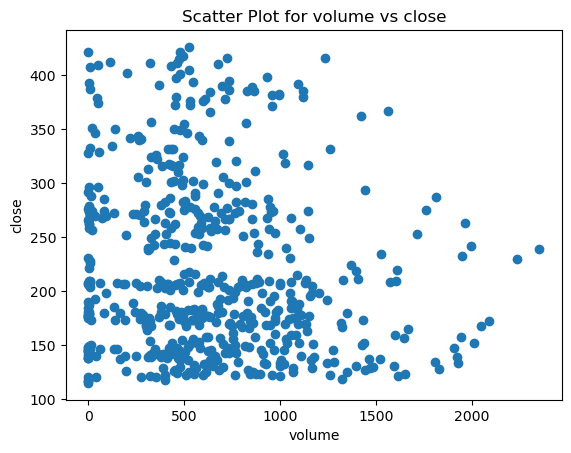

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_commodity_column' with the actual column name where commodity information is stored

# Replace 'Coffee' with the desired commodity
commodity_data = df[df['commodity'] == 'Orange Juice']
features = ['open', 'high', 'low', 'close', 'volume']

# Plot scatter plots for each pair of features
for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            plt.scatter(commodity_data[feature1], commodity_data[feature2])
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title(f'Scatter Plot for {feature1} vs {feature2}')
            plt.show()

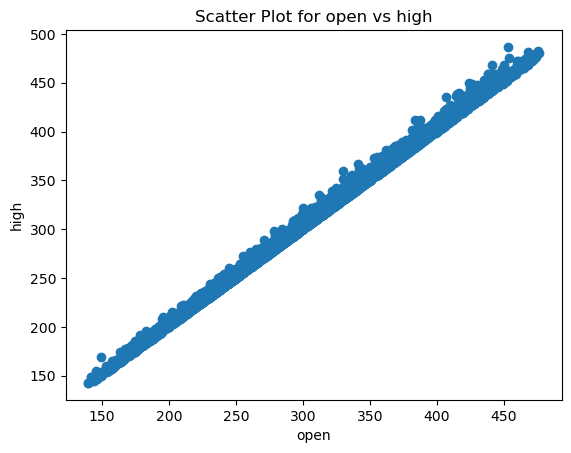

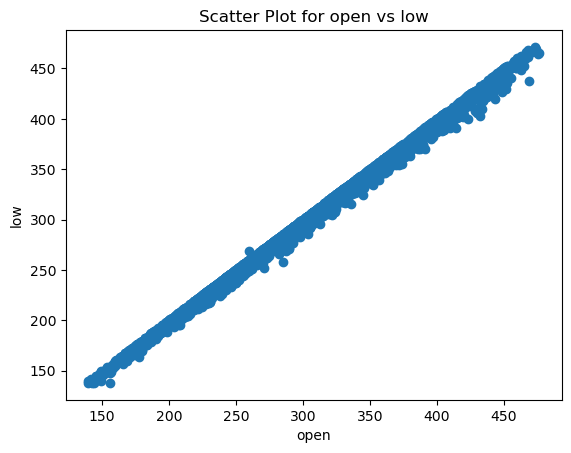

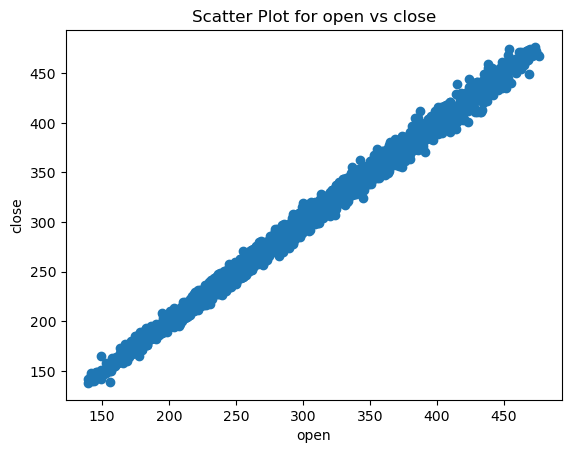

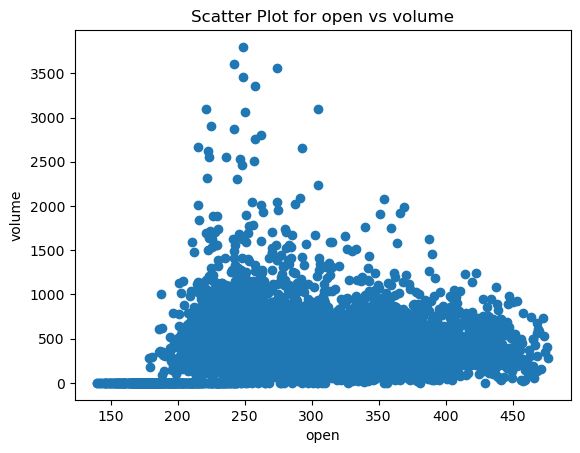

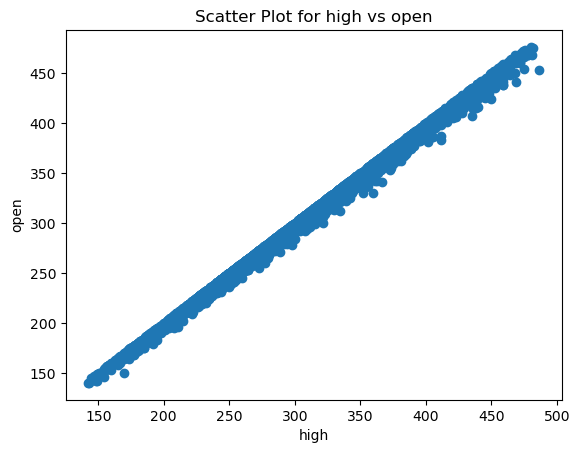

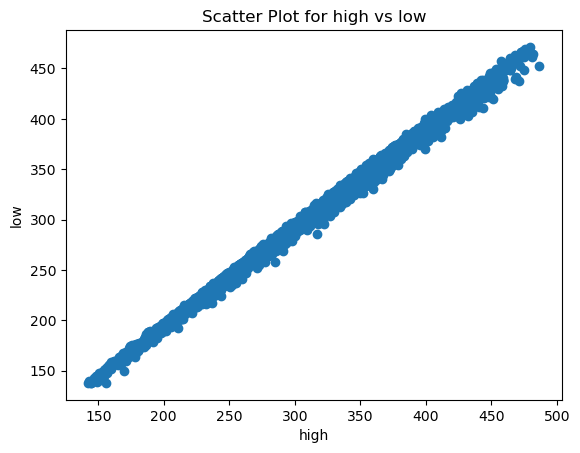

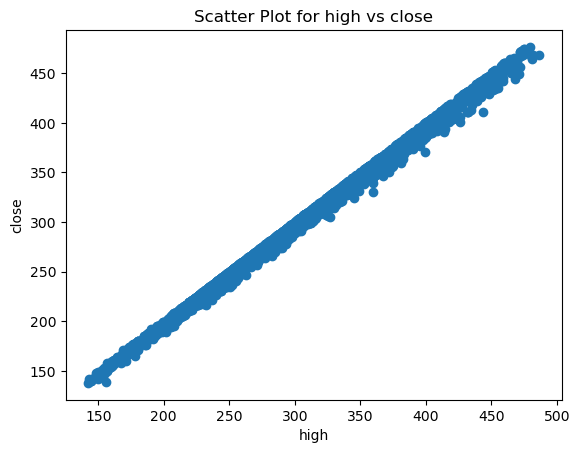

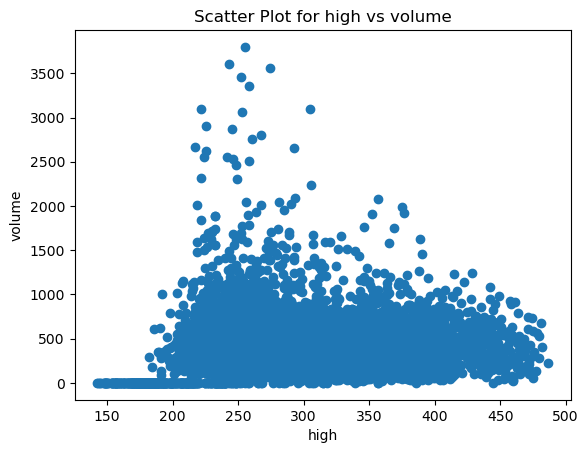

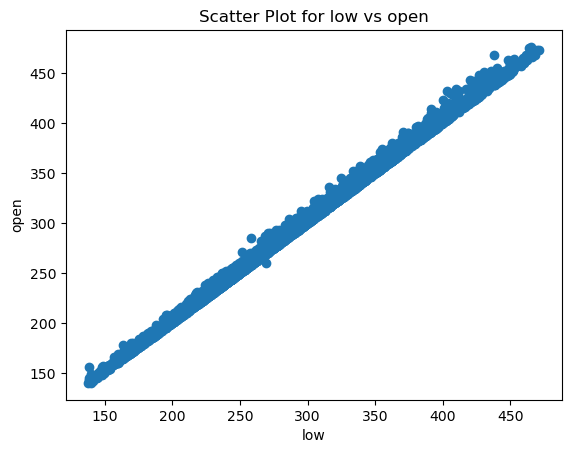

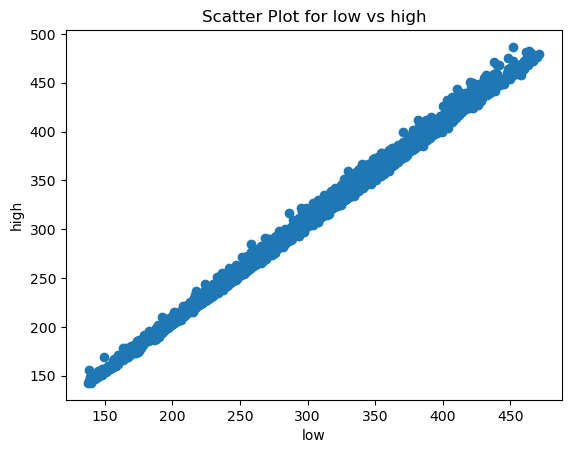

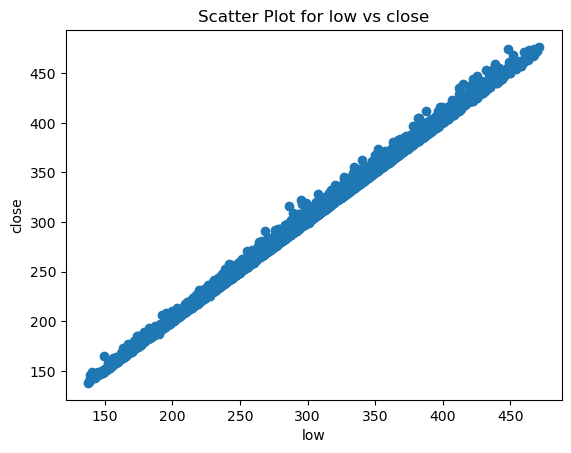

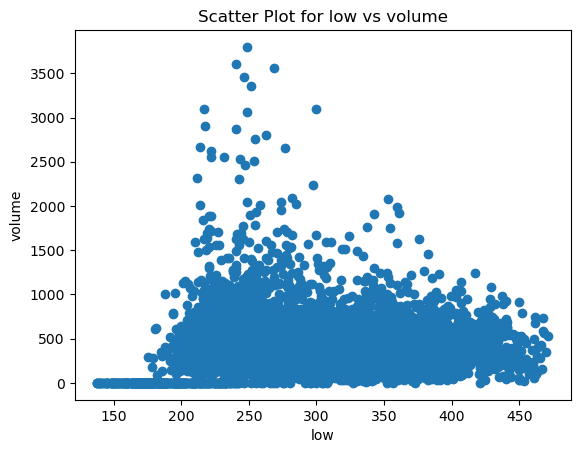

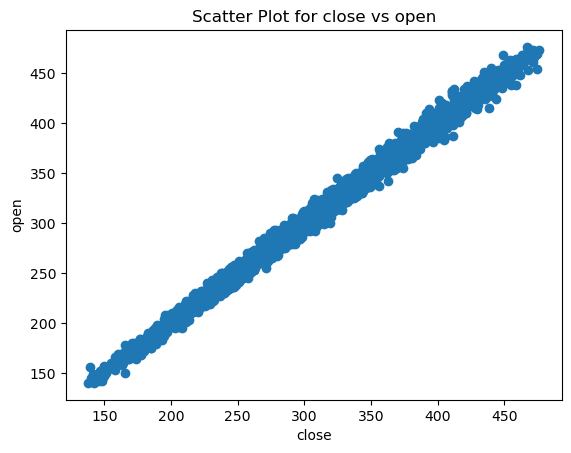

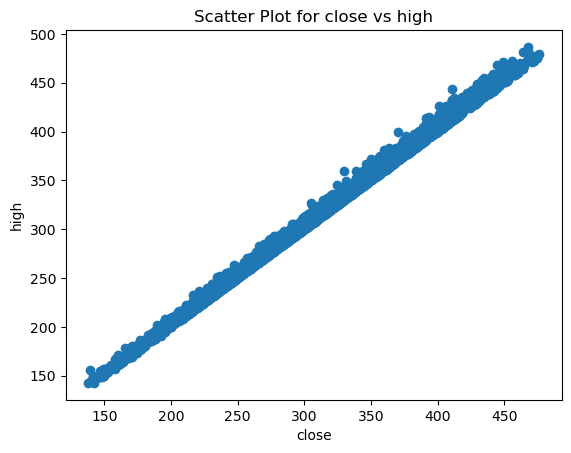

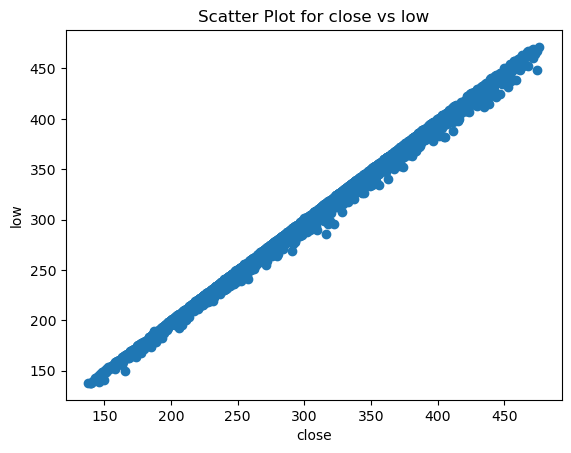

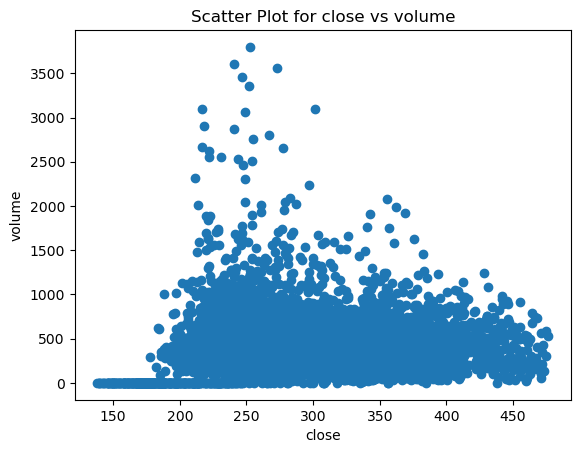

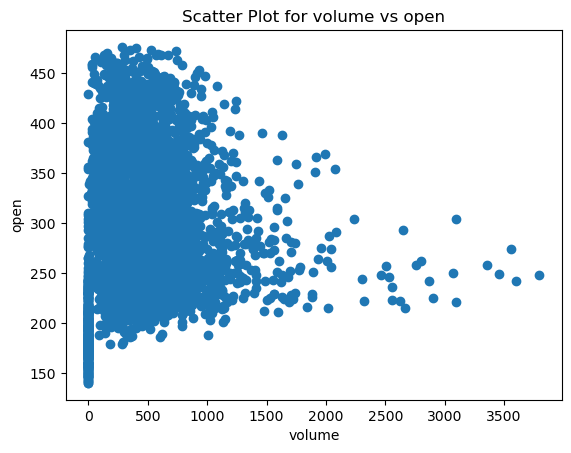

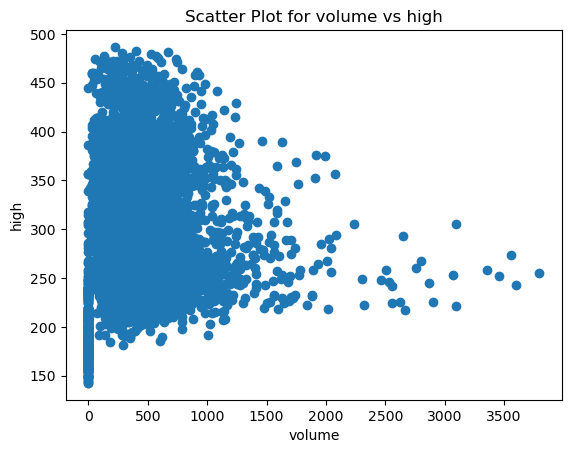

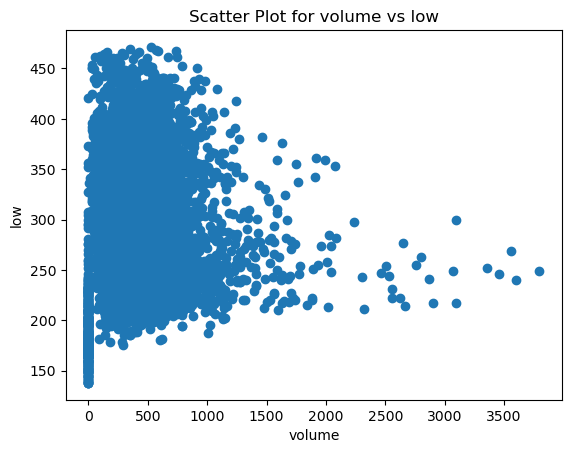

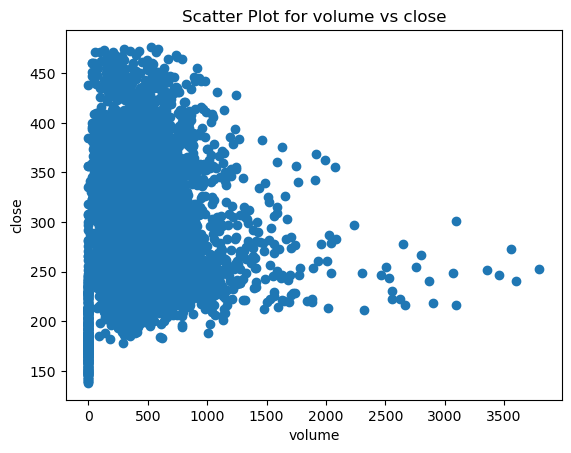

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_commodity_column' with the actual column name where commodity information is stored

# Replace 'Coffee' with the desired commodity
commodity_data = df[df['commodity'] == 'Random Length Lumber']
features = ['open', 'high', 'low', 'close', 'volume']

# Plot scatter plots for each pair of features
for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            plt.scatter(commodity_data[feature1], commodity_data[feature2])
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title(f'Scatter Plot for {feature1} vs {feature2}')
            plt.show()

# 2) Supply Chain Analysis
# Correlation Matrix for each commodity for analyzing relation between the features

C:\Users\Sharmeen\AppData\Local\Temp\ipykernel_1852\755768376.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = commodity_data.corr()


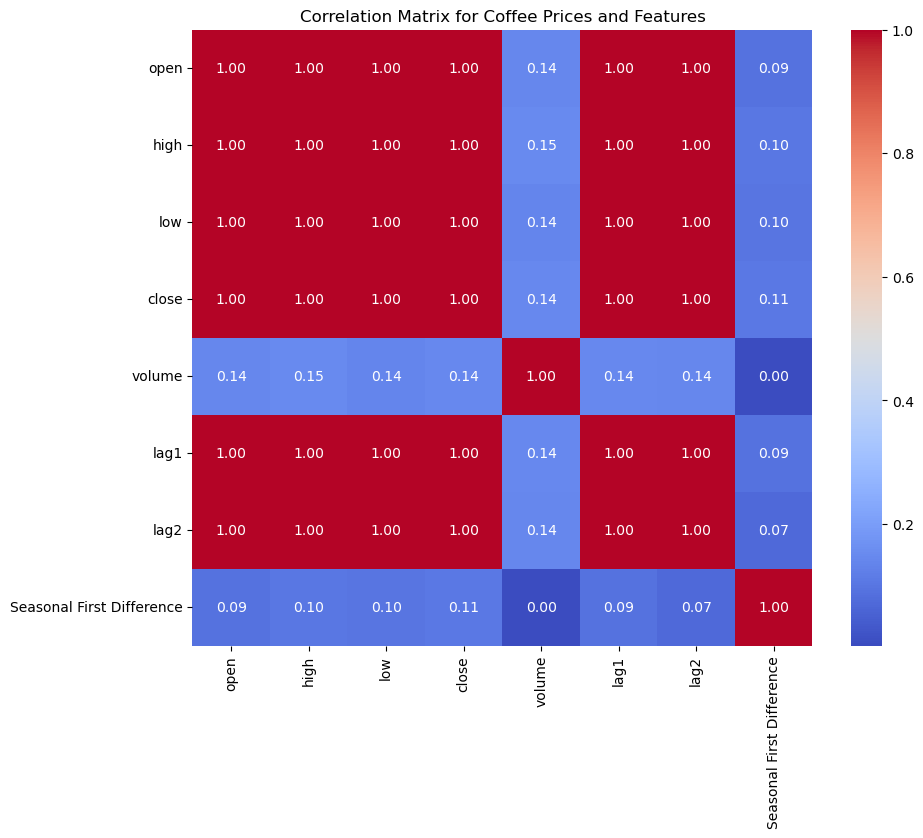

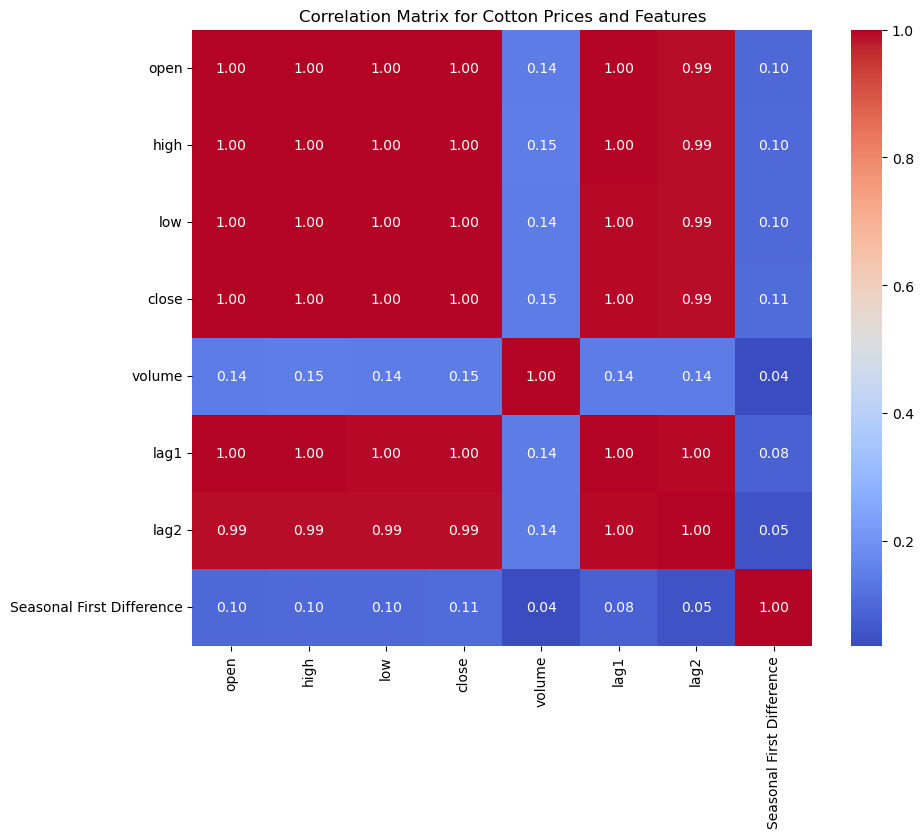

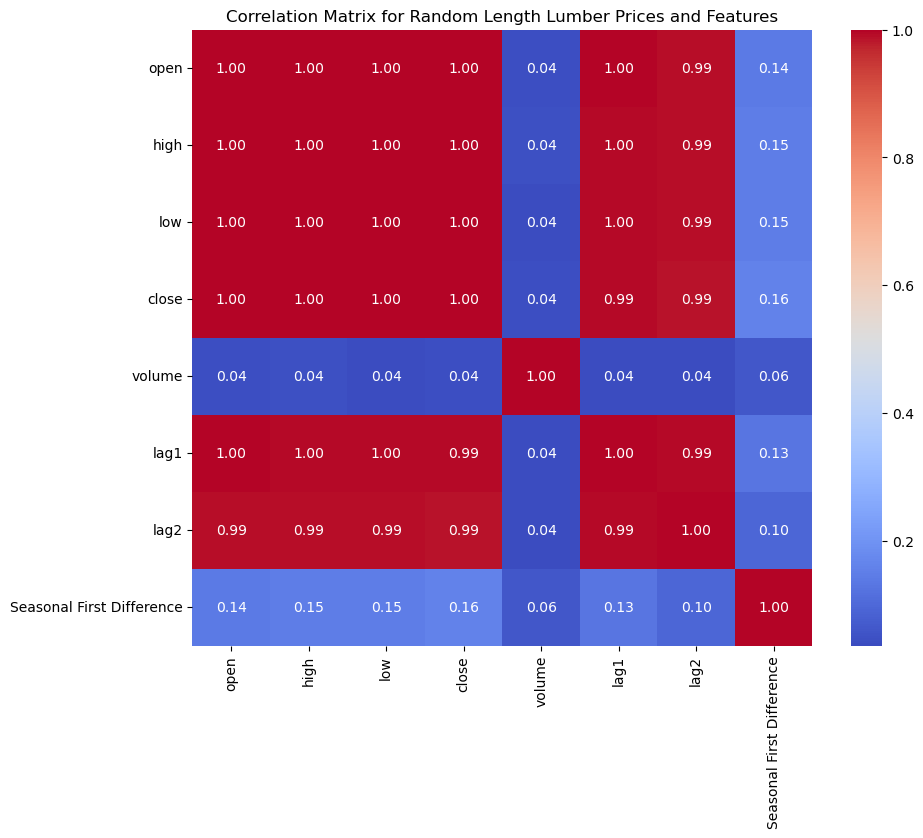

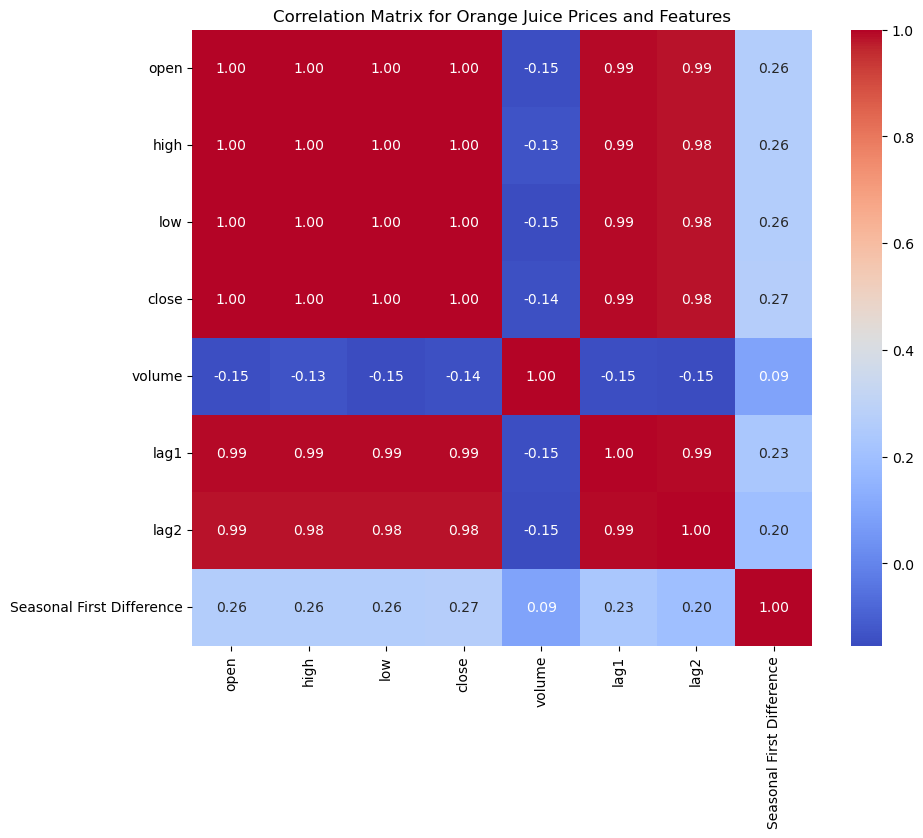

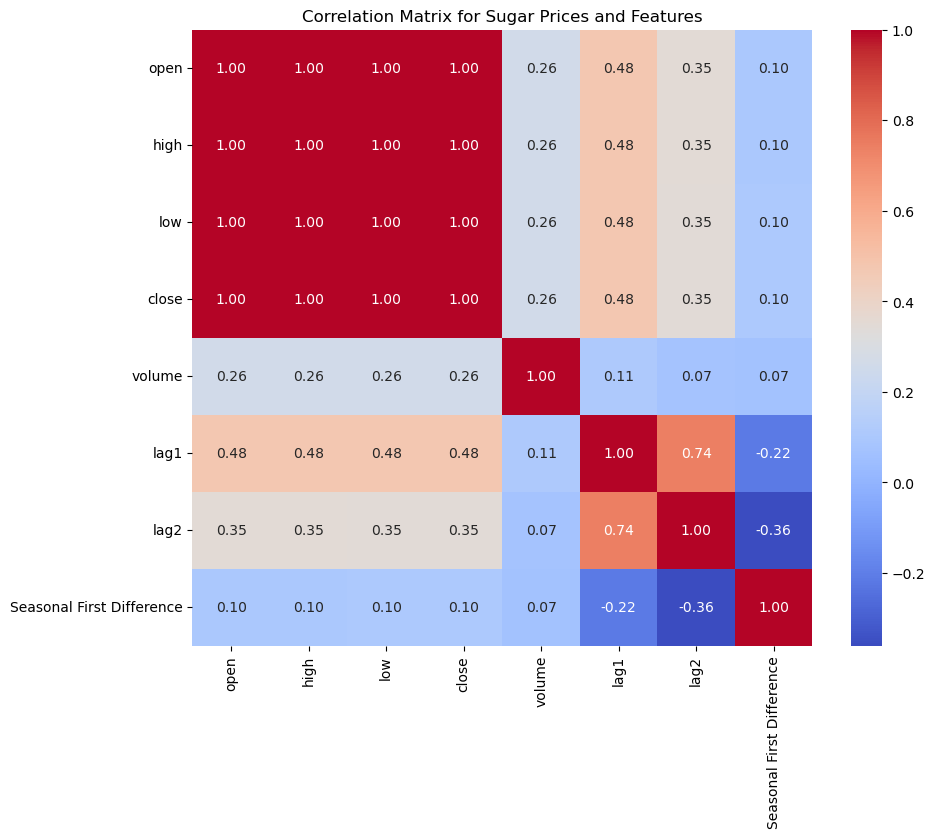

In [82]:
import seaborn as sns

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_commodity_column' with the actual column name where commodity information is stored

commodities = df['commodity'].unique()

# Calculate and visualize correlation coefficients for each commodity
for commodity in commodities:
    commodity_data = df[df['commodity'] == commodity]
    correlations = commodity_data.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {commodity} Prices and Features')
    plt.show()

# Seasonal decomposition for each commodity by additive method

**In additive decomposition, the time series is expressed as the sum of its components:**
- Y(t) = Trend(t) + Seasonal(t) + Residual(t)
- It’s suitable when the magnitude of seasonality doesn’t vary with the magnitude of the time series.

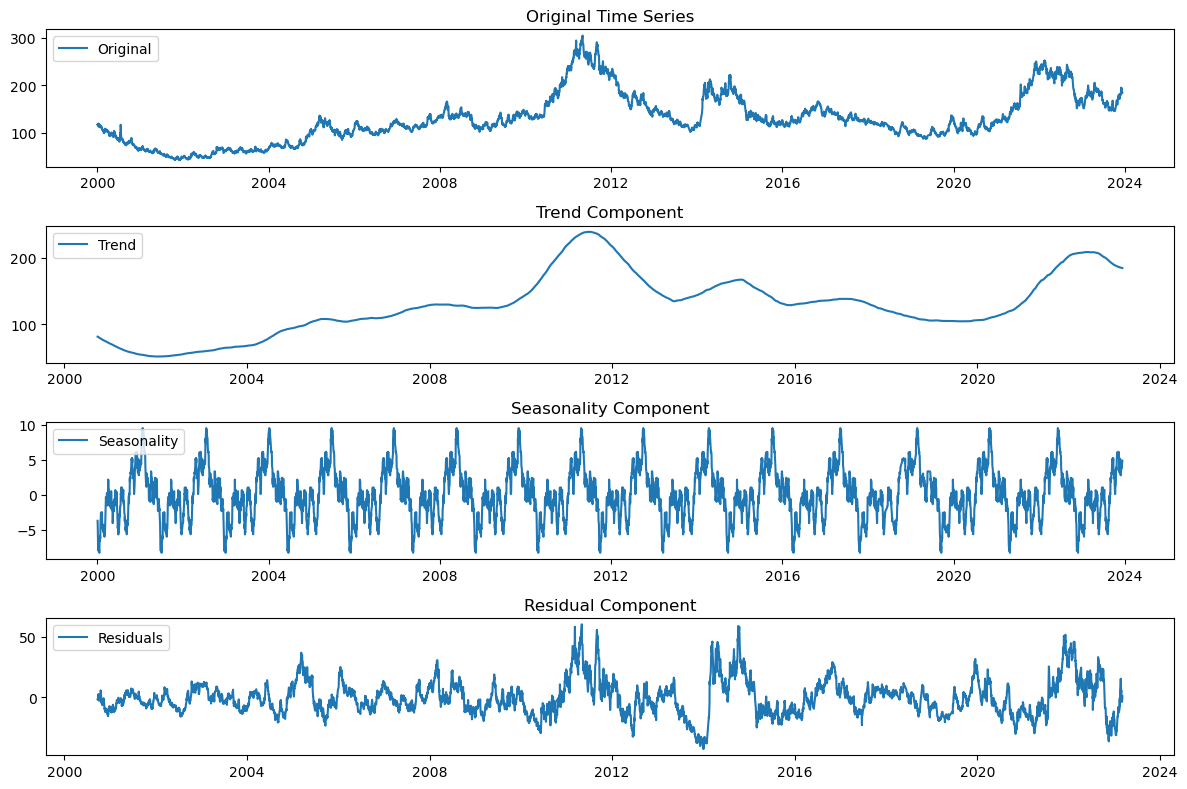

In [83]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Coffee']

# Decompose time series data to visualize trends, seasonality, and residuals
decomposition = seasonal_decompose(commodity_data['close'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(commodity_data['close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

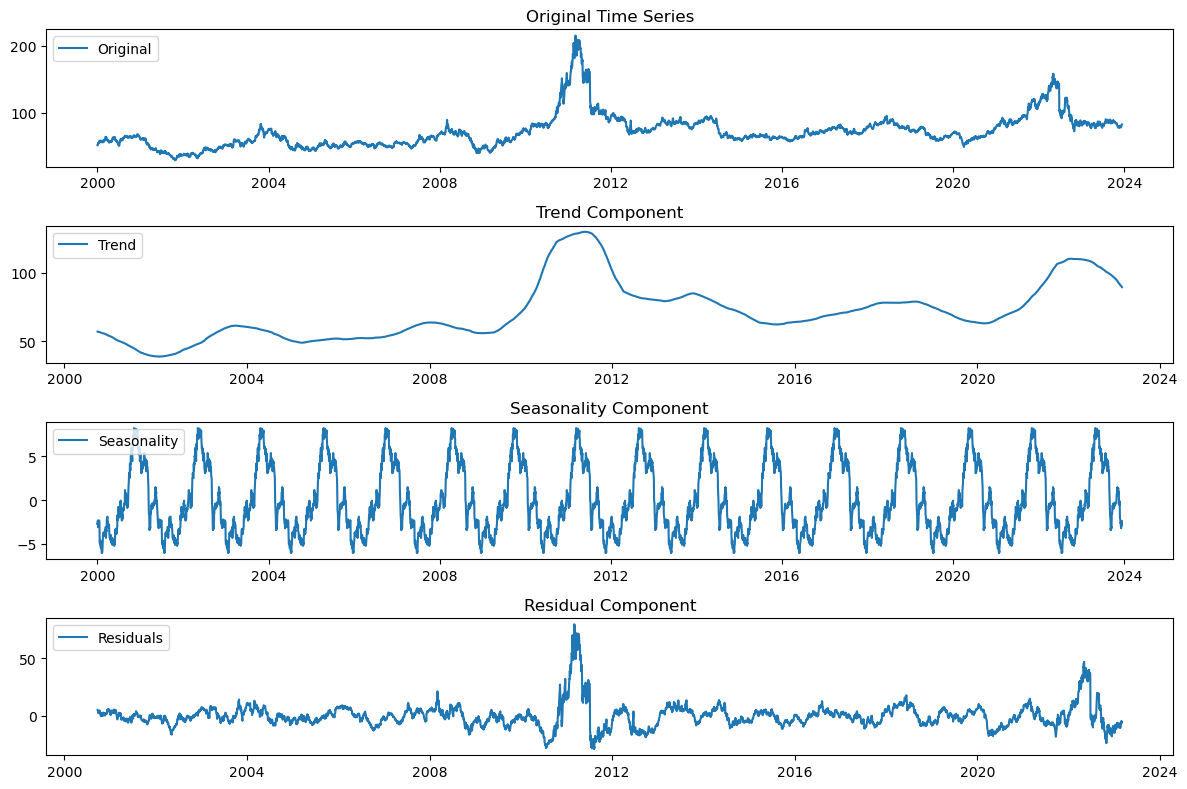

In [84]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Cotton']

# Decompose time series data to visualize trends, seasonality, and residuals
decomposition = seasonal_decompose(commodity_data['close'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(commodity_data['close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

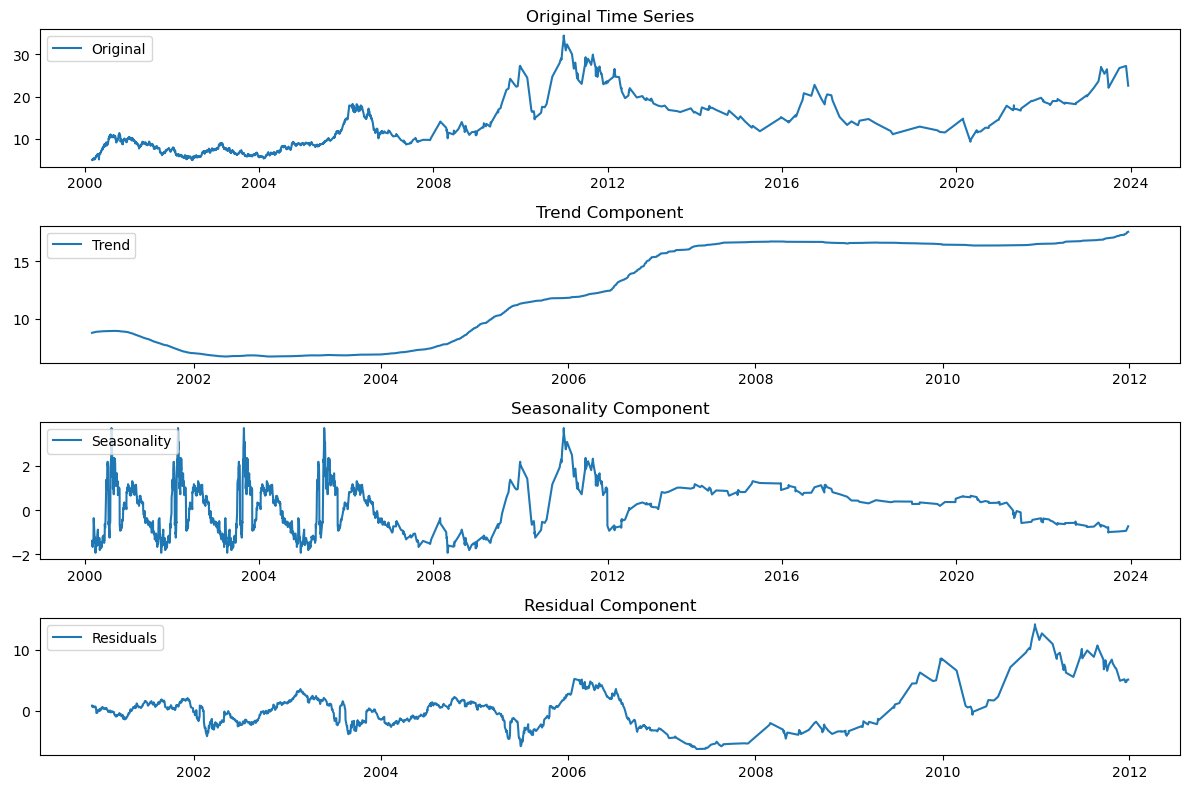

In [85]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Sugar']

# Decompose time series data to visualize trends, seasonality, and residuals
decomposition = seasonal_decompose(commodity_data['close'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(commodity_data['close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

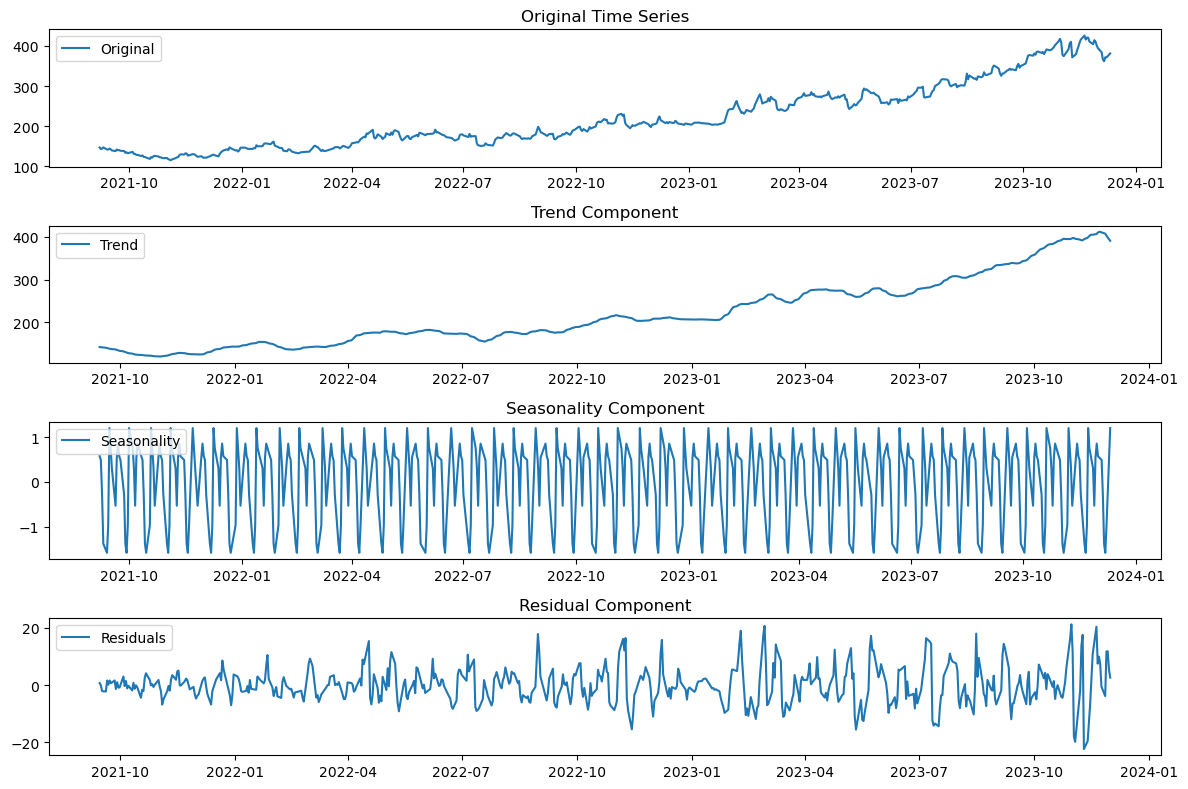

In [86]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Orange Juice']

# Decompose time series data to visualize trends, seasonality, and residuals
decomposition = seasonal_decompose(commodity_data['close'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(commodity_data['close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

## SARIMAX Model for future forecasting
Plotting each commodity's graph with SARIMAX and with setting a confidence interval

**Confidence intervals (sometimes called prediction intervals when used in forecasting) tell us, for a certain level of confidence, a reasonable range of values in which the parameter of interest should fall.**

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Use

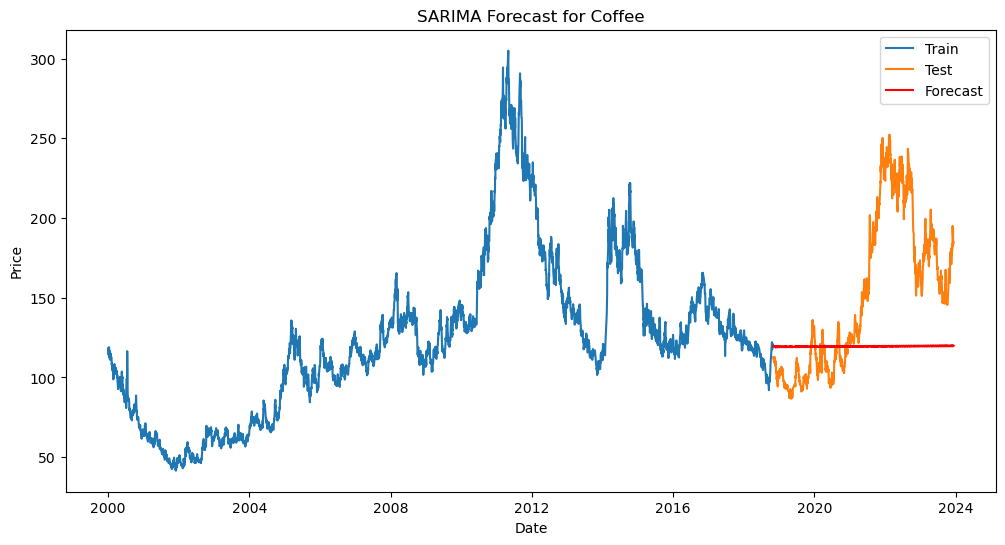

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Coffee']

# Assuming 'close' is your target variable
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Forecast')
plt.title('SARIMA Forecast for Coffee')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


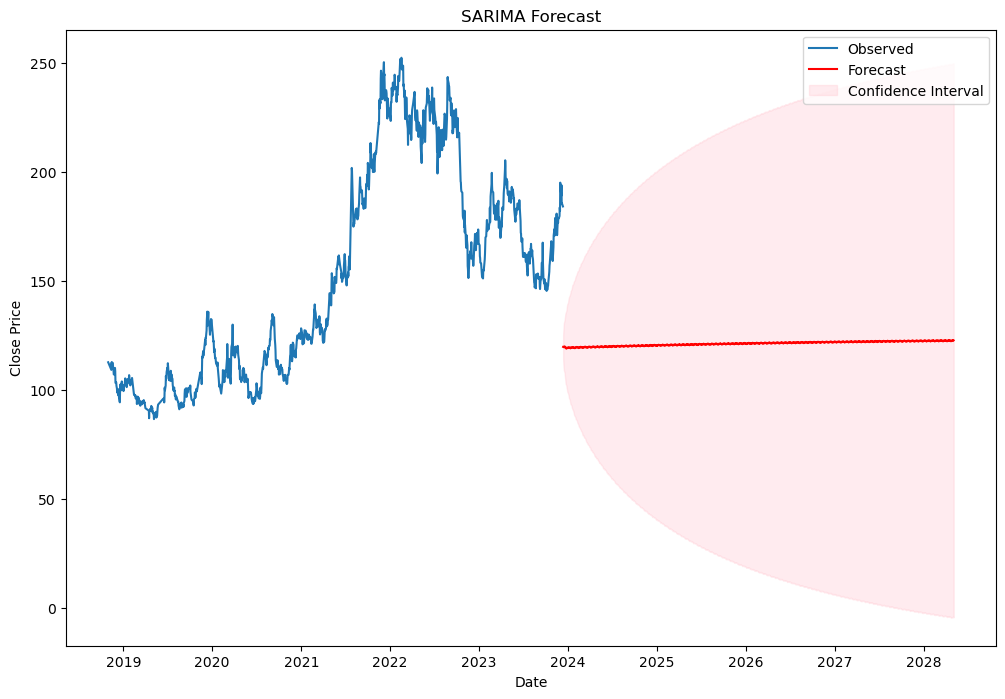

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Coffee']

# Assuming 'close' is the correct column name
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (1, 0, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
# Create future dates for plotting
future_dates = pd.date_range(start=test.index[-1], periods=len(test)+1, freq='B')[1:]

# Plotting the forecast
plt.figure(figsize=(12, 8))
plt.plot(test.index, test, label='Observed')
plt.plot(future_dates, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(future_dates, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


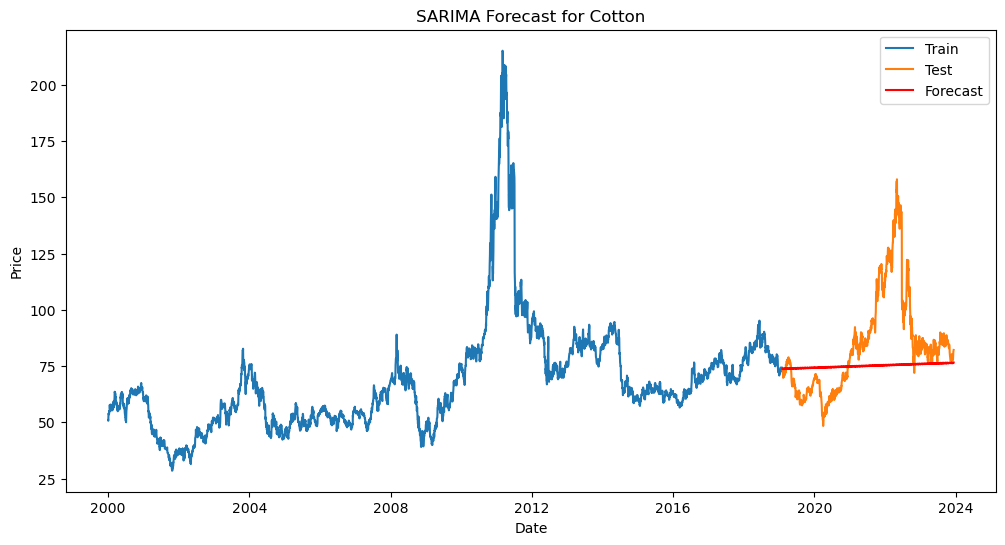

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Cotton']

# Assuming 'close' is your target variable
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Forecast')
plt.title('SARIMA Forecast for Cotton')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


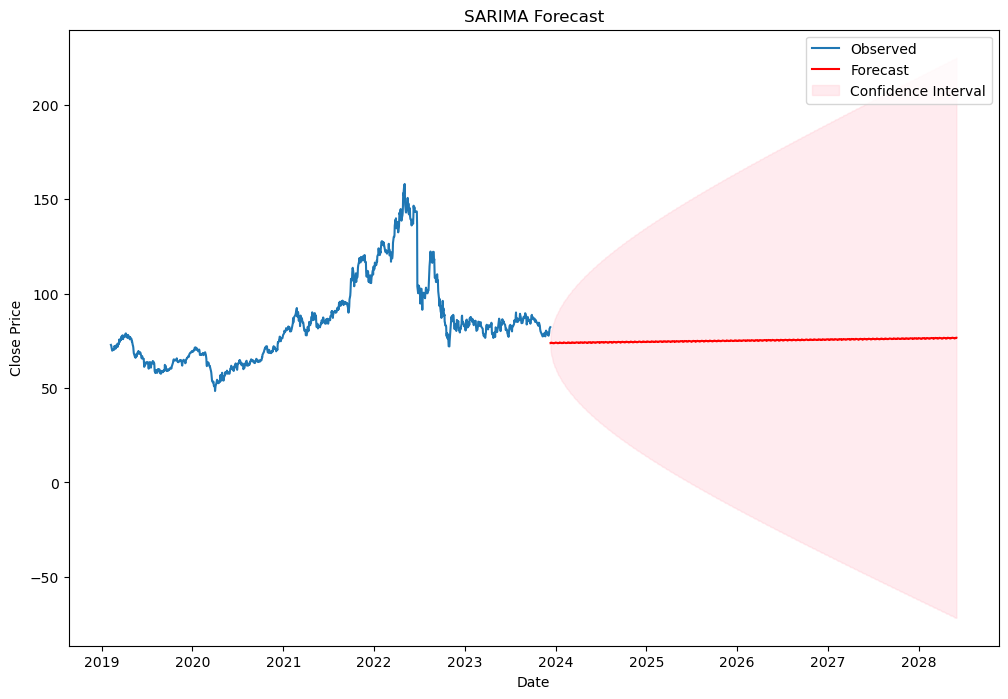

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Cotton']

# Assuming 'close' is the correct column name
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
# Create future dates for plotting
future_dates = pd.date_range(start=test.index[-1], periods=len(test)+1, freq='B')[1:]

# Plotting the forecast
plt.figure(figsize=(12, 8))
plt.plot(test.index, test, label='Observed')
plt.plot(future_dates, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(future_dates, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


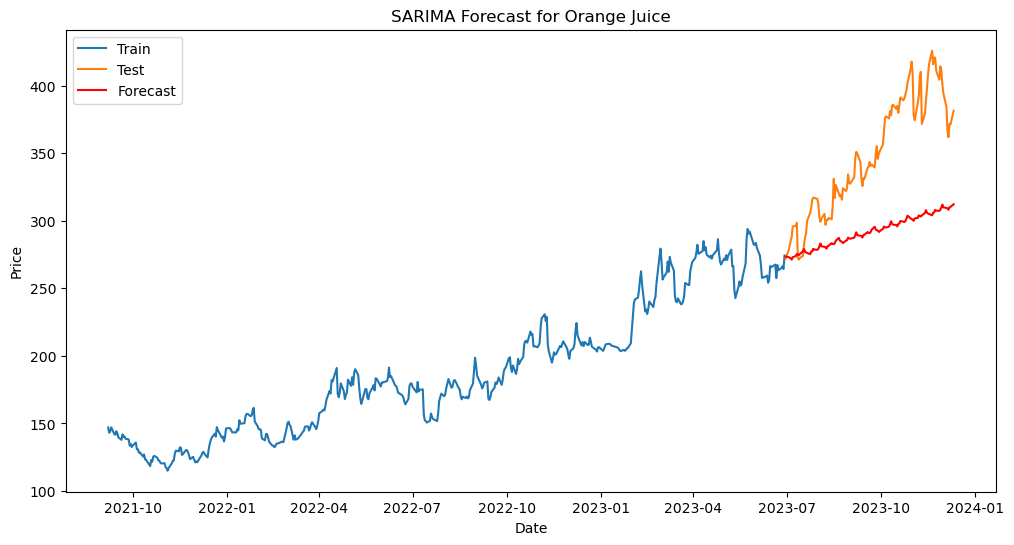

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Orange Juice']

# Assuming 'close' is your target variable
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Forecast')
plt.title('SARIMA Forecast for Orange Juice')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


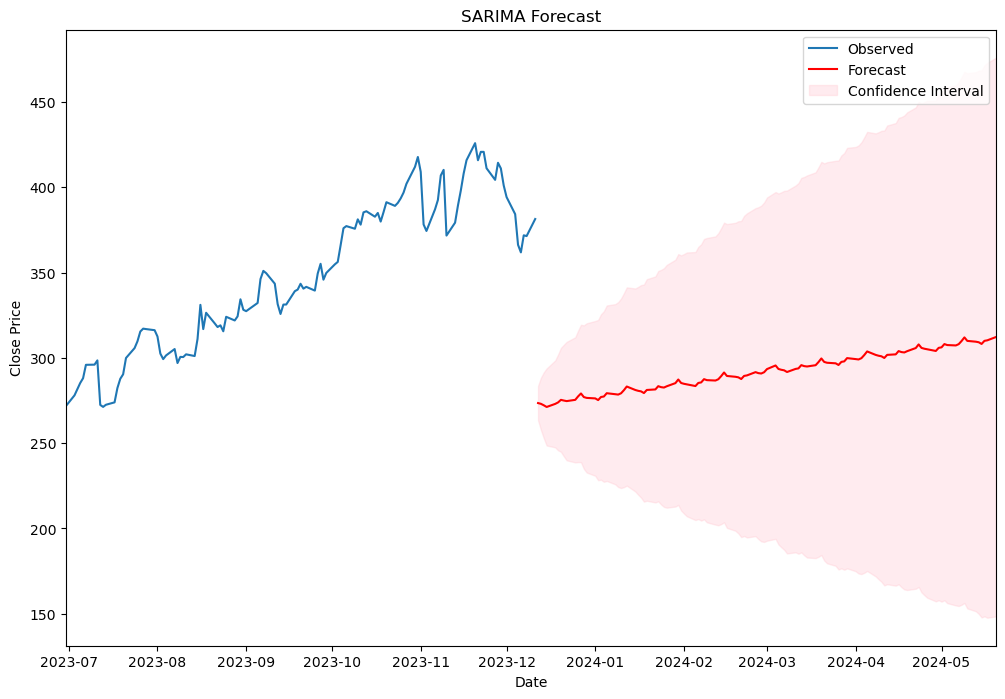

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Orange Juice']

# Assuming 'close' is the correct column name
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
# Create future dates for plotting
future_dates = pd.date_range(start=test.index[-1], periods=len(test) + 1, freq='B')[1:]
# Plotting the forecast
plt.figure(figsize=(12, 8))
plt.plot(test.index, test, label='Observed')

# Plot forecast starting from the end of the observed data
plt.plot(future_dates, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(future_dates, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

# Set x-axis limits to include both observed and forecasted data
plt.xlim(test.index[0], future_dates[-1])

plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


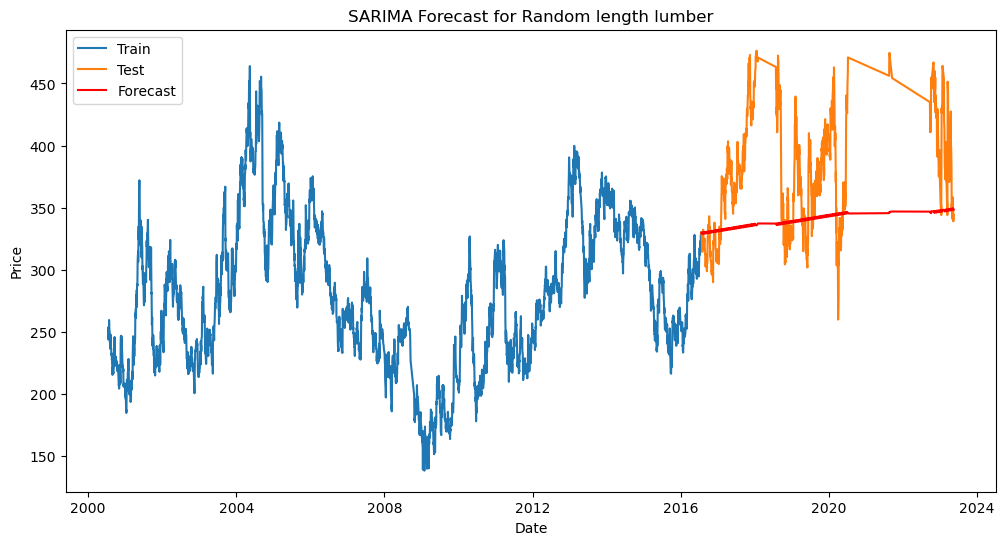

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Random Length Lumber']

# Assuming 'close' is your target variable
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Forecast')
plt.title('SARIMA Forecast for Random length lumber')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


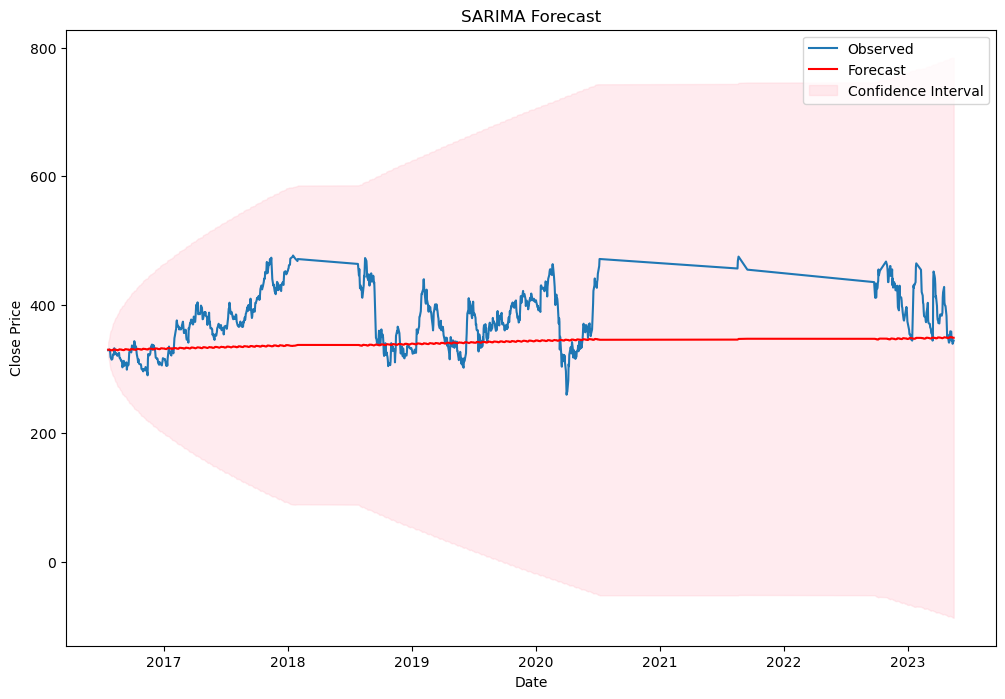

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Random Length Lumber']

# Assuming 'close' is the correct column name
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))

# Plotting the forecast
plt.figure(figsize=(12, 8))
plt.plot(test.index, test, label='Observed')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(test.index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


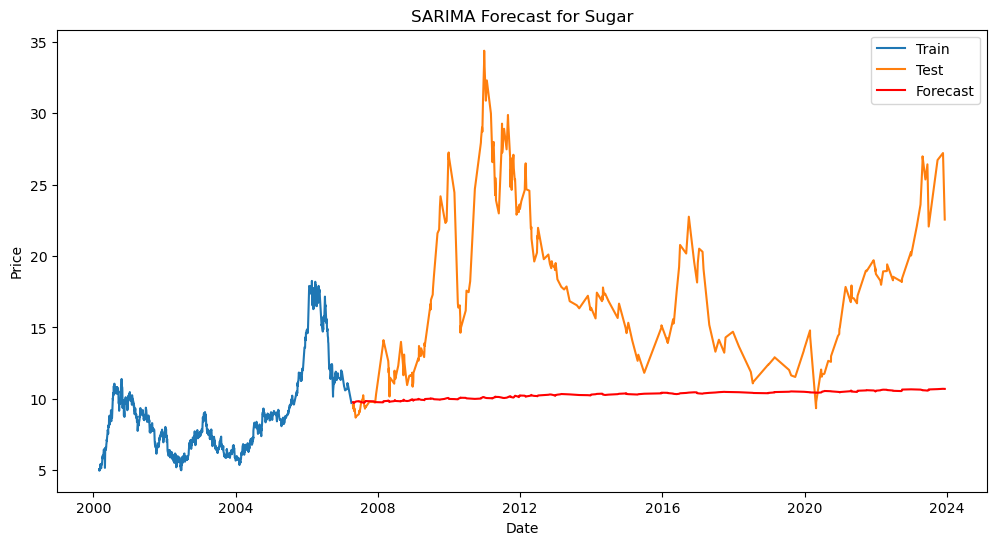

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Sugar']

# Assuming 'close' is your target variable
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Forecast')
plt.title('SARIMA Forecast for Sugar')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sharmeen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


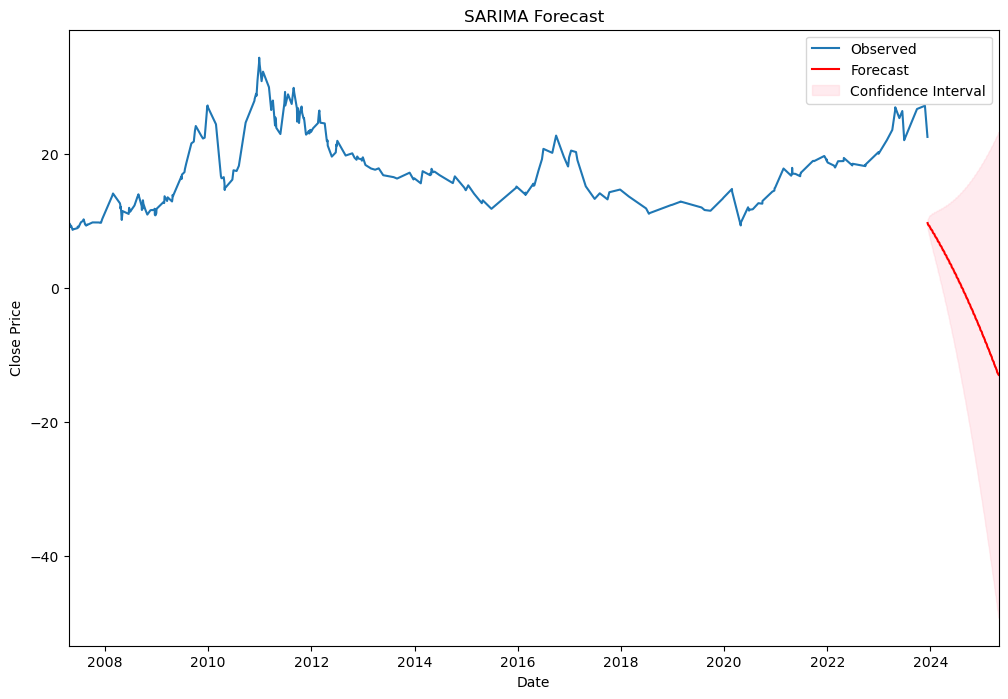

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Sugar']

# Assuming 'close' is the correct column name
target_variable = 'close'

# Split data into training and testing sets
train_size = int(len(commodity_data) * 0.8)
train, test = commodity_data[target_variable][:train_size], commodity_data[target_variable][train_size:]

# Fit ARIMA or SARIMA model
order = (2, 2, 2)  # Example order, you may need to tune these parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  # Use ARIMA if no seasonality
fit_model = model.fit()

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
# Create future dates for plotting
future_dates = pd.date_range(start=test.index[-1], periods=len(test)+1, freq='B')[1:]
# Plotting the forecast
plt.figure(figsize=(12, 8))
plt.plot(test.index, test, label='Observed')

# Plot forecast starting from the end of the observed data
plt.plot(future_dates, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(future_dates, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

# Set x-axis limits to include both observed and forecasted data
plt.xlim(test.index[0], future_dates[-1])

plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# LSTM(Long-Short Term Memory) model for more accurate forecast

In [99]:
#LSTM MODEL
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame with commodity prices and features
commodity_data = df[df['commodity'] == 'Coffee']
target_variable = 'close'

# Extract the target variable and normalize
data = commodity_data[target_variable].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert the time series data into sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i : i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

seq_length = 8  # Adjust the sequence length as needed
X = create_sequences(data_scaled, seq_length)
y = data_scaled[seq_length:]

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics (e.g., MAE, MSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

36/36 [==============================] - 1s 4ms/step
Mean Absolute Error: 127.33440463470059
Mean Squared Error: 19152.210302013966


In [101]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with commodity prices and features
# Replace 'your_target_commodity' with the actual commodity you want to analyze

commodity_data = df[df['commodity'] == 'Coffee']

# Assuming 'close' is the correct column name
target_variable = 'close'

# Extract the target variable
data = commodity_data[[target_variable]].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Function to create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

# Define sequence length
sequence_length = 10  # You may need to tune this parameter

# Create sequences for training
train_sequences = create_sequences(train, sequence_length)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_sequences.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_sequences, train[sequence_length:], epochs=100, batch_size=32)

# Create sequences for testing
test_sequences = create_sequences(test, sequence_length)

# Make predictions
predictions = model.predict(test_sequences)

# Inverse transform to get original scale
predictions = scaler.inverse_transform(predictions)
test_original = scaler.inverse_transform(test[sequence_length:])

Epoch 1/100
143/143 [==============================] - 10s 16ms/step - loss: 0.0042
Epoch 2/100
143/143 [==============================] - 2s 15ms/step - loss: 5.1336e-04
Epoch 3/100
143/143 [==============================] - 2s 15ms/step - loss: 4.7926e-04
Epoch 4/100
143/143 [==============================] - 2s 15ms/step - loss: 4.8353e-04
Epoch 5/100
143/143 [==============================] - 2s 15ms/step - loss: 4.6030e-04
Epoch 6/100
143/143 [==============================] - 2s 15ms/step - loss: 4.1960e-04
Epoch 7/100
143/143 [==============================] - 2s 15ms/step - loss: 3.9582e-04
Epoch 8/100
143/143 [==============================] - 2s 15ms/step - loss: 3.8252e-04
Epoch 9/100
143/143 [==============================] - 2s 14ms/step - loss: 3.4083e-04
Epoch 10/100
143/143 [==============================] - 2s 15ms/step - loss: 3.2083e-04
Epoch 11/100
143/143 [==============================] - 2s 15ms/step - loss: 3.6552e-04
Epoch 12/100
143/143 [======================

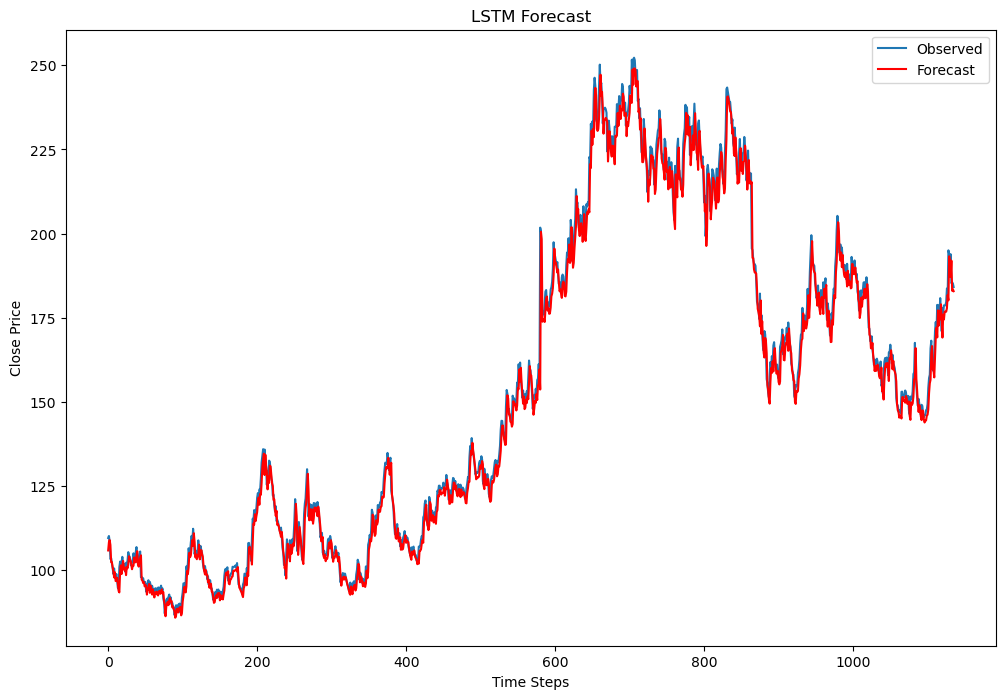

In [102]:
# Plotting the forecast
plt.figure(figsize=(12, 8))
plt.plot(test_original, label='Observed')
plt.plot(predictions, color='red', label='Forecast')
plt.title('LSTM Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()

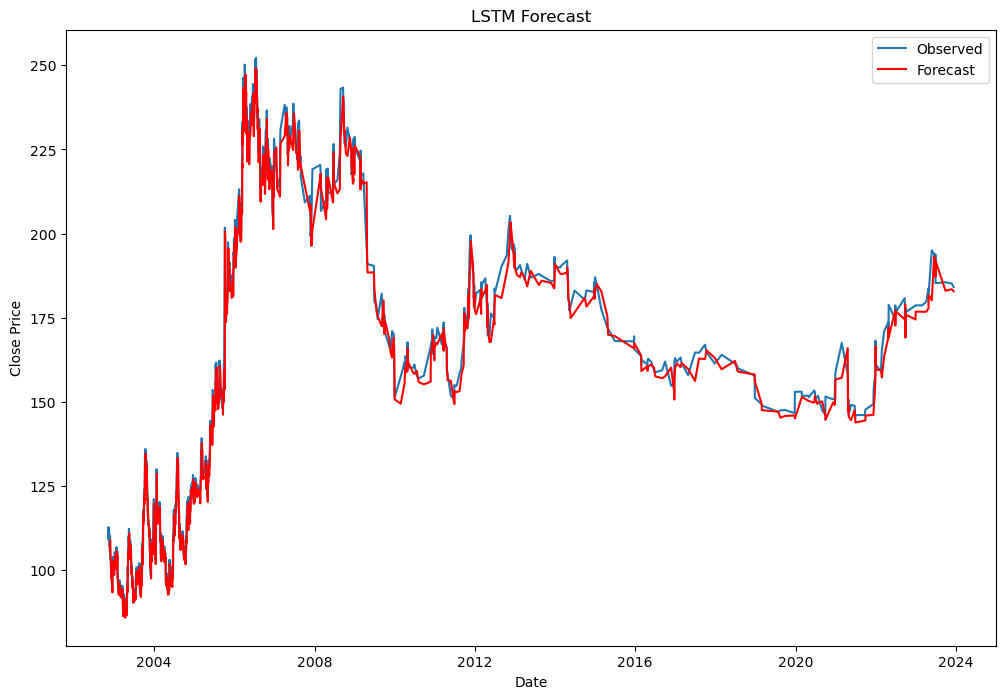

In [104]:
# Assuming 'df' is your DataFrame with a datetime index
# Convert the index to a list of dates
date_index = df.index.tolist()

# Plotting the forecast
plt.figure(figsize=(12, 8))
plt.plot(date_index[-len(y_test_original):], y_test_original, label='Observed')
plt.plot(date_index[-len(predictions):], predictions, color='red', label='Forecast')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [105]:
# Assuming your DataFrame is named 'df'
unique_commodities = df['commodity'].unique()
print(unique_commodities)

['Coffee' 'Cotton' 'Random Length Lumber' 'Orange Juice' 'Sugar']


In [106]:
df

ticker commodity        open        high         low       close  \
date                                                                          
2000-01-03   KC=F    Coffee  124.000000  124.000000  116.099998  116.500000   
2000-01-04   KC=F    Coffee  116.500000  120.500000  115.750000  116.250000   
2000-01-05   KC=F    Coffee  115.000000  121.000000  115.000000  118.599998   
2000-01-06   KC=F    Coffee  119.000000  121.400002  116.500000  116.849998   
2000-01-07   KC=F    Coffee  117.750000  117.750000  113.800003  114.150002   
...           ...       ...         ...         ...         ...         ...   
2023-06-28   SB=F     Sugar   23.280001   23.290001   22.459999   22.570000   
2023-06-29   SB=F     Sugar   22.629999   22.629999   21.809999   22.070000   
2023-09-28   SB=F     Sugar   26.240000   26.850000   25.950001   26.730000   
2023-11-23   SB=F     Sugar   27.770000   27.770000   27.160000   27.219999   
2023-12-11   SB=F     Sugar   23.440001   23.490000   22.170000   22.559999   

            volume        lag1        lag2  Seasonal First Difference  
date                                                                   
2000-01-03    6640         NaN         NaN                        NaN  
2000-01-04    5492  116.500000         NaN                        NaN  
2000-01-05    6165  116.250000  116.500000                        NaN  
2000-01-06    5094  118.599998  116.250000                        NaN  
2000-01-07    6855  116.849998  118.599998                        NaN  
...            ...         ...         ...                        ...  
2023-06-28    9609   23.030001   26.430000                   4.379999  
2023-06-29   22912   22.570000   23.030001                   3.779999  
2023-09-28   19285   22.070000   22.570000                   8.289999  
2023-11-23       0   26.730000   22.070000                   6.929998  
2023-12-11       0   27.219999   26.730000                   2.519999  

[18951 rows x 10 columns]

# 3) Demand Projection

In [107]:
# Assuming 'date' is your date column
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['season'] = (df.index.month % 12 + 3) // 3  # Calculate season (assuming 3-month seasons)
df['lag1'] = df['close'].shift(1)  # Lag feature for one time step
df['lag2'] = df['close'].shift(2)  # Lag feature for two time steps

In [108]:
df

ticker commodity        open        high         low       close  \
date                                                                          
2000-01-03   KC=F    Coffee  124.000000  124.000000  116.099998  116.500000   
2000-01-04   KC=F    Coffee  116.500000  120.500000  115.750000  116.250000   
2000-01-05   KC=F    Coffee  115.000000  121.000000  115.000000  118.599998   
2000-01-06   KC=F    Coffee  119.000000  121.400002  116.500000  116.849998   
2000-01-07   KC=F    Coffee  117.750000  117.750000  113.800003  114.150002   
...           ...       ...         ...         ...         ...         ...   
2023-06-28   SB=F     Sugar   23.280001   23.290001   22.459999   22.570000   
2023-06-29   SB=F     Sugar   22.629999   22.629999   21.809999   22.070000   
2023-09-28   SB=F     Sugar   26.240000   26.850000   25.950001   26.730000   
2023-11-23   SB=F     Sugar   27.770000   27.770000   27.160000   27.219999   
2023-12-11   SB=F     Sugar   23.440001   23.490000   22.170000   22.559999   

            volume        lag1        lag2  Seasonal First Difference  \
date                                                                    
2000-01-03    6640         NaN         NaN                        NaN   
2000-01-04    5492  116.500000         NaN                        NaN   
2000-01-05    6165  116.250000  116.500000                        NaN   
2000-01-06    5094  118.599998  116.250000                        NaN   
2000-01-07    6855  116.849998  118.599998                        NaN   
...            ...         ...         ...                        ...   
2023-06-28    9609   23.030001   26.430000                   4.379999   
2023-06-29   22912   22.570000   23.030001                   3.779999   
2023-09-28   19285   22.070000   22.570000                   8.289999   
2023-11-23       0   26.730000   22.070000                   6.929998   
2023-12-11       0   27.219999   26.730000                   2.519999   

            day_of_week  month  season  
date                                    
2000-01-03            0      1       1  
2000-01-04            1      1       1  
2000-01-05            2      1       1  
2000-01-06            3      1       1  
2000-01-07            4      1       1  
...                 ...    ...     ...  
2023-06-28            2      6       3  
2023-06-29            3      6       3  
2023-09-28            3      9       4  
2023-11-23            3     11       4  
2023-12-11            0     12       1  

[18951 rows x 13 columns]

In [109]:
df.columns

Index(['ticker', 'commodity', 'open', 'high', 'low', 'close', 'volume', 'lag1',
       'lag2', 'Seasonal First Difference', 'day_of_week', 'month', 'season'],
      dtype='object')

# Demand for Coffee by LSTM

In [146]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout

commodity_data = df[df['commodity'] == 'Coffee']

# Define features and target variable
features = ['open', 'high', 'low', 'close', 'volume']
target_variable = 'close'

# Combine features and target variable
selected_columns = features + [target_variable]

# Extract relevant data
data = commodity_data[selected_columns]

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Assuming seq_length is the sequence length used during model training
seq_length = 7  # Adjust this based on your model

# Create sequences for LSTM training
X, y = [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i+seq_length, :-1])  # Exclude the target variable
    y.append(scaled_data[i+seq_length, -1])

X, y = np.array(X), np.array(y)

In [148]:
# Build LSTM model
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dropout(0.2))
# First LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', input_shape=(seq_length, X.shape[2]), return_sequences=True))
# Second LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', return_sequences=True))
# Third LSTM layer without return_sequences
model.add(LSTM(units=100, activation='sigmoid'))
# Output layer
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X, y, epochs=100, batch_size=32)

179/179 [==============================] - 2377s 13s/step - loss: 0.0017
Epoch 64/100
179/179 [==============================] - 6s 32ms/step - loss: 0.0018
Epoch 65/100
179/179 [==============================] - 5s 30ms/step - loss: 0.0018
Epoch 66/100
179/179 [==============================] - 5s 26ms/step - loss: 0.0017
Epoch 67/100
179/179 [==============================] - 4s 24ms/step - loss: 0.0017
Epoch 68/100
179/179 [==============================] - 5s 28ms/step - loss: 0.0017
Epoch 69/100
179/179 [==============================] - 5s 25ms/step - loss: 0.0017
Epoch 70/100
179/179 [==============================] - 5s 29ms/step - loss: 0.0017
Epoch 71/100
179/179 [==============================] - 5s 30ms/step - loss: 0.0017
Epoch 72/100
179/179 [==============================] - 5s 31ms/step - loss: 0.0016
Epoch 73/100
179/179 [==============================] - 5s 28ms/step - loss: 0.0018
Epoch 74/100
179/179 [==============================] - 4s 24ms/step - loss: 0.0017
Epo

In [149]:
# Assuming 'n' is the number of future periods you want to project
n = 5  

# Generate future dates based on the frequency of your historical data
future_dates = pd.date_range(start=df.index[-1], periods=n+1, freq='B')[1:]

# Create a DataFrame with these future dates as index
future_data = pd.DataFrame(index=future_dates, columns=features)

# For simplicity, let's fill the future data with NaNs
future_data.fillna(0, inplace=True)

In [150]:
scaled_future_data = scaler.transform(future_data[features + [target_variable]])

In [151]:
# Reshape the features for LSTM input
scaled_future_data = scaled_future_data.reshape((1, len(features) + 1, n))

In [152]:
# Use the trained LSTM model to project future demand
future_predictions = model.predict(scaled_future_data)

1/1 [==============================] - 2s 2s/step


In [153]:
# Manually scale the predictions back to the original range
min_target = scaler.data_min_[-1]
max_target = scaler.data_max_[1]

In [154]:
future_predictions_original = future_predictions * (max_target - min_target) + min_target

In [155]:
# Create a DataFrame with appropriate date index
future_demand_df = pd.DataFrame(index=future_dates, columns=['Projected_Demand'])

In [156]:
future_demand_df['Projected_Demand'] = future_predictions_original.squeeze()

In [157]:
future_demand_df

Projected_Demand
2023-12-12          38.04084
2023-12-13          38.04084
2023-12-14          38.04084
2023-12-15          38.04084
2023-12-18          38.04084

In [158]:
import matplotlib.pyplot as plt

observed_data = df[df['commodity'] == 'Coffee']['close']

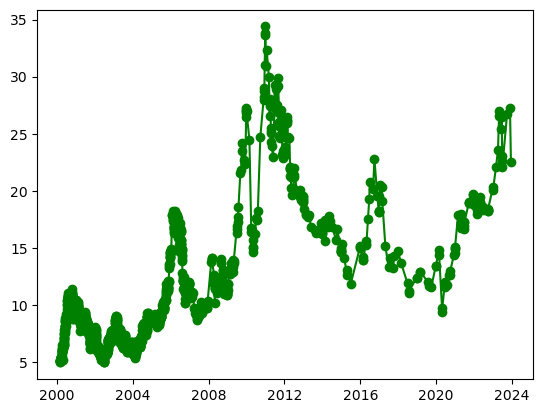

In [227]:
# Plotting the observed data
plt.plot(observed_data, label='Observed', marker='o',color='green')

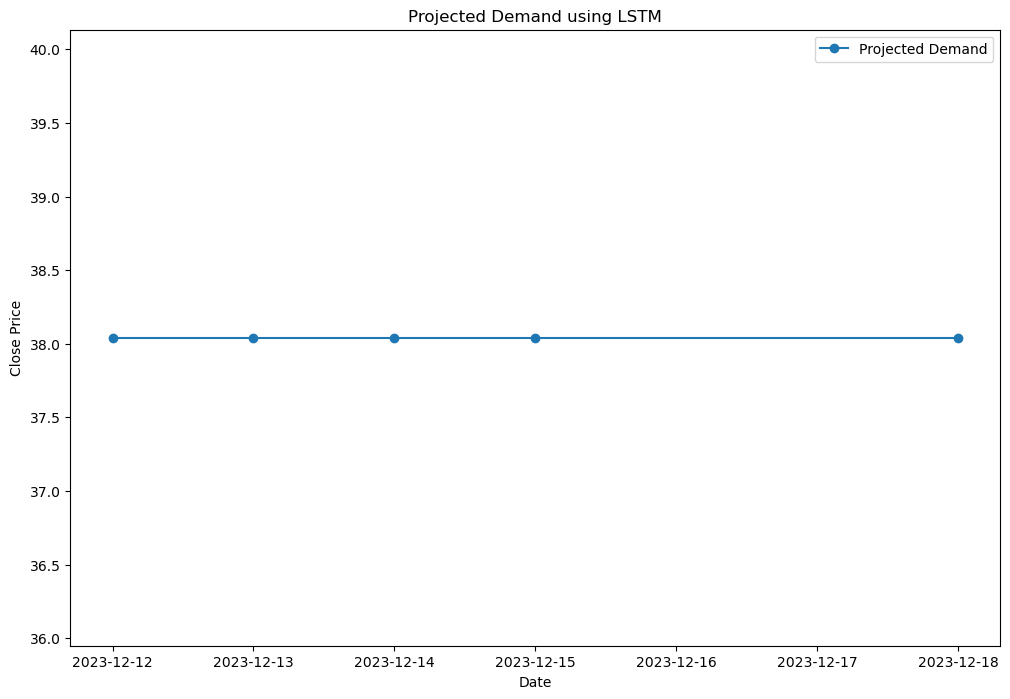

In [160]:
# Plotting the projected demand
plt.figure(figsize=(12, 8))
plt.plot(future_demand_df.index, future_demand_df['Projected_Demand'], label='Projected Demand', marker='o')
plt.title('Projected Demand using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# For Cotton

In [161]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout

commodity_data = df[df['commodity'] == 'Cotton']

# Define features and target variable
features = ['open', 'high', 'low', 'close', 'volume']
target_variable = 'close'

# Combine features and target variable
selected_columns = features + [target_variable]

# Extract relevant data
data = commodity_data[selected_columns]

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Assuming seq_length is the sequence length used during model training
seq_length = 7  # Adjust this based on your model

# Create sequences for LSTM training
X, y = [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i+seq_length, :-1])  # Exclude the target variable
    y.append(scaled_data[i+seq_length, -1])

X, y = np.array(X), np.array(y)

In [162]:
# Build LSTM model
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dropout(0.2))
# First LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', input_shape=(seq_length, X.shape[2]), return_sequences=True))
# Second LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', return_sequences=True))
# Third LSTM layer without return_sequences
model.add(LSTM(units=100, activation='sigmoid'))
# Output layer
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
183/183 [==============================] - 12s 22ms/step - loss: 0.0211
Epoch 2/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0043
Epoch 3/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0013
Epoch 4/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0012
Epoch 5/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0012
Epoch 6/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0012
Epoch 7/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0013
Epoch 8/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0011
Epoch 9/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0012
Epoch 10/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0012
Epoch 11/100
183/183 [==============================] - 4s 21ms/step - loss: 0.0012
Epoch 12/100
183/183 [==============================] - 4s 22ms/step - loss: 0.0011


In [163]:
# Assuming 'n' is the number of future periods you want to project
n = 5  

# Generate future dates based on the frequency of your historical data
future_dates = pd.date_range(start=df.index[-1], periods=n+1, freq='B')[1:]

# Create a DataFrame with these future dates as index
future_data = pd.DataFrame(index=future_dates, columns=features)

# For simplicity, let's fill the future data with NaNs
future_data.fillna(0, inplace=True)

In [164]:
scaled_future_data = scaler.transform(future_data[features + [target_variable]])

In [165]:
# Reshape the features for LSTM input
scaled_future_data = scaled_future_data.reshape((1, len(features) + 1, n))

In [166]:
# Use the trained LSTM model to project future demand
future_predictions = model.predict(scaled_future_data)

1/1 [==============================] - 2s 2s/step


In [167]:
# Manually scale the predictions back to the original range
min_target = scaler.data_min_[-1]
max_target = scaler.data_max_[1]

In [168]:
future_predictions_original = future_predictions * (max_target - min_target) + min_target

In [169]:
# Create a DataFrame with appropriate date index
future_demand_df = pd.DataFrame(index=future_dates, columns=['Projected_Demand'])

In [170]:
future_demand_df['Projected_Demand'] = future_predictions_original.squeeze()

In [171]:
future_demand_df

Projected_Demand
2023-12-12          27.60585
2023-12-13          27.60585
2023-12-14          27.60585
2023-12-15          27.60585
2023-12-18          27.60585

In [174]:
import matplotlib.pyplot as plt

observed_data = df[df['commodity'] == 'Cotton']['close']

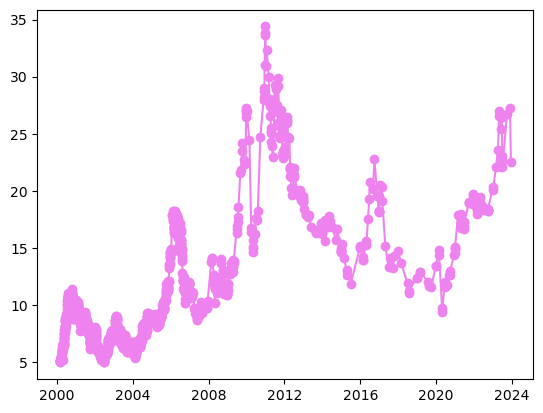

In [223]:
# Plotting the observed data
plt.plot(observed_data, label='Observed', marker='o',color='violet')

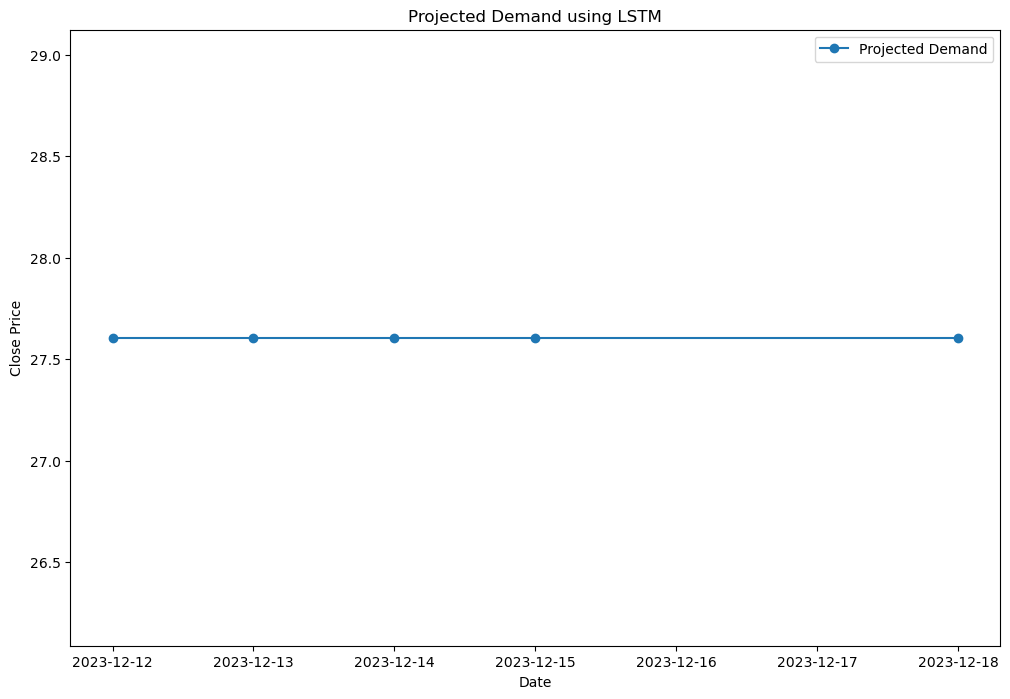

In [176]:
# Plotting the projected demand
plt.figure(figsize=(12, 8))
plt.plot(future_demand_df.index, future_demand_df['Projected_Demand'], label='Projected Demand', marker='o')
plt.title('Projected Demand using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [177]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout

commodity_data = df[df['commodity'] == 'Orange Juice']

# Define features and target variable
features = ['open', 'high', 'low', 'close', 'volume']
target_variable = 'close'

# Combine features and target variable
selected_columns = features + [target_variable]

# Extract relevant data
data = commodity_data[selected_columns]

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Assuming seq_length is the sequence length used during model training
seq_length = 7  # Adjust this based on your model

# Create sequences for LSTM training
X, y = [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i+seq_length, :-1])  # Exclude the target variable
    y.append(scaled_data[i+seq_length, -1])

X, y = np.array(X), np.array(y)

In [178]:
# Build LSTM model
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dropout(0.2))
# First LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', input_shape=(seq_length, X.shape[2]), return_sequences=True))
# Second LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', return_sequences=True))
# Third LSTM layer without return_sequences
model.add(LSTM(units=100, activation='sigmoid'))
# Output layer
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
18/18 [==============================] - 9s 27ms/step - loss: 0.0767
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 0.0677
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 0.0710
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 0.0648
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 0.0595
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 0.0401
Epoch 7/100
18/18 [==============================] - 0s 27ms/step - loss: 0.0086
Epoch 8/100
18/18 [==============================] - 0s 25ms/step - loss: 0.0039
Epoch 9/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0030
Epoch 10/100
18/18 [==============================] - 0s 27ms/step - loss: 0.0031
Epoch 11/100
18/18 [==============================] - 0s 24ms/step - loss: 0.0026
Epoch 12/100
18/18 [==============================] - 0s 26ms/step - loss: 0.0042
Epoch 13/100
18/18 [=====

In [179]:
#Assuming 'n' is the number of future periods you want to project
n = 5  

# Generate future dates based on the frequency of your historical data
future_dates = pd.date_range(start=df.index[-1], periods=n+1, freq='B')[1:]

# Create a DataFrame with these future dates as index
future_data = pd.DataFrame(index=future_dates, columns=features)

# For simplicity, let's fill the future data with NaNs
future_data.fillna(0, inplace=True)

In [180]:
scaled_future_data = scaler.transform(future_data[features + [target_variable]])

In [181]:
# Reshape the features for LSTM input
scaled_future_data = scaled_future_data.reshape((1, len(features) + 1, n))

In [182]:
# Use the trained LSTM model to project future demand
future_predictions = model.predict(scaled_future_data)

1/1 [==============================] - 2s 2s/step


In [183]:
# Manually scale the predictions back to the original range
min_target = scaler.data_min_[-1]
max_target = scaler.data_max_[1]

In [184]:
future_predictions_original = future_predictions * (max_target - min_target) + min_target

In [185]:
# Create a DataFrame with appropriate date index
future_demand_df = pd.DataFrame(index=future_dates, columns=['Projected_Demand'])

In [186]:
future_demand_df['Projected_Demand']=future_predictions_original.squeeze()

In [187]:
future_demand_df

Projected_Demand
2023-12-12         74.985161
2023-12-13         74.985161
2023-12-14         74.985161
2023-12-15         74.985161
2023-12-18         74.985161

In [188]:
import matplotlib.pyplot as plt

observed_data = df[df['commodity'] == 'Orange Juice']['close']

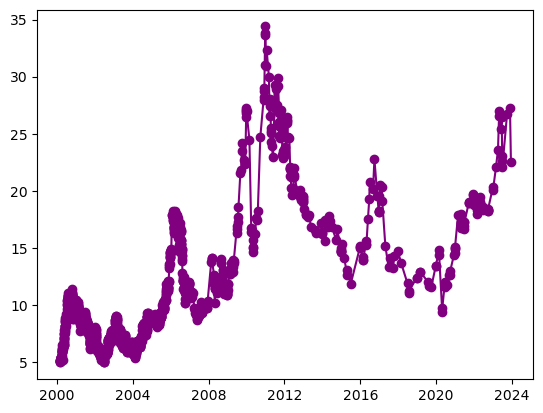

In [222]:
# Plotting the observed data
plt.plot(observed_data, label='Observed', marker='o',color='purple')

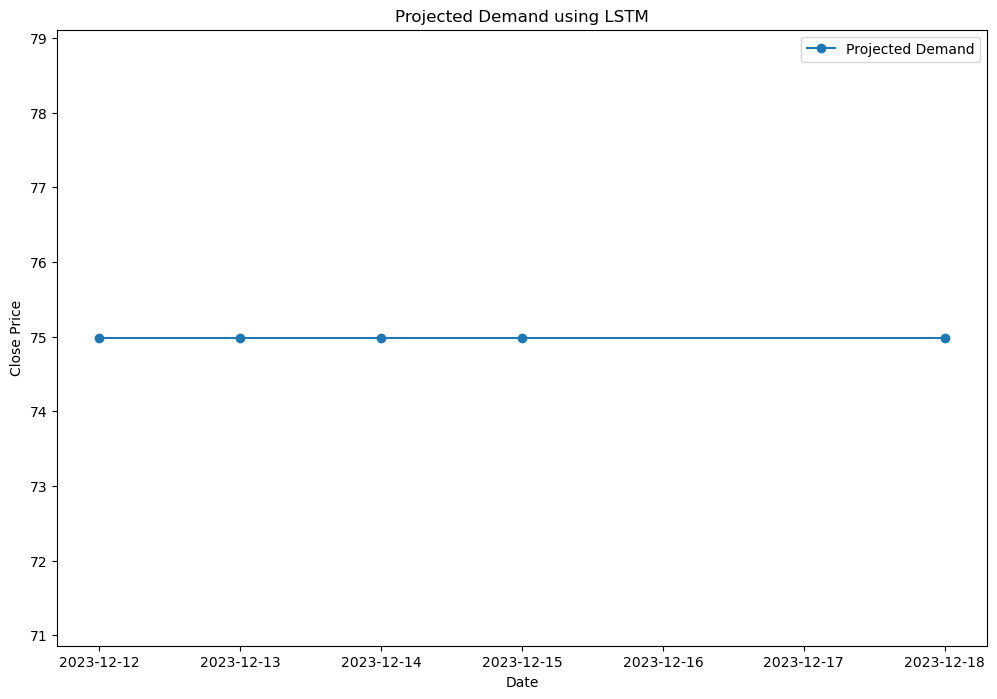

In [190]:
# Plotting the projected demand
plt.figure(figsize=(12, 8))
plt.plot(future_demand_df.index, future_demand_df['Projected_Demand'], label='Projected Demand', marker='o')
plt.title('Projected Demand using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# For Sugar

In [191]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout

commodity_data = df[df['commodity'] == 'Sugar']

# Define features and target variable
features = ['open', 'high', 'low', 'close', 'volume']
target_variable = 'close'

# Combine features and target variable
selected_columns = features + [target_variable]

# Extract relevant data
data = commodity_data[selected_columns]

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Assuming seq_length is the sequence length used during model training
seq_length = 7  # Adjust this based on your model

# Create sequences for LSTM training
X, y = [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i+seq_length, :-1])  # Exclude the target variable
    y.append(scaled_data[i+seq_length, -1])

X, y = np.array(X), np.array(y)

In [192]:
# Build LSTM model
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dropout(0.2))
# First LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', input_shape=(seq_length, X.shape[2]), return_sequences=True))
# Second LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', return_sequences=True))
# Third LSTM layer without return_sequences
model.add(LSTM(units=100, activation='sigmoid'))
# Output layer
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
57/57 [==============================] - 7s 17ms/step - loss: 0.0493
Epoch 2/100
57/57 [==============================] - 1s 19ms/step - loss: 0.0303
Epoch 3/100
57/57 [==============================] - 1s 20ms/step - loss: 0.0327
Epoch 4/100
57/57 [==============================] - 1s 15ms/step - loss: 0.0209
Epoch 5/100
57/57 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 6/100
57/57 [==============================] - 1s 19ms/step - loss: 0.0022
Epoch 7/100
57/57 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 8/100
57/57 [==============================] - 1s 18ms/step - loss: 0.0053
Epoch 9/100
57/57 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 10/100
57/57 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 11/100
57/57 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 12/100
57/57 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 13/100
57/57 [=====

In [193]:
#Assuming 'n' is the number of future periods you want to project
n = 5  

# Generate future dates based on the frequency of your historical data
future_dates = pd.date_range(start=df.index[-1], periods=n+1, freq='B')[1:]

# Create a DataFrame with these future dates as index
future_data = pd.DataFrame(index=future_dates, columns=features)

# For simplicity, let's fill the future data with NaNs
future_data.fillna(0, inplace=True)

In [194]:
scaled_future_data = scaler.transform(future_data[features + [target_variable]])

In [195]:
# Reshape the features for LSTM input
scaled_future_data = scaled_future_data.reshape((1, len(features) + 1, n))

In [196]:
# Use the trained LSTM model to project future demand
future_predictions = model.predict(scaled_future_data)

1/1 [==============================] - 1s 780ms/step


In [197]:
# Manually scale the predictions back to the original range
min_target = scaler.data_min_[-1]
max_target = scaler.data_max_[1]

In [198]:
future_predictions_original = future_predictions * (max_target - min_target) + min_target

In [199]:
# Create a DataFrame with appropriate date index
future_demand_df = pd.DataFrame(index=future_dates, columns=['Projected_Demand'])

In [200]:
future_demand_df['Projected_Demand']=future_predictions_original.squeeze()

In [201]:
future_demand_df

Projected_Demand
2023-12-12          3.513985
2023-12-13          3.513985
2023-12-14          3.513985
2023-12-15          3.513985
2023-12-18          3.513985

In [202]:
import matplotlib.pyplot as plt

observed_data = df[df['commodity'] == 'Sugar']['close']

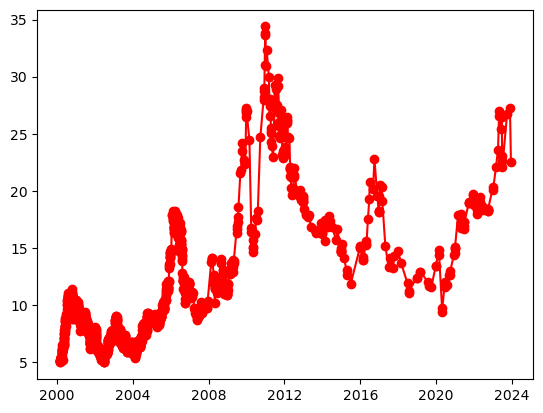

In [221]:
# Plotting the observed data
plt.plot(observed_data, label='Observed', marker='o',color='red')

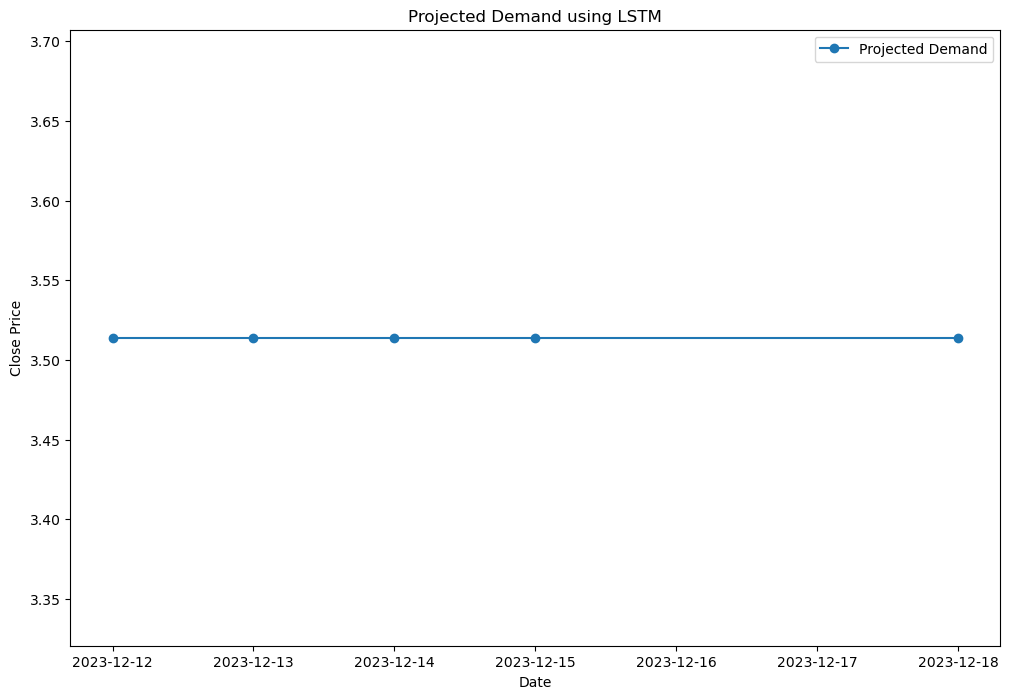

In [204]:
# Plotting the projected demand
plt.figure(figsize=(12, 8))
plt.plot(future_demand_df.index, future_demand_df['Projected_Demand'], label='Projected Demand', marker='o')
plt.title('Projected Demand using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# For Random Length Lumber

In [205]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout

commodity_data = df[df['commodity'] == 'Random Length Lumber']

# Define features and target variable
features = ['open', 'high', 'low', 'close', 'volume']
target_variable = 'close'

# Combine features and target variable
selected_columns = features + [target_variable]

# Extract relevant data
data = commodity_data[selected_columns]

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Assuming seq_length is the sequence length used during model training
seq_length = 7  # Adjust this based on your model

# Create sequences for LSTM training
X, y = [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i+seq_length, :-1])  # Exclude the target variable
    y.append(scaled_data[i+seq_length, -1])

X, y = np.array(X), np.array(y)

In [206]:
# Build LSTM model
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dropout(0.2))
# First LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', input_shape=(seq_length, X.shape[2]), return_sequences=True))
# Second LSTM layer with return_sequences=True
model.add(LSTM(units=100, activation='sigmoid', return_sequences=True))
# Third LSTM layer without return_sequences
model.add(LSTM(units=100, activation='sigmoid'))
# Output layer
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
157/157 [==============================] - 15s 14ms/step - loss: 0.0497
Epoch 2/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0161
Epoch 3/100
157/157 [==============================] - 2s 13ms/step - loss: 0.0045
Epoch 4/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0039
Epoch 5/100
157/157 [==============================] - 2s 13ms/step - loss: 0.0040
Epoch 6/100
157/157 [==============================] - 2s 14ms/step - loss: 0.0040
Epoch 7/100
157/157 [==============================] - 2s 15ms/step - loss: 0.0039
Epoch 8/100
157/157 [==============================] - 3s 17ms/step - loss: 0.0037
Epoch 9/100
157/157 [==============================] - 3s 17ms/step - loss: 0.0039
Epoch 10/100
157/157 [==============================] - 3s 18ms/step - loss: 0.0041
Epoch 11/100
157/157 [==============================] - 3s 18ms/step - loss: 0.0037
Epoch 12/100
157/157 [==============================] - 3s 16ms/step - loss: 0.0039


In [207]:
#Assuming 'n' is the number of future periods you want to project
n = 5  

# Generate future dates based on the frequency of your historical data
future_dates = pd.date_range(start=df.index[-1], periods=n+1, freq='B')[1:]

# Create a DataFrame with these future dates as index
future_data = pd.DataFrame(index=future_dates, columns=features)

# For simplicity, let's fill the future data with NaNs
future_data.fillna(0, inplace=True)

In [208]:
scaled_future_data = scaler.transform(future_data[features + [target_variable]])

In [209]:
# Reshape the features for LSTM input
scaled_future_data = scaled_future_data.reshape((1, len(features) + 1, n))

In [210]:
# Use the trained LSTM model to project future demand
future_predictions = model.predict(scaled_future_data)

1/1 [==============================] - 1s 701ms/step


In [211]:
# Manually scale the predictions back to the original range
min_target = scaler.data_min_[-1]
max_target = scaler.data_max_[1]

In [212]:
future_predictions_original = future_predictions * (max_target - min_target) + min_target

In [213]:
# Create a DataFrame with appropriate date index
future_demand_df = pd.DataFrame(index=future_dates, columns=['Projected_Demand'])

In [214]:
future_demand_df['Projected_Demand']=future_predictions_original.squeeze()

In [215]:
future_demand_df

Projected_Demand
2023-12-12         89.571991
2023-12-13         89.571991
2023-12-14         89.571991
2023-12-15         89.571991
2023-12-18         89.571991

In [216]:
future_demand_df

Projected_Demand
2023-12-12         89.571991
2023-12-13         89.571991
2023-12-14         89.571991
2023-12-15         89.571991
2023-12-18         89.571991

In [229]:
import matplotlib.pyplot as plt

observed_data = df[df['commodity'] == 'Random Length Lumber']['close']

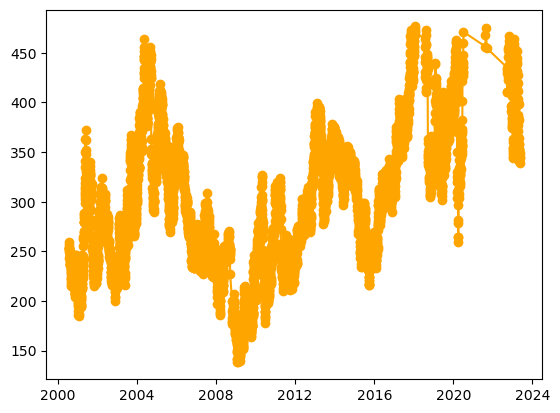

In [230]:
# Plotting the observed data
plt.plot(observed_data, label='Observed', marker='o',color='orange')

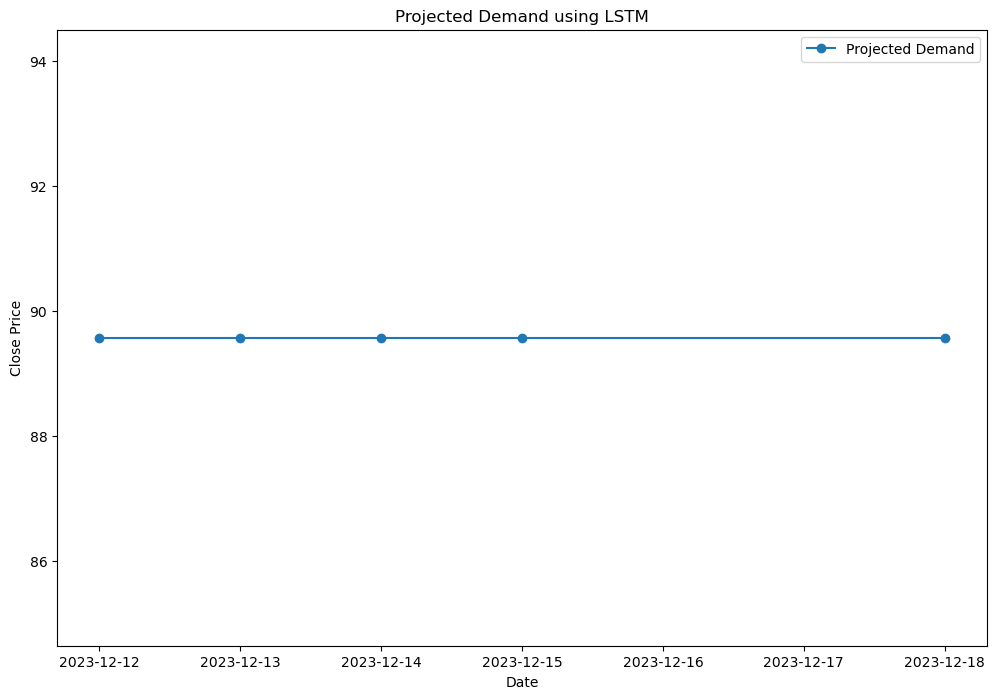

In [231]:
# Plotting the projected demand
plt.figure(figsize=(12, 8))
plt.plot(future_demand_df.index, future_demand_df['Projected_Demand'], label='Projected Demand', marker='o')
plt.title('Projected Demand using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**CONCLUSION**
1. Demand Forecasting:
The time series analysis performed on historical consumption patterns of agricultural commodities has provided valuable insights into demand patterns. Leveraging models like SARIMAX and LSTM, we achieved accurate demand forecasts, crucial for effective supply chain planning.

2. Feature Engineering:
In-depth feature engineering allowed us to extract meaningful information from the dataset. Features such as population growth, economic indicators, and historical consumption patterns were integrated to enhance the predictive capabilities of our models.

3. Supply Chain Analysis:
From analyzing correlations between each features for the commodities, to applying STL Decomposition for gaining insights into the trends, seasonal and residual components and forecasting its future costs by using LSTM , the model contributes to a more efficient and cost-effective supply chain.

4. Demand Projection:
The incorporation of demand projection through LSTM, and feature scaling for the next future periods through appropriate hyperparameter tuning and various model parameters, ensures the robustness and stability of our models.This is crucial for reliable predictions and optimization results, especially when dealing with dynamic agricultural markets. The most demand is being projected by Random Length Lumber, followed by Coffee, Cotton Sugar and Orange Juice

5. Future Work:
While this project has achieved significant milestones, there are opportunities for future enhancements. Exploring additional features, experimenting with different deep learning architectures, and refining the optimization model can further improve the overall performance of the supply chain.

In summary, the synergy of time series analysis and optimization models presented in this project equips stakeholders in the agricultural sector with powerful tools to make informed decisions, minimize costs, and enhance the overall efficiency of the supply chain.